# Accuracy Crosschecking using various Classification Algorithm

In [1]:
# all necessary imports
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

# Training and Testing from Raw Data

In [2]:

df_comb = pd.read_csv("training.csv")


df=pd.read_csv("training.csv")


In [3]:
df_comb.head(1)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  

[1 rows x 133 columns]

In [4]:
df_comb['prognosis'].value_counts()


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

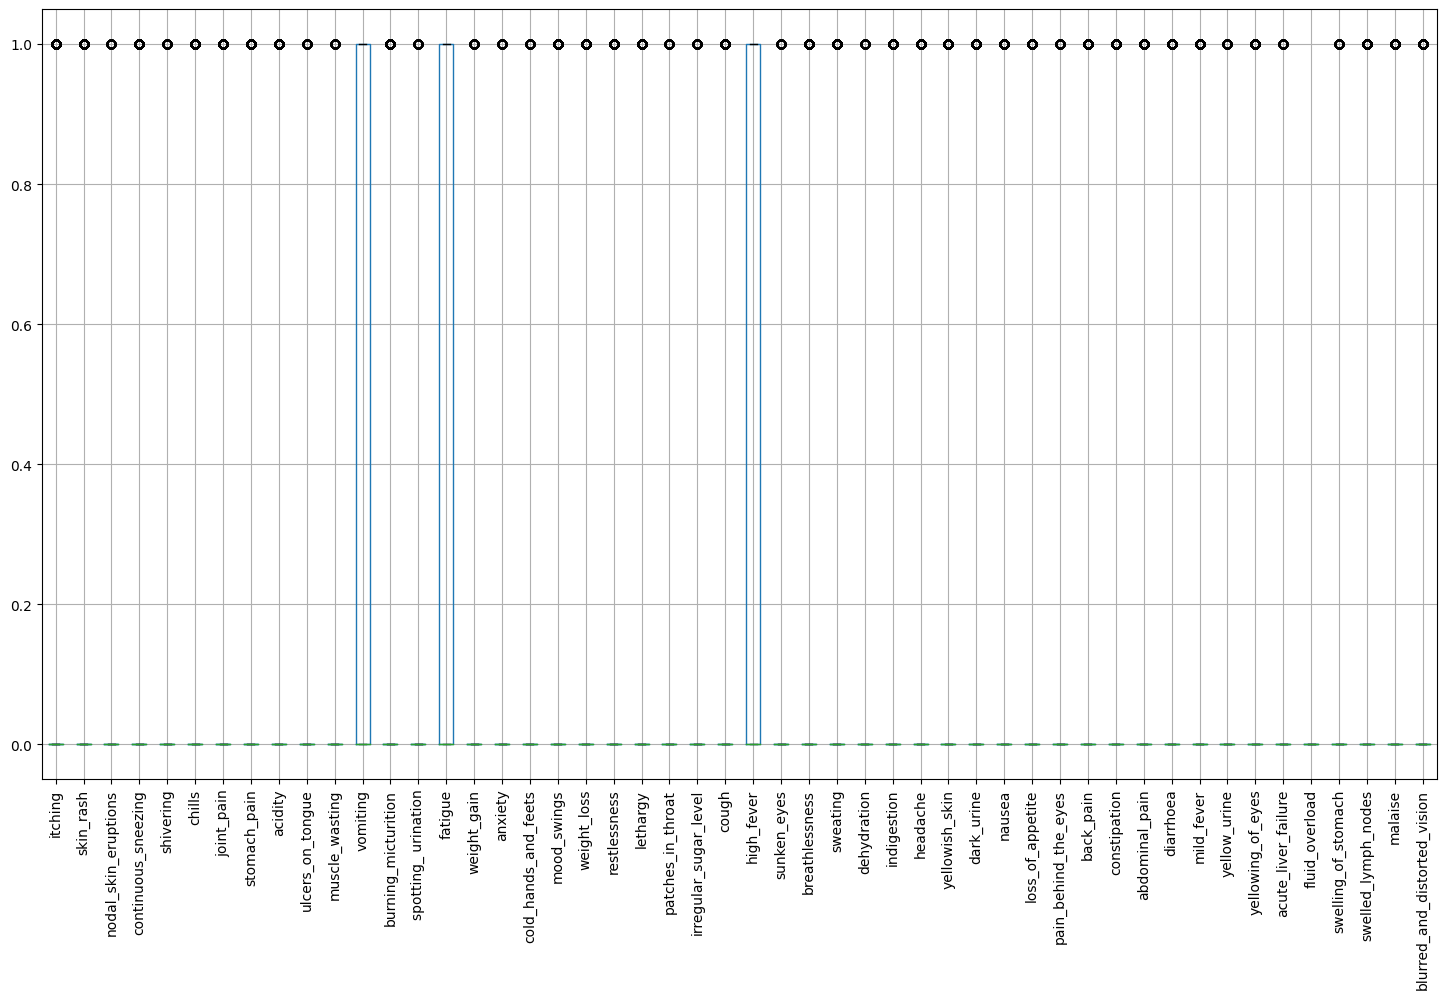

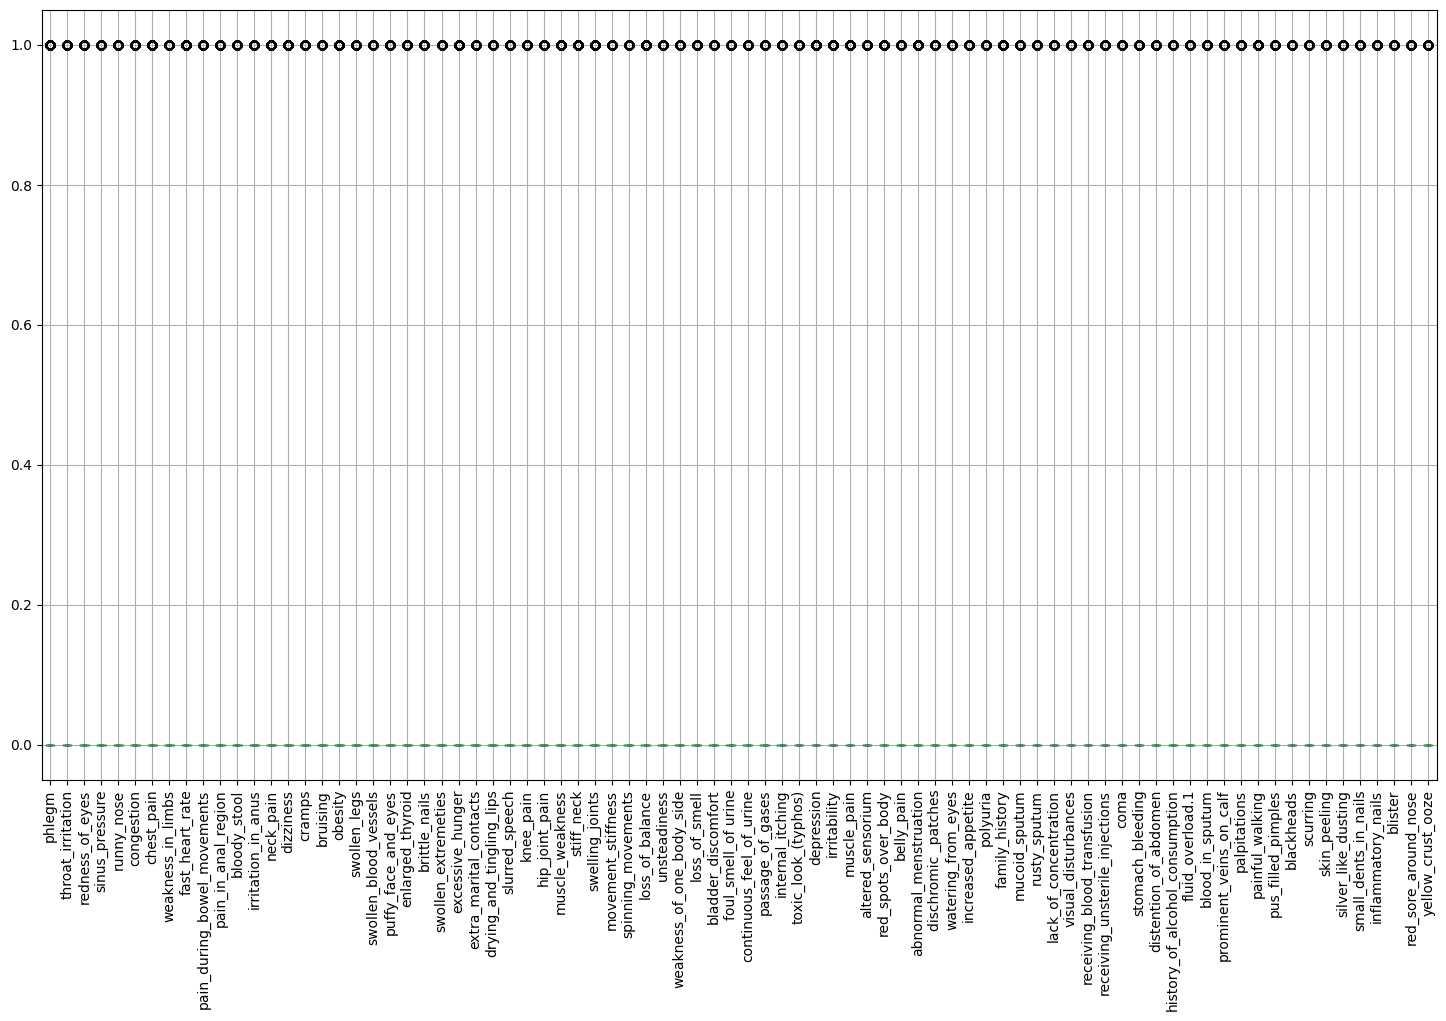

**Summary**:
 No outliers


In [5]:
temp_df=df_comb.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

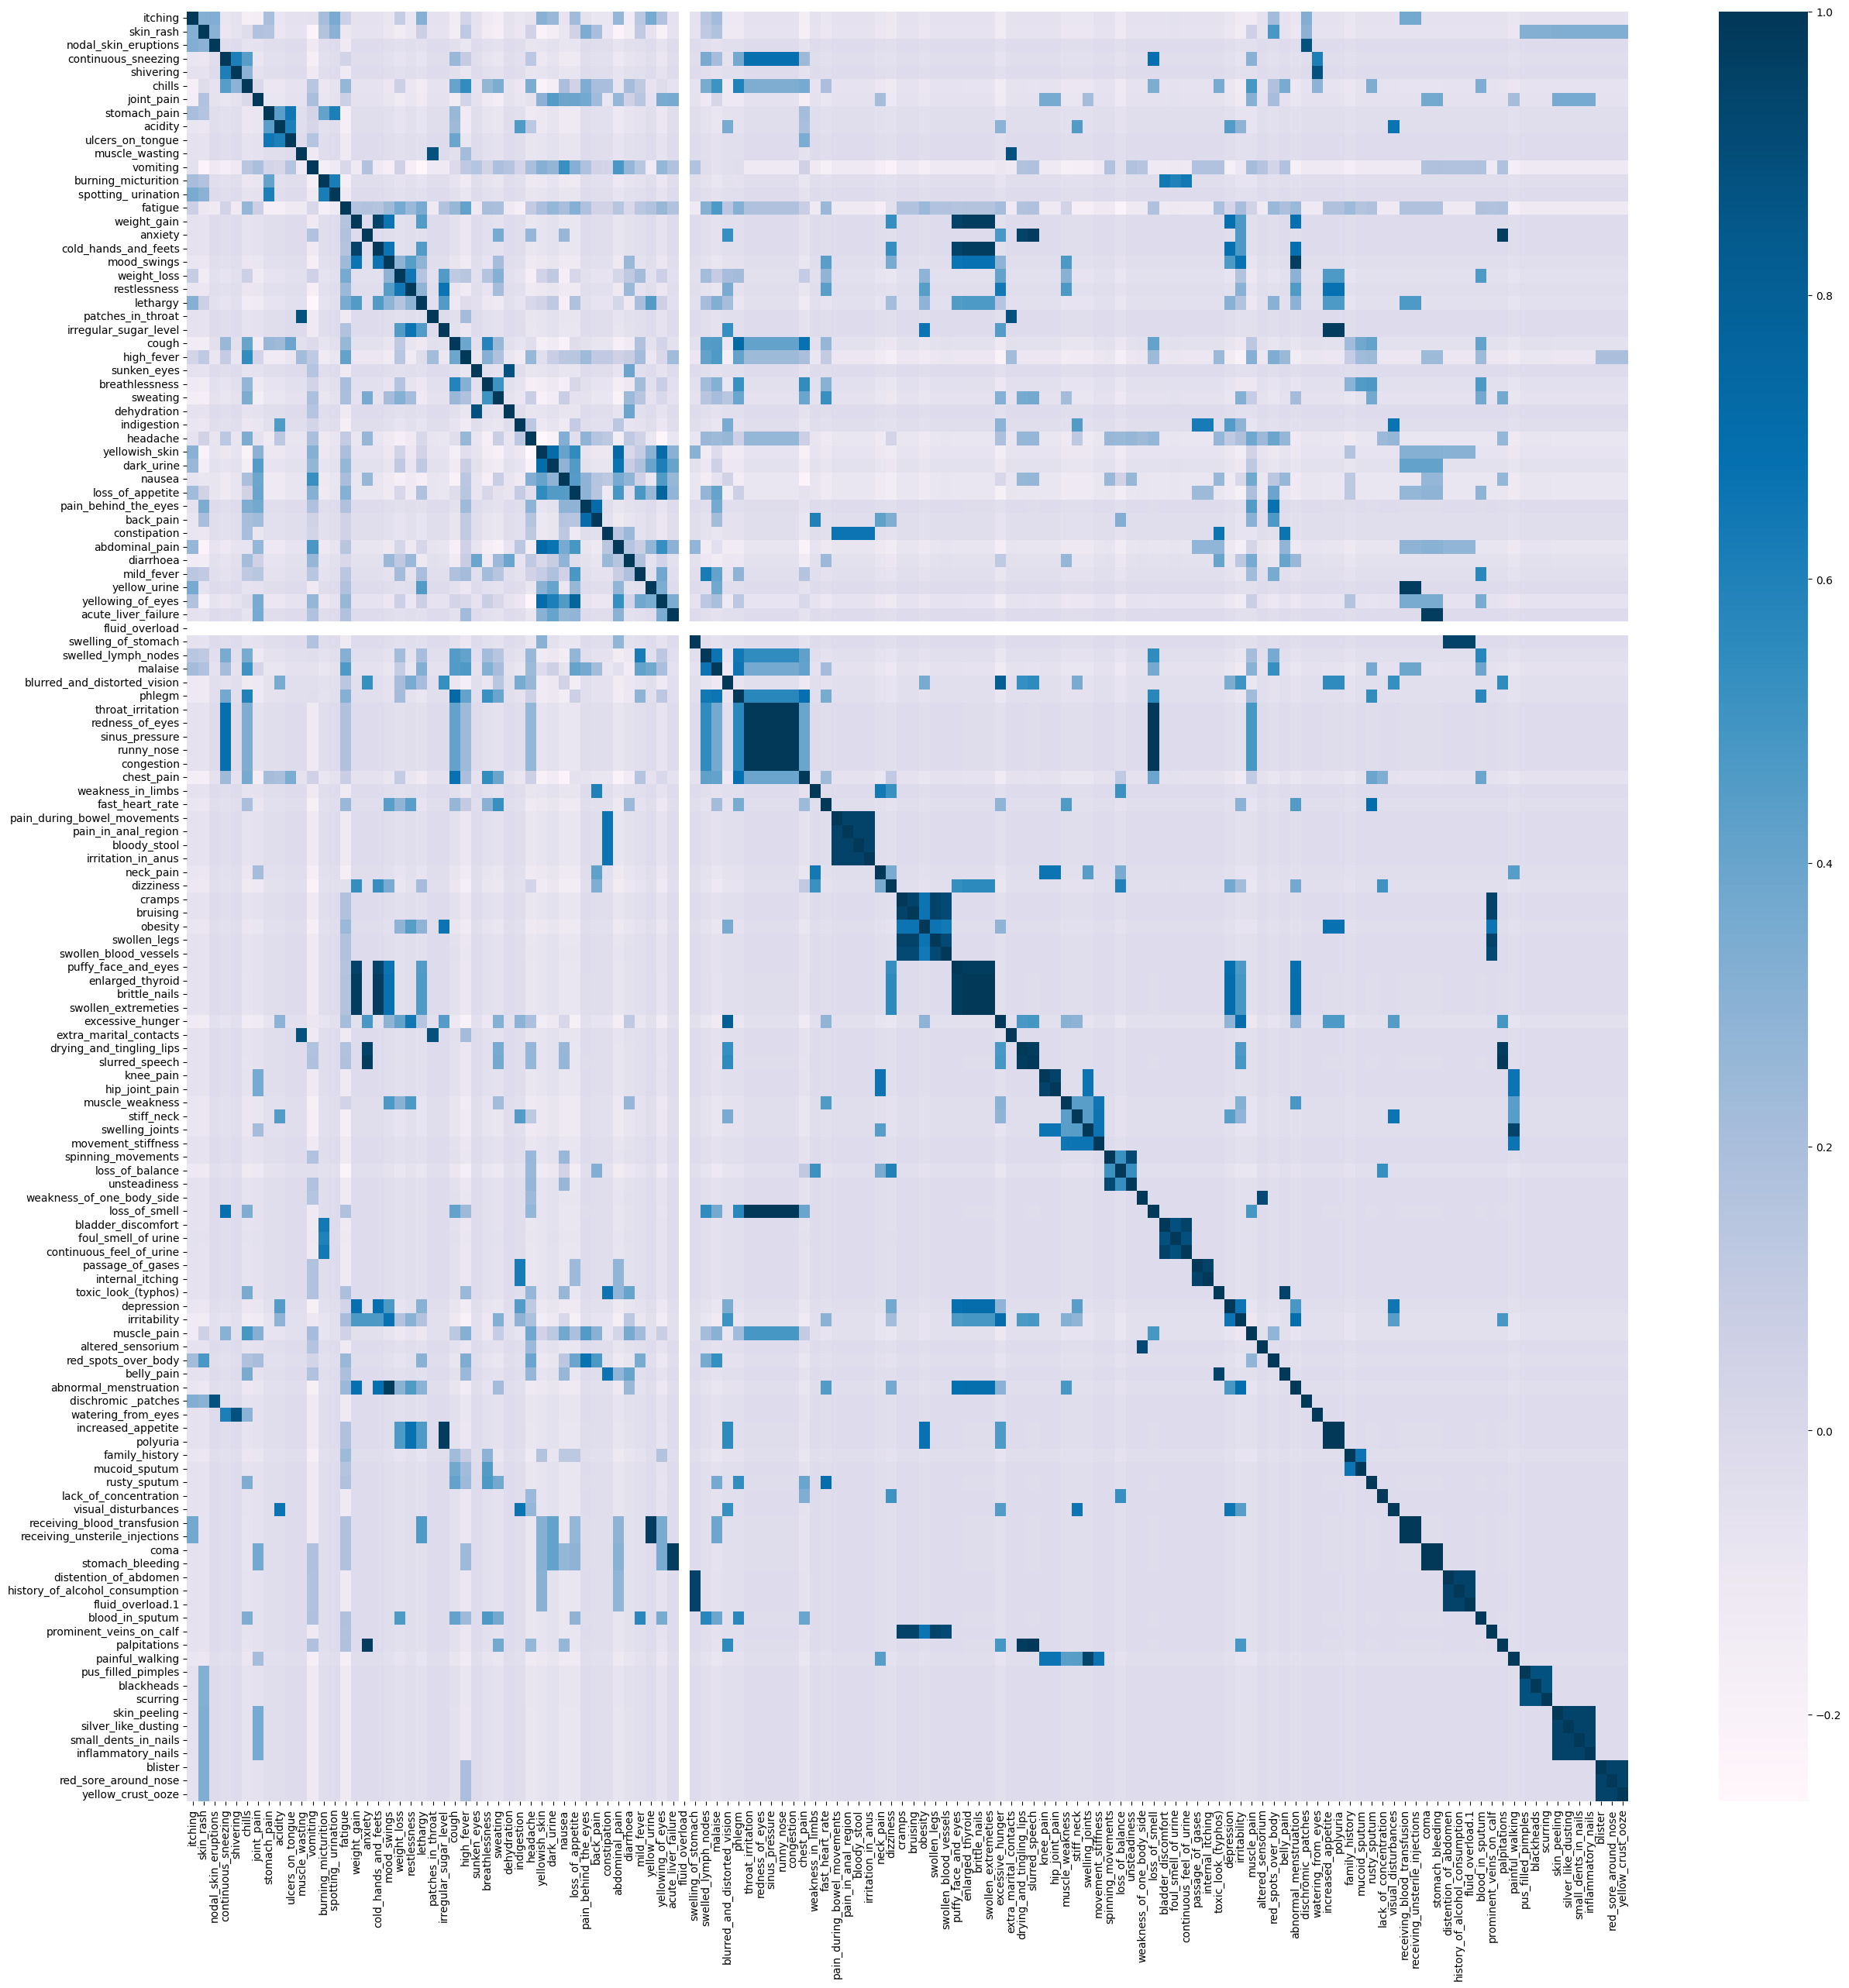

In [6]:
import seaborn as sns
plt.figure(figsize = (30, 30))
sns.heatmap(df_comb.corr(), cmap = 'PuBu', annot = False)
plt.show()

# Discarding High Correlated Feature

In [7]:
corr_matrix=df_comb.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.318158              0.326439   
skin_rash                 NaN        NaN              0.298143   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
small_dents_in_nails      NaN        NaN                   NaN   
inflammatory_nails        NaN        NaN                   NaN   
blister                   NaN        NaN                   NaN   
red_sore_around_nose      NaN        NaN                   NaN   
yellow_crust_ooze         NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing                   NaN   0.608981  0.446238   -0.087351   
shivering                             NaN        NaN  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
small_dents_in_nails                  NaN        NaN       NaN         NaN   
inflammatory_nails                    NaN        NaN       NaN         NaN   
blister                               NaN        NaN       NaN         NaN   
red_sore_around_nose                  NaN        NaN       NaN         NaN   
yellow_crust_ooze                     NaN        NaN       NaN         NaN   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails           NaN       NaN               NaN  ...   
inflammatory_nails             NaN       NaN               NaN  ...   
blister                        NaN       NaN               NaN  ...   
red_sore_around_nose           NaN       NaN               NaN  ...   
yellow_crust_ooze              NaN       NaN               NaN  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                        -0.059893   -0.059893 -0.059893     -0.061573   
skin_rash                       0.320859    0.320859  0.320859      0.331087   
nodal_skin_eruptions           -0.022444   -0.022444 -0.022444     -0.023073   
continuous_sneezing            -0.032566   -0.032566 -0.032566     -0.033480   
shivering                      -0.022444   -0.022444 -0.022444     -0.023073   
...                                  ...         ...       ...           ...   
small_dents_in_nails                 NaN         NaN       NaN           NaN   
inflammatory_nails                   NaN         NaN       NaN           NaN   
blister                              NaN         NaN       NaN           NaN   
red_sore_around_nose                 NaN         NaN       NaN           NaN   
yellow_crust_ooze                    NaN         NaN       NaN           NaN   

                      silver_like_dusting  small_dents_in_nails  \
itching                         -0.061573             -0.061573   
skin_rash                        0.331087              0.331087   
nodal_skin_eruptions            -0.023073             -0.023073   
continuous_sneezing             -0.033480             -0.033480   
shivering                       -0.023073             -0.023073   
...                                   ...                   ...   
small_den

In [8]:
df1=pd.read_csv("testing.csv")

In [9]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

df_comb=df_comb.drop(to_drop, axis=1)
df1=df1.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


In [10]:
l1=df_comb.columns

In [11]:
l1=list(l1)

In [12]:
# using sklearn variance threshold to find constant features
temp_train=df_comb.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)

VarianceThreshold(threshold=0.03)

In [13]:
# print the constant features
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
df_comb=df_comb.drop(to_drop, axis=1)
df1=df1.drop(to_drop, axis=1)

41


In [14]:
temp1={}

for e,i in enumerate(df_comb['prognosis'].unique()):
    temp1[i]=e
df_comb=df_comb.replace({'prognosis':temp1})  

In [15]:
df_comb.head()

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  \
0        1          1                    0       0           0             0   
1        0          1                    0       0           0             0   
2        1          0                    0       0           0             0   
3        1          1                    0       0           0             0   
4        1          1                    0       0           0             0   

   acidity  vomiting  burning_micturition  fatigue  ...  muscle_weakness  \
0        0         0                    0        0  ...                0   
1        0         0                    0        0  ...                0   
2        0         0                    0        0  ...                0   
3        0         0                    0        0  ...                0   
4        0         0                    0        0  ...                0   

   stiff_neck  swelling_joints  loss_of_balance  depression  irritability  \
0           0                0                0           0             0   
1           0                0                0           0             0   
2           0                0                0           0             0   
3           0                0                0           0             0   
4           0                0                0           0             0   

   muscle_pain  red_spots_over_body  family_history  prognosis  
0            0                    0               0          0  
1            0                    0               0          0  
2            0                    0               0          0  
3            0                    0               0          0  
4            0                    0               0          0  

[5 rows x 50 columns]

In [16]:
df_comb

itching  skin_rash  continuous_sneezing  chills  joint_pain  \
0           1          1                    0       0           0   
1           0          1                    0       0           0   
2           1          0                    0       0           0   
3           1          1                    0       0           0   
4           1          1                    0       0           0   
...       ...        ...                  ...     ...         ...   
4915        0          0                    0       0           0   
4916        0          1                    0       0           0   
4917        0          0                    0       0           0   
4918        0          1                    0       0           1   
4919        0          1                    0       0           0   

      stomach_pain  acidity  vomiting  burning_micturition  fatigue  ...  \
0                0        0         0                    0        0  ...   
1                0        0         0                    0        0  ...   
2                0        0         0                    0        0  ...   
3                0        0         0                    0        0  ...   
4                0        0         0                    0        0  ...   
...            ...      ...       ...                  ...      ...  ...   
4915             0        0         1                    0        0  ...   
4916             0        0         0                    0        0  ...   
4917             0        0         0                    1        0  ...   
4918             0        0         0                    0        0  ...   
4919             0        0         0                    0        0  ...   

      muscle_weakness  stiff_neck  swelling_joints  loss_of_balance  \
0                   0           0                0                0   
1                   0           0                0                0   
2                   0           0                0                0   
3                   0           0                0                0   
4                   0           0                0                0   
...               ...         ...              ...              ...   
4915                0           0                0                1   
4916                0           0                0                0   
4917                0           0                0                0   
4918                0           0                0                0   
4919                0           0                0                0   

      depression  irritability  muscle_pain  red_spots_over_body  \
0              0             0            0                    0   
1              0             0            0                    0   
2              0             0            0                    0   
3              0             0            0                    0   
4              0             0            0                    0   
...          ...           ...          ...                  ...   
4915           0             0            0                    0   
4916           0             0            0                    0   
4917           0             0            0                    0   
4918           0             0            0                    0   
4919           0             0            0                    0   

      family_history  prognosis  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  
...              ...        ...  
4915               0         36  
4916               0         37  
4917               0         38  
4918               0         39  
4919               0         40  

[4920 rows x 50 columns]

*Train Test Split*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_comb.drop('prognosis', 1), df_comb['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [18]:
# splitting data for training the classifiers and testing
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [19]:
df_comb.shape

(4920, 50)

In [20]:
# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# KBEST SELECTORS

In [22]:
"""k = 120  # Number of top features to select
  selector = SelectKBest(score_func=chi2, k=k)
  X_train_selected1 = selector.fit_transform(A_train, B_train)
  X_test_selected1= selector.transform(A_test)

  # Get the indices of the selected features
  selected_feature_indices1 = selector.get_support(indices=True)

 # Get the names of the selected features
 selected_feature_names1= X.columns[selected_feature_indices1]
"""

'k = 120  # Number of top features to select\n  selector = SelectKBest(score_func=chi2, k=k)\n  X_train_selected1 = selector.fit_transform(A_train, B_train)\n  X_test_selected1= selector.transform(A_test)\n\n  # Get the indices of the selected features\n  selected_feature_indices1 = selector.get_support(indices=True)\n\n # Get the names of the selected features\n selected_feature_names1= X.columns[selected_feature_indices1]\n'

In [23]:
"""k = 90  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(x_train, y_train)
X_test_selected = selector.transform(x_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

"""

'k = 90  # Number of top features to select\nselector = SelectKBest(score_func=chi2, k=k)\nX_train_selected = selector.fit_transform(x_train, y_train)\nX_test_selected = selector.transform(x_test)\n\n# Get the indices of the selected features\nselected_feature_indices = selector.get_support(indices=True)\n\n# Get the names of the selected features\nselected_feature_names = X.columns[selected_feature_indices]\n\n'

# Accuracy Cross Checking and Hyperparameter tuning 'with' Classification Report

# Random Forest

In [24]:
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
# prediction of labels for the test data
rf_pred = rf.predict(X_test)
acc_rf = round(Decimal(rf.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF
# performing cross validation with 5 different splits
scores_rf = cross_val_score(rf, X_test, y_test, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 98.53%
Cross Validation Accuracy (RF): 98.07%


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# Create the model
model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9844182511686599
Test Accuracy: 0.983739837398374


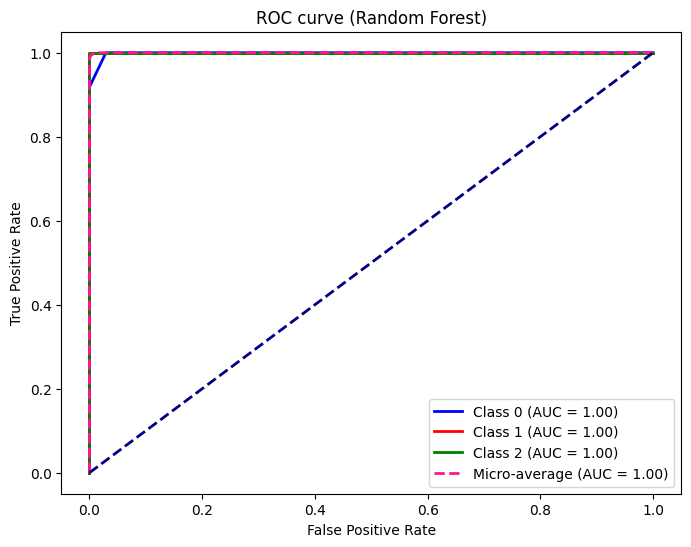

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

n_classes = 41
top_classes = [0, 1, 2]  # Replace with the indices of the top three classes you want to visualize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(RandomForestClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))  # Adjust the figsize as desired
colors = ['blue', 'red', 'green']  # Replace with your desired colors for the top three classes
for i in top_classes:
    color_index = i % len(colors)
    plt.plot(fpr[i], tpr[i], color=colors[color_index], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    plt.legend()

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))
plt.legend()

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('ROC curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


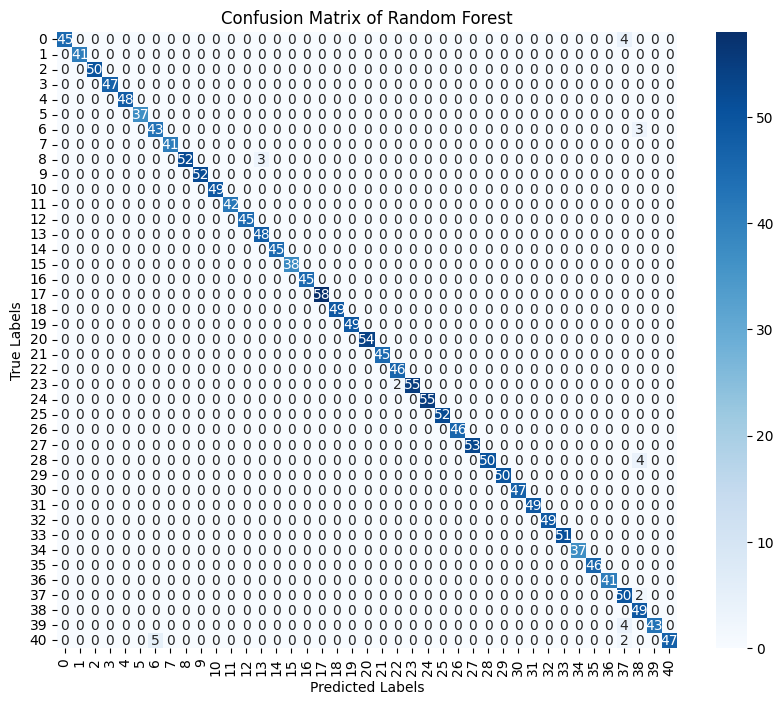

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest')
plt.show()


###### Classification Report(RF)


In [28]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Random Forest:")
print(classification_rep)

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.73      1.00      0.84        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data stored in X (features) and y (labels)
# Splitting the data into training and testing sets

# Creating an instance of the logistic regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9852642276422764


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.9847560870687431
Test Accuracy: 0.9852642276422764


In [31]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with the best hyperparameters
best_logreg = LogisticRegression(C=0.1, penalty='l2', solver='saga')

# Train the model on the entire training dataset
best_logreg.fit(X_train, y_train)

# Evaluate the model on the test dataset
accuracy = best_logreg.score(X_test, y_test)
print("Test Accuracy:", accuracy)

best_logreg

Test Accuracy: 0.9852642276422764


LogisticRegression(C=0.1, solver='saga')

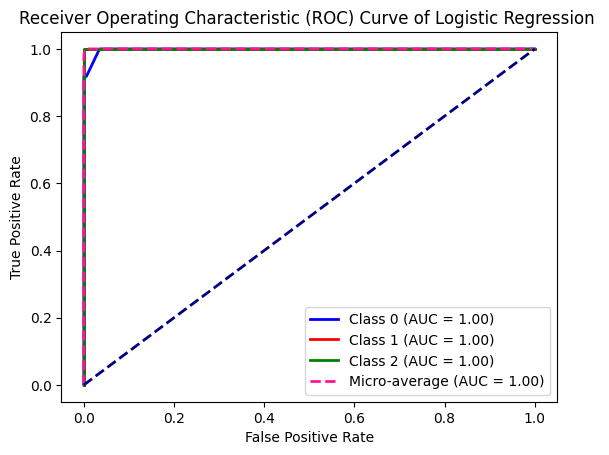

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(LogisticRegression())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression ')
plt.legend(loc='lower right')
plt.show()


# Classification Report

In [33]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Logistic Regression:")
print(classification_rep)

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00  

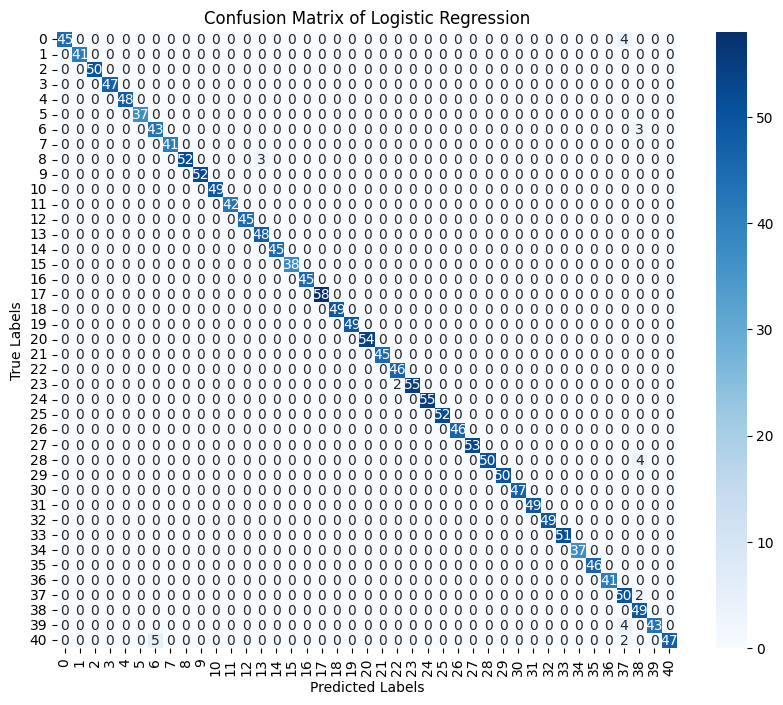

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


# Naive Bias

In [35]:
naive_bayes = MultinomialNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 98.22154471544715


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Create the MNB model
mnb = MultinomialNB()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform grid search
grid_search = GridSearchCV(mnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
acc_mnb = round(best_model.score(X_test, y_test) * 100, 2)
print(f"Accuracy (MNB): {acc_mnb}%")


Best Hyperparameters: {'alpha': 0.1}
Best Score: 0.9834024491668817
Accuracy (MNB): 98.22%


In [38]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Naive Bias:")
print(classification_rep)

Classification Report of Naive Bias:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       0.71      1.00      0.83        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00 

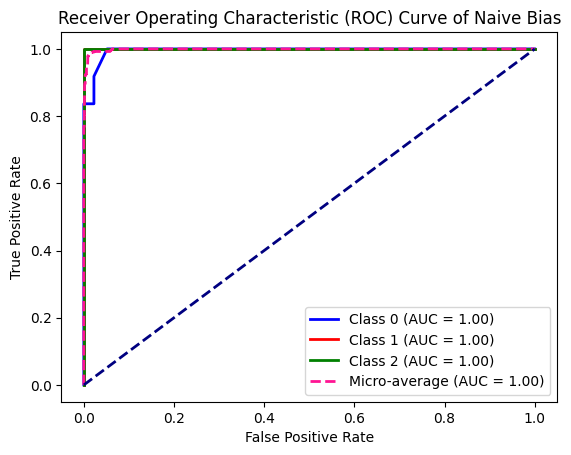

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(MultinomialNB())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bias')
plt.legend(loc='lower right')
plt.show()


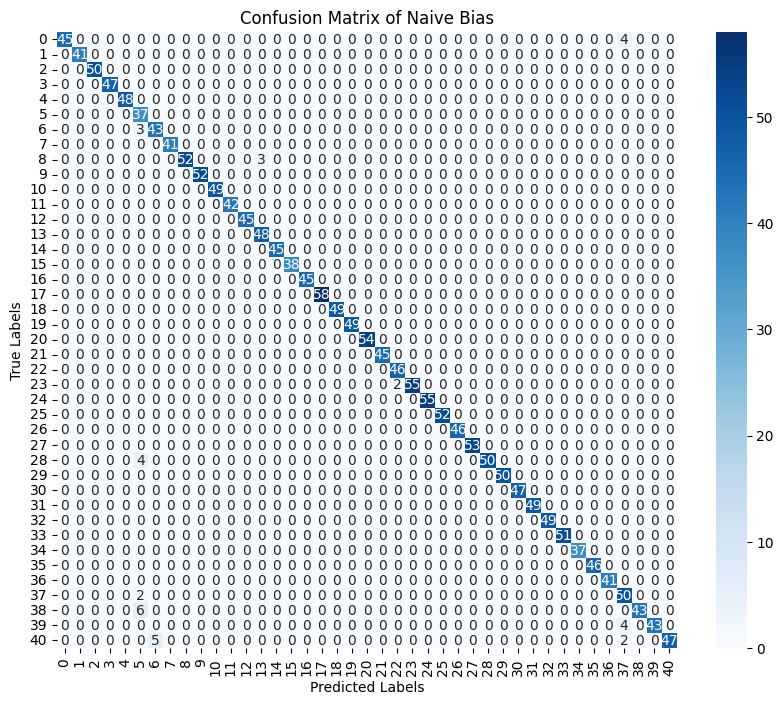

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Naive Bias')
plt.show()


# **K-Nearest Neighbor Classifier**


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on test data
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy is:",accuracy*100)

Accuracy is: 98.3739837398374


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score: 0.9850950701195906
Test Accuracy: 0.9852642276422764


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the KNN classifier with best hyperparameters
knn = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on test data
predictions = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy is",accuracy)

Accuracy is 0.9852642276422764


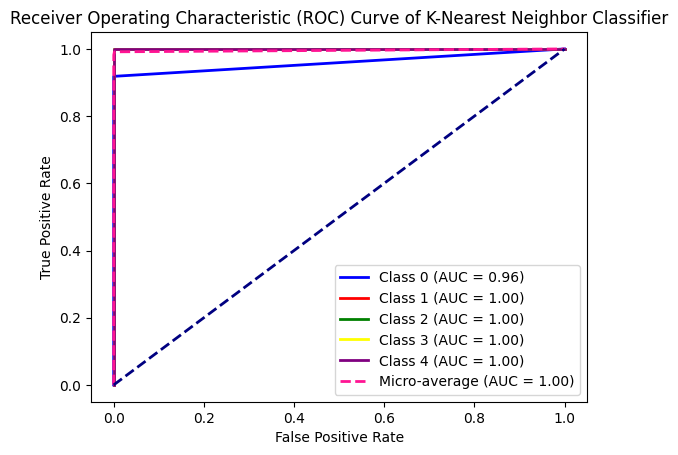

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(KNeighborsClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green','yellow','purple']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of K-Nearest Neighbor Classifier')
plt.legend(loc='lower right')
plt.show()


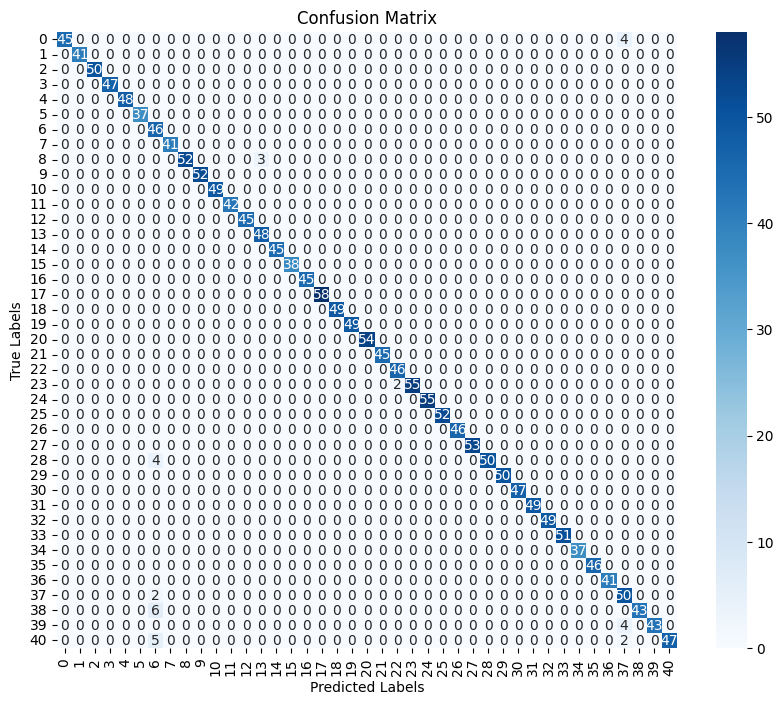

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # Replace with your KNN classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Support Vector Machine Classifier**



In [46]:
# SVM Classifier
svm = SVC()
svm = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
acc_svm = round(Decimal(svm.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

scores_svm = cross_val_score(svm, X_test, y_test, cv=5)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 98.53%
Cross Validation Accuracy (SVM): 97.66%


In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 2]
}

# Create the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.9854340531704381
Test Accuracy: 0.9852642276422764


In [48]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Support Vector Machine Classifier:")
print(classification_rep)

Classification Report of Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.

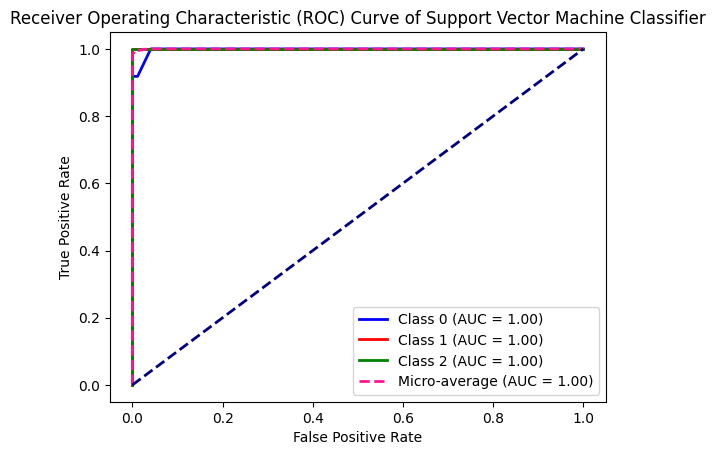

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(SVC(probability=True))

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machine Classifier')
plt.legend(loc='lower right')
plt.show()


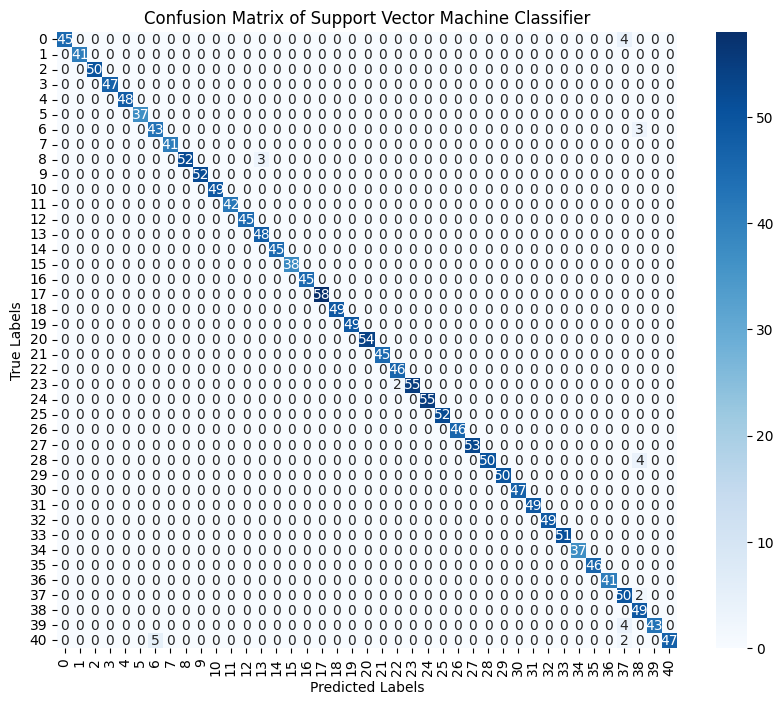

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the SVM classifier
model = SVC(kernel='linear', C=1.0)  # Replace with your SVM classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Support Vector Machine Classifier')
plt.show()


# **Decision Tree Classifier**


In [51]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
# prediction of labels for the test data
dt_pred = dt.predict(X_test)
acc_dt = round(Decimal(dt.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X_test, y_test, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 98.22%
Cross Validation Accuracy (DT): 96.80%


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new SVM classifier with the best hyperparameters
best_svm = SVC(**best_params)

# Train the classifier
best_svm.fit(X_train, y_train)

# Make predictions on test data
predictions = best_svm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9847572342195073
Accuracy: 0.9852642276422764


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create an instance of the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params)

# Train the classifier
best_dt.fit(X_train, y_train)

# Make predictions on test data
predictions = best_dt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9813696980125612
Accuracy: 0.9822154471544715


In [54]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Decision Tree Classifier:")
print(classification_rep)

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1

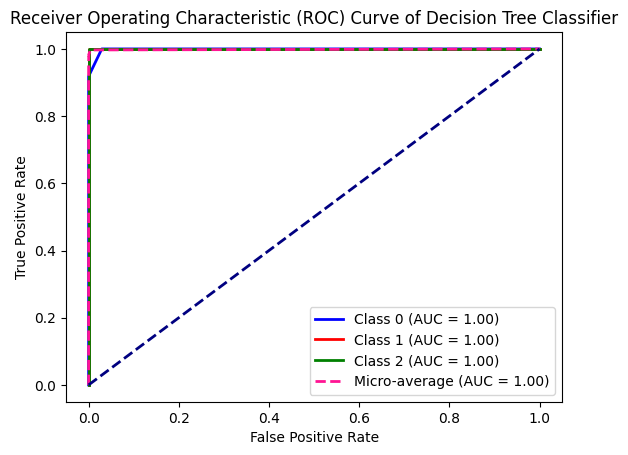

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


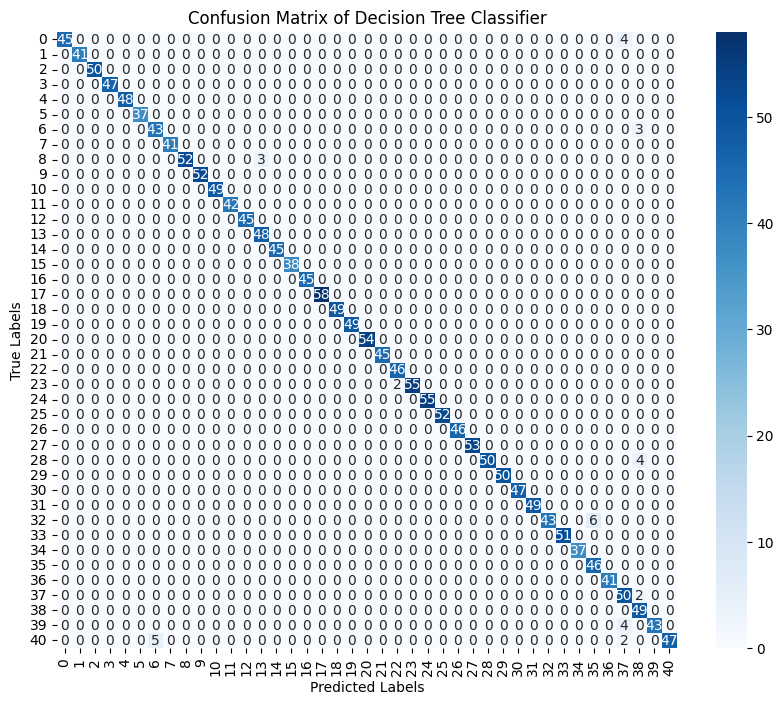

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Decision Tree classifier
model = DecisionTreeClassifier()  # Replace with your Decision Tree classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()


# **Multilayer Perceptron Classifier**

MLP is a feed forward ANN (Artificial Neural Network) which is extensively used for classification purpose.

In [57]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X_train, y_train)
# prediction of labels for the test data
mlp_pred = mlp.predict(X_test)
acc_mlp = round(Decimal(mlp.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X_test, y_test, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

Accuracy (MLP) : 98.53%
Cross Validation Accuracy (MLP): 98.07%


In [58]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create an instance of the MLPClassifier
mlp = MLPClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new MLPClassifier with the best hyperparameters
best_mlp = MLPClassifier(**best_params)

# Train the classifier
best_mlp.fit(X_train, y_train)

# Make predictions on test data
predictions = best_mlp.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best Score: 0.9854340531704381
Accuracy: 0.9852642276422764


In [59]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Multilayer Perceptron Classifier:")
print(classification_rep)

Classification Report of Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.0

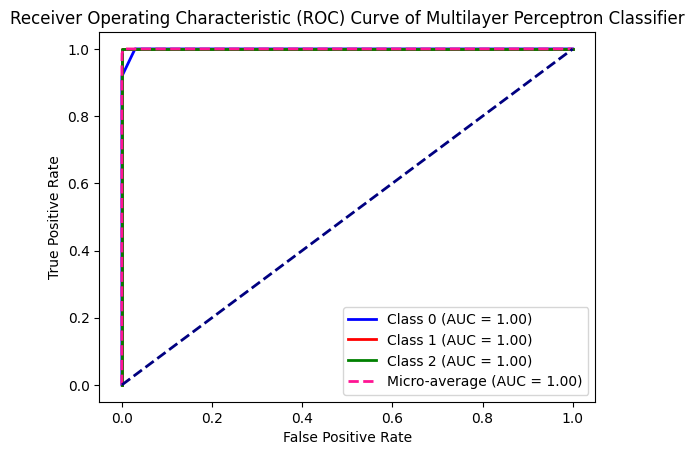

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = MLPClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Multilayer Perceptron Classifier')
plt.legend(loc='lower right')
plt.show()


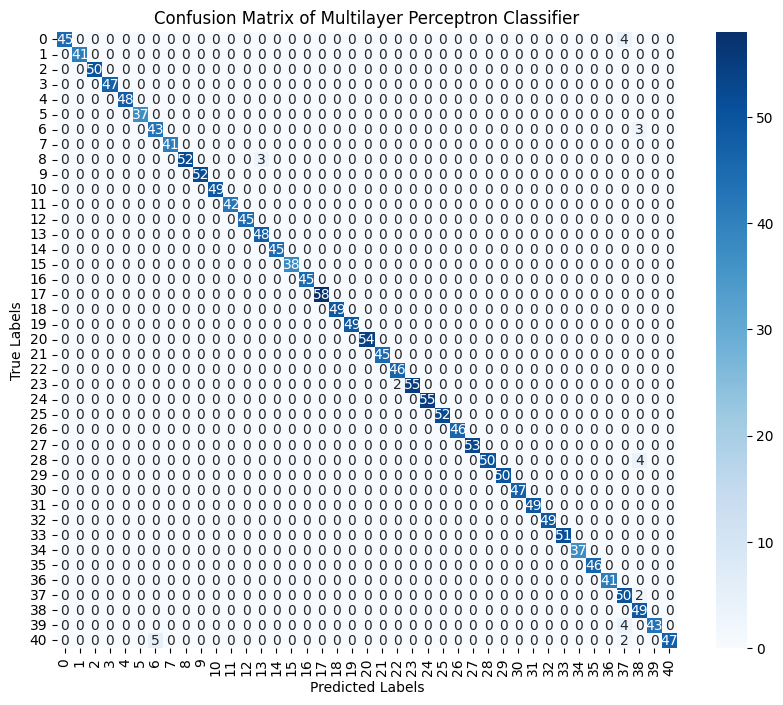

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu')  # Replace with your MLP classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Multilayer Perceptron Classifier')
plt.show()


# XGBOOST



In [62]:

xgb_classifier = xgb.XGBClassifier()


In [63]:
xgb_classifier.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [64]:
B_pred = xgb_classifier.predict(X_test)
model_list.append("XGB")


In [65]:

p1 = round(Decimal(xgb_classifier.score(X_test, y_test) * 100), 2)
accuracy_list.append(p1)
print(f"Accuracy (MLP) : {p1}%")


Accuracy (MLP) : 98.22%


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions for the random search
param_dist = {
    'learning_rate': uniform(0.001, 0.1),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.6, 0.4),
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new XGBClassifier with the best hyperparameters
best_xgb = XGBClassifier(**best_params)

# Train the classifier
best_xgb.fit(X_train, y_train)

# Make predictions on test data
predictions = best_xgb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.09799098521619944, 'max_depth': 4, 'subsample': 0.6849356442713105}
Best Score: 0.9803527488600189
Accuracy: 0.9822154471544715


In [67]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of XGBOOST:")
print(classification_rep)

Classification Report of XGBOOST:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00    

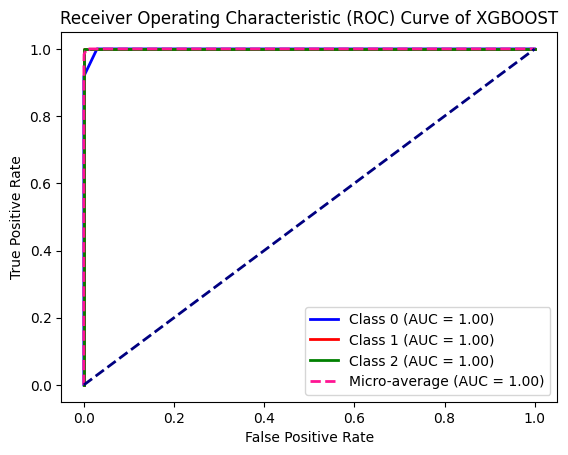

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import xgboost as xgb
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the XGBoost classifier
classifier = xgb.XGBClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBOOST')
plt.legend(loc='lower right')
plt.show()


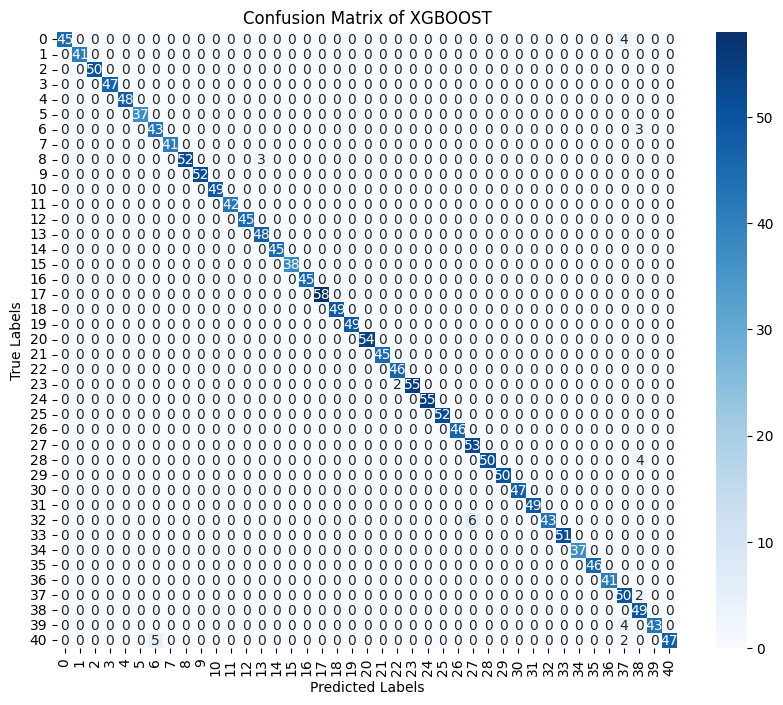

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Fit the XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, max_depth=3)  # Replace with your XGBoost classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of XGBOOST')
plt.show()


# Catboost

In [70]:
catboost_classifier = CatBoostClassifier()

In [71]:
catboost_classifier.fit(X_train, y_train)


Learning rate set to 0.083618
0:	learn: 3.3265366	total: 172ms	remaining: 2m 51s
1:	learn: 3.0264277	total: 195ms	remaining: 1m 37s
2:	learn: 2.6715409	total: 219ms	remaining: 1m 12s
3:	learn: 2.3938476	total: 246ms	remaining: 1m 1s
4:	learn: 2.2214165	total: 269ms	remaining: 53.4s
5:	learn: 2.0122487	total: 292ms	remaining: 48.3s
6:	learn: 1.8878875	total: 315ms	remaining: 44.6s
7:	learn: 1.7219174	total: 337ms	remaining: 41.8s
8:	learn: 1.6135894	total: 361ms	remaining: 39.7s
9:	learn: 1.5435779	total: 383ms	remaining: 37.9s
10:	learn: 1.4742405	total: 406ms	remaining: 36.5s
11:	learn: 1.3940902	total: 430ms	remaining: 35.4s
12:	learn: 1.2893764	total: 454ms	remaining: 34.5s
13:	learn: 1.2349688	total: 477ms	remaining: 33.6s
14:	learn: 1.1795714	total: 502ms	remaining: 33s
15:	learn: 1.0982220	total: 525ms	remaining: 32.3s
16:	learn: 1.0436785	total: 551ms	remaining: 31.8s
17:	learn: 0.9794782	total: 573ms	remaining: 31.3s
18:	learn: 0.9193227	total: 596ms	remaining: 30.8s
19:	learn:

167:	learn: 0.0779072	total: 4.13s	remaining: 20.5s
168:	learn: 0.0775706	total: 4.16s	remaining: 20.4s
169:	learn: 0.0772576	total: 4.18s	remaining: 20.4s
170:	learn: 0.0770444	total: 4.2s	remaining: 20.4s
171:	learn: 0.0768089	total: 4.23s	remaining: 20.4s
172:	learn: 0.0765119	total: 4.25s	remaining: 20.3s
173:	learn: 0.0761396	total: 4.28s	remaining: 20.3s
174:	learn: 0.0759446	total: 4.3s	remaining: 20.3s
175:	learn: 0.0756935	total: 4.33s	remaining: 20.3s
176:	learn: 0.0754070	total: 4.35s	remaining: 20.2s
177:	learn: 0.0751527	total: 4.38s	remaining: 20.2s
178:	learn: 0.0748735	total: 4.4s	remaining: 20.2s
179:	learn: 0.0746756	total: 4.42s	remaining: 20.2s
180:	learn: 0.0744742	total: 4.45s	remaining: 20.1s
181:	learn: 0.0741561	total: 4.47s	remaining: 20.1s
182:	learn: 0.0739202	total: 4.49s	remaining: 20.1s
183:	learn: 0.0737758	total: 4.52s	remaining: 20s
184:	learn: 0.0735755	total: 4.54s	remaining: 20s
185:	learn: 0.0733115	total: 4.57s	remaining: 20s
186:	learn: 0.0731227

332:	learn: 0.0583325	total: 8.09s	remaining: 16.2s
333:	learn: 0.0582942	total: 8.12s	remaining: 16.2s
334:	learn: 0.0582126	total: 8.14s	remaining: 16.2s
335:	learn: 0.0581632	total: 8.16s	remaining: 16.1s
336:	learn: 0.0581322	total: 8.19s	remaining: 16.1s
337:	learn: 0.0581003	total: 8.21s	remaining: 16.1s
338:	learn: 0.0580669	total: 8.23s	remaining: 16.1s
339:	learn: 0.0580457	total: 8.26s	remaining: 16s
340:	learn: 0.0580209	total: 8.28s	remaining: 16s
341:	learn: 0.0579794	total: 8.31s	remaining: 16s
342:	learn: 0.0579489	total: 8.33s	remaining: 16s
343:	learn: 0.0579086	total: 8.36s	remaining: 15.9s
344:	learn: 0.0578662	total: 8.38s	remaining: 15.9s
345:	learn: 0.0578418	total: 8.4s	remaining: 15.9s
346:	learn: 0.0578180	total: 8.43s	remaining: 15.9s
347:	learn: 0.0577791	total: 8.45s	remaining: 15.8s
348:	learn: 0.0577288	total: 8.47s	remaining: 15.8s
349:	learn: 0.0576785	total: 8.5s	remaining: 15.8s
350:	learn: 0.0576502	total: 8.52s	remaining: 15.8s
351:	learn: 0.0575923	

498:	learn: 0.0533961	total: 12s	remaining: 12.1s
499:	learn: 0.0533871	total: 12.1s	remaining: 12.1s
500:	learn: 0.0533688	total: 12.1s	remaining: 12s
501:	learn: 0.0533533	total: 12.1s	remaining: 12s
502:	learn: 0.0533444	total: 12.1s	remaining: 12s
503:	learn: 0.0533277	total: 12.2s	remaining: 12s
504:	learn: 0.0532661	total: 12.2s	remaining: 11.9s
505:	learn: 0.0532559	total: 12.2s	remaining: 11.9s
506:	learn: 0.0532465	total: 12.2s	remaining: 11.9s
507:	learn: 0.0532323	total: 12.3s	remaining: 11.9s
508:	learn: 0.0532146	total: 12.3s	remaining: 11.8s
509:	learn: 0.0531997	total: 12.3s	remaining: 11.8s
510:	learn: 0.0531851	total: 12.3s	remaining: 11.8s
511:	learn: 0.0531701	total: 12.4s	remaining: 11.8s
512:	learn: 0.0531544	total: 12.4s	remaining: 11.8s
513:	learn: 0.0531432	total: 12.4s	remaining: 11.7s
514:	learn: 0.0531332	total: 12.4s	remaining: 11.7s
515:	learn: 0.0531270	total: 12.5s	remaining: 11.7s
516:	learn: 0.0531162	total: 12.5s	remaining: 11.7s
517:	learn: 0.0531073	

664:	learn: 0.0512306	total: 16s	remaining: 8.06s
665:	learn: 0.0512165	total: 16s	remaining: 8.03s
666:	learn: 0.0512076	total: 16s	remaining: 8.01s
667:	learn: 0.0511999	total: 16.1s	remaining: 7.98s
668:	learn: 0.0511878	total: 16.1s	remaining: 7.96s
669:	learn: 0.0511824	total: 16.1s	remaining: 7.93s
670:	learn: 0.0511731	total: 16.1s	remaining: 7.91s
671:	learn: 0.0511573	total: 16.2s	remaining: 7.89s
672:	learn: 0.0511531	total: 16.2s	remaining: 7.87s
673:	learn: 0.0511377	total: 16.2s	remaining: 7.84s
674:	learn: 0.0511331	total: 16.2s	remaining: 7.82s
675:	learn: 0.0511234	total: 16.3s	remaining: 7.79s
676:	learn: 0.0511175	total: 16.3s	remaining: 7.77s
677:	learn: 0.0510884	total: 16.3s	remaining: 7.74s
678:	learn: 0.0510750	total: 16.3s	remaining: 7.72s
679:	learn: 0.0510688	total: 16.4s	remaining: 7.7s
680:	learn: 0.0510605	total: 16.4s	remaining: 7.67s
681:	learn: 0.0510565	total: 16.4s	remaining: 7.65s
682:	learn: 0.0510534	total: 16.4s	remaining: 7.62s
683:	learn: 0.05104

827:	learn: 0.0498675	total: 19.9s	remaining: 4.12s
828:	learn: 0.0498648	total: 19.9s	remaining: 4.1s
829:	learn: 0.0498206	total: 19.9s	remaining: 4.08s
830:	learn: 0.0498135	total: 19.9s	remaining: 4.05s
831:	learn: 0.0498049	total: 20s	remaining: 4.03s
832:	learn: 0.0498022	total: 20s	remaining: 4s
833:	learn: 0.0497963	total: 20s	remaining: 3.98s
834:	learn: 0.0497936	total: 20s	remaining: 3.96s
835:	learn: 0.0497868	total: 20s	remaining: 3.93s
836:	learn: 0.0497840	total: 20.1s	remaining: 3.91s
837:	learn: 0.0497750	total: 20.1s	remaining: 3.88s
838:	learn: 0.0497723	total: 20.1s	remaining: 3.86s
839:	learn: 0.0497627	total: 20.1s	remaining: 3.84s
840:	learn: 0.0497540	total: 20.2s	remaining: 3.81s
841:	learn: 0.0497499	total: 20.2s	remaining: 3.79s
842:	learn: 0.0497317	total: 20.2s	remaining: 3.76s
843:	learn: 0.0497252	total: 20.2s	remaining: 3.74s
844:	learn: 0.0497160	total: 20.3s	remaining: 3.72s
845:	learn: 0.0497030	total: 20.3s	remaining: 3.69s
846:	learn: 0.0496949	tota

989:	learn: 0.0489654	total: 23.7s	remaining: 240ms
990:	learn: 0.0489500	total: 23.7s	remaining: 216ms
991:	learn: 0.0489449	total: 23.8s	remaining: 192ms
992:	learn: 0.0489422	total: 23.8s	remaining: 168ms
993:	learn: 0.0489403	total: 23.8s	remaining: 144ms
994:	learn: 0.0489365	total: 23.8s	remaining: 120ms
995:	learn: 0.0489293	total: 23.9s	remaining: 95.8ms
996:	learn: 0.0489266	total: 23.9s	remaining: 71.8ms
997:	learn: 0.0489249	total: 23.9s	remaining: 47.9ms
998:	learn: 0.0489230	total: 23.9s	remaining: 23.9ms
999:	learn: 0.0489185	total: 24s	remaining: 0us


In [72]:
y_pred = catboost_classifier.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852642276422764


In [74]:
p2 = round(Decimal(accuracy* 100), 2)
accuracy_list.append(p2)

In [75]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search with reduced values
param_grid = {
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Create an instance of the CatBoostClassifier
catboost = CatBoostClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(catboost, param_grid, cv=3, n_iter=4)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new CatBoostClassifier with the best hyperparameters
best_catboost = CatBoostClassifier(**best_params)

# Train the classifier
best_catboost.fit(X_train, y_train)

# Make predictions on test data
predictions = best_catboost.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


0:	learn: 3.6483366	total: 13.6ms	remaining: 13.6s
1:	learn: 3.6034687	total: 27.3ms	remaining: 13.6s
2:	learn: 3.5426428	total: 40.5ms	remaining: 13.5s
3:	learn: 3.4968267	total: 54.1ms	remaining: 13.5s
4:	learn: 3.4462990	total: 68.3ms	remaining: 13.6s
5:	learn: 3.4146643	total: 81.6ms	remaining: 13.5s
6:	learn: 3.3693549	total: 94.6ms	remaining: 13.4s
7:	learn: 3.3251872	total: 107ms	remaining: 13.3s
8:	learn: 3.2857806	total: 120ms	remaining: 13.2s
9:	learn: 3.2580026	total: 133ms	remaining: 13.2s
10:	learn: 3.2169755	total: 146ms	remaining: 13.2s
11:	learn: 3.1836960	total: 160ms	remaining: 13.2s
12:	learn: 3.1436818	total: 174ms	remaining: 13.2s
13:	learn: 3.1031868	total: 187ms	remaining: 13.1s
14:	learn: 3.0661278	total: 200ms	remaining: 13.1s
15:	learn: 3.0180647	total: 214ms	remaining: 13.2s
16:	learn: 2.9687286	total: 228ms	remaining: 13.2s
17:	learn: 2.9381881	total: 241ms	remaining: 13.2s
18:	learn: 2.9081297	total: 254ms	remaining: 13.1s
19:	learn: 2.8717124	total: 267ms	

163:	learn: 1.0245645	total: 2.19s	remaining: 11.2s
164:	learn: 1.0187461	total: 2.21s	remaining: 11.2s
165:	learn: 1.0139092	total: 2.22s	remaining: 11.2s
166:	learn: 1.0096734	total: 2.23s	remaining: 11.1s
167:	learn: 1.0029341	total: 2.25s	remaining: 11.1s
168:	learn: 0.9962964	total: 2.26s	remaining: 11.1s
169:	learn: 0.9893684	total: 2.27s	remaining: 11.1s
170:	learn: 0.9844875	total: 2.29s	remaining: 11.1s
171:	learn: 0.9792962	total: 2.3s	remaining: 11.1s
172:	learn: 0.9718170	total: 2.31s	remaining: 11.1s
173:	learn: 0.9688978	total: 2.33s	remaining: 11s
174:	learn: 0.9638611	total: 2.34s	remaining: 11s
175:	learn: 0.9579473	total: 2.35s	remaining: 11s
176:	learn: 0.9525398	total: 2.37s	remaining: 11s
177:	learn: 0.9458453	total: 2.38s	remaining: 11s
178:	learn: 0.9406916	total: 2.39s	remaining: 11s
179:	learn: 0.9353797	total: 2.41s	remaining: 11s
180:	learn: 0.9301748	total: 2.42s	remaining: 11s
181:	learn: 0.9254338	total: 2.43s	remaining: 10.9s
182:	learn: 0.9217942	total: 

326:	learn: 0.4872591	total: 4.41s	remaining: 9.07s
327:	learn: 0.4846501	total: 4.42s	remaining: 9.05s
328:	learn: 0.4826835	total: 4.43s	remaining: 9.04s
329:	learn: 0.4802484	total: 4.44s	remaining: 9.02s
330:	learn: 0.4778147	total: 4.46s	remaining: 9.01s
331:	learn: 0.4756206	total: 4.47s	remaining: 8.99s
332:	learn: 0.4737766	total: 4.48s	remaining: 8.98s
333:	learn: 0.4719147	total: 4.5s	remaining: 8.97s
334:	learn: 0.4701097	total: 4.51s	remaining: 8.95s
335:	learn: 0.4683369	total: 4.52s	remaining: 8.94s
336:	learn: 0.4671727	total: 4.54s	remaining: 8.92s
337:	learn: 0.4653357	total: 4.55s	remaining: 8.91s
338:	learn: 0.4642284	total: 4.56s	remaining: 8.9s
339:	learn: 0.4631673	total: 4.58s	remaining: 8.88s
340:	learn: 0.4607027	total: 4.59s	remaining: 8.87s
341:	learn: 0.4594447	total: 4.6s	remaining: 8.85s
342:	learn: 0.4577364	total: 4.61s	remaining: 8.84s
343:	learn: 0.4566774	total: 4.63s	remaining: 8.82s
344:	learn: 0.4551690	total: 4.64s	remaining: 8.81s
345:	learn: 0.4

486:	learn: 0.2774739	total: 6.53s	remaining: 6.88s
487:	learn: 0.2768884	total: 6.54s	remaining: 6.87s
488:	learn: 0.2759579	total: 6.56s	remaining: 6.85s
489:	learn: 0.2752051	total: 6.57s	remaining: 6.84s
490:	learn: 0.2740521	total: 6.58s	remaining: 6.83s
491:	learn: 0.2733640	total: 6.6s	remaining: 6.81s
492:	learn: 0.2724489	total: 6.61s	remaining: 6.8s
493:	learn: 0.2714219	total: 6.62s	remaining: 6.79s
494:	learn: 0.2707353	total: 6.64s	remaining: 6.77s
495:	learn: 0.2696468	total: 6.65s	remaining: 6.76s
496:	learn: 0.2691617	total: 6.67s	remaining: 6.75s
497:	learn: 0.2683300	total: 6.68s	remaining: 6.73s
498:	learn: 0.2672954	total: 6.69s	remaining: 6.72s
499:	learn: 0.2666052	total: 6.71s	remaining: 6.71s
500:	learn: 0.2661627	total: 6.72s	remaining: 6.69s
501:	learn: 0.2654128	total: 6.74s	remaining: 6.68s
502:	learn: 0.2647574	total: 6.75s	remaining: 6.67s
503:	learn: 0.2640123	total: 6.76s	remaining: 6.66s
504:	learn: 0.2631503	total: 6.78s	remaining: 6.64s
505:	learn: 0.

647:	learn: 0.1802722	total: 8.68s	remaining: 4.71s
648:	learn: 0.1797967	total: 8.69s	remaining: 4.7s
649:	learn: 0.1792387	total: 8.7s	remaining: 4.69s
650:	learn: 0.1788721	total: 8.72s	remaining: 4.67s
651:	learn: 0.1784049	total: 8.73s	remaining: 4.66s
652:	learn: 0.1778974	total: 8.74s	remaining: 4.64s
653:	learn: 0.1775910	total: 8.76s	remaining: 4.63s
654:	learn: 0.1773320	total: 8.77s	remaining: 4.62s
655:	learn: 0.1768761	total: 8.78s	remaining: 4.61s
656:	learn: 0.1764164	total: 8.8s	remaining: 4.59s
657:	learn: 0.1758546	total: 8.81s	remaining: 4.58s
658:	learn: 0.1753967	total: 8.82s	remaining: 4.56s
659:	learn: 0.1751720	total: 8.84s	remaining: 4.55s
660:	learn: 0.1749040	total: 8.85s	remaining: 4.54s
661:	learn: 0.1746116	total: 8.86s	remaining: 4.53s
662:	learn: 0.1742103	total: 8.88s	remaining: 4.51s
663:	learn: 0.1737846	total: 8.89s	remaining: 4.5s
664:	learn: 0.1733497	total: 8.9s	remaining: 4.49s
665:	learn: 0.1728837	total: 8.92s	remaining: 4.47s
666:	learn: 0.172

814:	learn: 0.1294223	total: 10.9s	remaining: 2.48s
815:	learn: 0.1291464	total: 10.9s	remaining: 2.46s
816:	learn: 0.1289492	total: 10.9s	remaining: 2.45s
817:	learn: 0.1287105	total: 11s	remaining: 2.44s
818:	learn: 0.1284290	total: 11s	remaining: 2.42s
819:	learn: 0.1281883	total: 11s	remaining: 2.41s
820:	learn: 0.1280060	total: 11s	remaining: 2.4s
821:	learn: 0.1277328	total: 11s	remaining: 2.38s
822:	learn: 0.1275080	total: 11s	remaining: 2.37s
823:	learn: 0.1272671	total: 11s	remaining: 2.36s
824:	learn: 0.1270323	total: 11s	remaining: 2.34s
825:	learn: 0.1268396	total: 11.1s	remaining: 2.33s
826:	learn: 0.1266136	total: 11.1s	remaining: 2.32s
827:	learn: 0.1264114	total: 11.1s	remaining: 2.3s
828:	learn: 0.1261541	total: 11.1s	remaining: 2.29s
829:	learn: 0.1259739	total: 11.1s	remaining: 2.28s
830:	learn: 0.1257235	total: 11.1s	remaining: 2.26s
831:	learn: 0.1255484	total: 11.1s	remaining: 2.25s
832:	learn: 0.1253301	total: 11.2s	remaining: 2.24s
833:	learn: 0.1251193	total: 1

974:	learn: 0.1020637	total: 13.1s	remaining: 335ms
975:	learn: 0.1019288	total: 13.1s	remaining: 321ms
976:	learn: 0.1017828	total: 13.1s	remaining: 308ms
977:	learn: 0.1016396	total: 13.1s	remaining: 295ms
978:	learn: 0.1014951	total: 13.1s	remaining: 281ms
979:	learn: 0.1013681	total: 13.1s	remaining: 268ms
980:	learn: 0.1012503	total: 13.1s	remaining: 254ms
981:	learn: 0.1011051	total: 13.1s	remaining: 241ms
982:	learn: 0.1010005	total: 13.2s	remaining: 228ms
983:	learn: 0.1009127	total: 13.2s	remaining: 214ms
984:	learn: 0.1007881	total: 13.2s	remaining: 201ms
985:	learn: 0.1006608	total: 13.2s	remaining: 187ms
986:	learn: 0.1005242	total: 13.2s	remaining: 174ms
987:	learn: 0.1004037	total: 13.2s	remaining: 161ms
988:	learn: 0.1002717	total: 13.2s	remaining: 147ms
989:	learn: 0.1001449	total: 13.3s	remaining: 134ms
990:	learn: 0.1000228	total: 13.3s	remaining: 120ms
991:	learn: 0.0999087	total: 13.3s	remaining: 107ms
992:	learn: 0.0998412	total: 13.3s	remaining: 93.7ms
993:	learn:

147:	learn: 1.1289466	total: 1.96s	remaining: 11.3s
148:	learn: 1.1216914	total: 1.97s	remaining: 11.3s
149:	learn: 1.1159584	total: 1.98s	remaining: 11.2s
150:	learn: 1.1118363	total: 2s	remaining: 11.2s
151:	learn: 1.1037990	total: 2.01s	remaining: 11.2s
152:	learn: 1.0967123	total: 2.02s	remaining: 11.2s
153:	learn: 1.0918002	total: 2.04s	remaining: 11.2s
154:	learn: 1.0856529	total: 2.05s	remaining: 11.2s
155:	learn: 1.0799029	total: 2.06s	remaining: 11.2s
156:	learn: 1.0731747	total: 2.08s	remaining: 11.2s
157:	learn: 1.0694606	total: 2.09s	remaining: 11.1s
158:	learn: 1.0649289	total: 2.1s	remaining: 11.1s
159:	learn: 1.0594494	total: 2.12s	remaining: 11.1s
160:	learn: 1.0525191	total: 2.13s	remaining: 11.1s
161:	learn: 1.0454073	total: 2.14s	remaining: 11.1s
162:	learn: 1.0403301	total: 2.15s	remaining: 11.1s
163:	learn: 1.0340739	total: 2.17s	remaining: 11.1s
164:	learn: 1.0286049	total: 2.18s	remaining: 11s
165:	learn: 1.0217036	total: 2.19s	remaining: 11s
166:	learn: 1.017126

309:	learn: 0.5175935	total: 4.09s	remaining: 9.1s
310:	learn: 0.5149590	total: 4.1s	remaining: 9.09s
311:	learn: 0.5129000	total: 4.12s	remaining: 9.07s
312:	learn: 0.5106741	total: 4.13s	remaining: 9.06s
313:	learn: 0.5085056	total: 4.14s	remaining: 9.05s
314:	learn: 0.5052520	total: 4.16s	remaining: 9.04s
315:	learn: 0.5030626	total: 4.17s	remaining: 9.03s
316:	learn: 0.5009807	total: 4.18s	remaining: 9.01s
317:	learn: 0.4981544	total: 4.2s	remaining: 9s
318:	learn: 0.4961171	total: 4.21s	remaining: 8.99s
319:	learn: 0.4941410	total: 4.22s	remaining: 8.98s
320:	learn: 0.4915273	total: 4.24s	remaining: 8.96s
321:	learn: 0.4895094	total: 4.25s	remaining: 8.95s
322:	learn: 0.4876890	total: 4.26s	remaining: 8.94s
323:	learn: 0.4855395	total: 4.28s	remaining: 8.92s
324:	learn: 0.4838234	total: 4.29s	remaining: 8.91s
325:	learn: 0.4814332	total: 4.3s	remaining: 8.9s
326:	learn: 0.4784952	total: 4.32s	remaining: 8.88s
327:	learn: 0.4762051	total: 4.33s	remaining: 8.87s
328:	learn: 0.475103

469:	learn: 0.2897634	total: 6.21s	remaining: 7s
470:	learn: 0.2892004	total: 6.22s	remaining: 6.99s
471:	learn: 0.2883723	total: 6.24s	remaining: 6.98s
472:	learn: 0.2874329	total: 6.25s	remaining: 6.97s
473:	learn: 0.2868056	total: 6.27s	remaining: 6.96s
474:	learn: 0.2855854	total: 6.28s	remaining: 6.94s
475:	learn: 0.2845573	total: 6.29s	remaining: 6.93s
476:	learn: 0.2840327	total: 6.31s	remaining: 6.92s
477:	learn: 0.2827782	total: 6.32s	remaining: 6.9s
478:	learn: 0.2820760	total: 6.33s	remaining: 6.89s
479:	learn: 0.2809900	total: 6.35s	remaining: 6.88s
480:	learn: 0.2802183	total: 6.36s	remaining: 6.86s
481:	learn: 0.2793121	total: 6.37s	remaining: 6.85s
482:	learn: 0.2786087	total: 6.39s	remaining: 6.83s
483:	learn: 0.2774655	total: 6.4s	remaining: 6.82s
484:	learn: 0.2764275	total: 6.41s	remaining: 6.81s
485:	learn: 0.2753056	total: 6.42s	remaining: 6.79s
486:	learn: 0.2741655	total: 6.44s	remaining: 6.78s
487:	learn: 0.2734285	total: 6.45s	remaining: 6.77s
488:	learn: 0.272

642:	learn: 0.1802720	total: 8.54s	remaining: 4.74s
643:	learn: 0.1799008	total: 8.55s	remaining: 4.72s
644:	learn: 0.1794711	total: 8.56s	remaining: 4.71s
645:	learn: 0.1791912	total: 8.57s	remaining: 4.7s
646:	learn: 0.1786864	total: 8.59s	remaining: 4.69s
647:	learn: 0.1782364	total: 8.6s	remaining: 4.67s
648:	learn: 0.1778712	total: 8.62s	remaining: 4.66s
649:	learn: 0.1774280	total: 8.63s	remaining: 4.65s
650:	learn: 0.1769892	total: 8.64s	remaining: 4.63s
651:	learn: 0.1766023	total: 8.66s	remaining: 4.62s
652:	learn: 0.1761982	total: 8.67s	remaining: 4.61s
653:	learn: 0.1759047	total: 8.68s	remaining: 4.59s
654:	learn: 0.1756519	total: 8.7s	remaining: 4.58s
655:	learn: 0.1752826	total: 8.71s	remaining: 4.57s
656:	learn: 0.1749279	total: 8.72s	remaining: 4.55s
657:	learn: 0.1745674	total: 8.74s	remaining: 4.54s
658:	learn: 0.1740437	total: 8.75s	remaining: 4.53s
659:	learn: 0.1736933	total: 8.77s	remaining: 4.51s
660:	learn: 0.1733272	total: 8.78s	remaining: 4.5s
661:	learn: 0.17

816:	learn: 0.1280645	total: 10.9s	remaining: 2.43s
817:	learn: 0.1279476	total: 10.9s	remaining: 2.42s
818:	learn: 0.1276638	total: 10.9s	remaining: 2.4s
819:	learn: 0.1274563	total: 10.9s	remaining: 2.39s
820:	learn: 0.1273294	total: 10.9s	remaining: 2.38s
821:	learn: 0.1271040	total: 10.9s	remaining: 2.36s
822:	learn: 0.1268724	total: 10.9s	remaining: 2.35s
823:	learn: 0.1266753	total: 10.9s	remaining: 2.34s
824:	learn: 0.1264740	total: 11s	remaining: 2.33s
825:	learn: 0.1262658	total: 11s	remaining: 2.31s
826:	learn: 0.1261034	total: 11s	remaining: 2.3s
827:	learn: 0.1258864	total: 11s	remaining: 2.29s
828:	learn: 0.1256647	total: 11s	remaining: 2.27s
829:	learn: 0.1254207	total: 11s	remaining: 2.26s
830:	learn: 0.1251839	total: 11s	remaining: 2.25s
831:	learn: 0.1249930	total: 11.1s	remaining: 2.23s
832:	learn: 0.1248563	total: 11.1s	remaining: 2.22s
833:	learn: 0.1246836	total: 11.1s	remaining: 2.21s
834:	learn: 0.1244776	total: 11.1s	remaining: 2.19s
835:	learn: 0.1243628	total:

976:	learn: 0.1013380	total: 13s	remaining: 305ms
977:	learn: 0.1012059	total: 13s	remaining: 292ms
978:	learn: 0.1010692	total: 13s	remaining: 279ms
979:	learn: 0.1009398	total: 13s	remaining: 266ms
980:	learn: 0.1008140	total: 13s	remaining: 252ms
981:	learn: 0.1006786	total: 13s	remaining: 239ms
982:	learn: 0.1005725	total: 13.1s	remaining: 226ms
983:	learn: 0.1004597	total: 13.1s	remaining: 212ms
984:	learn: 0.1003542	total: 13.1s	remaining: 199ms
985:	learn: 0.1002126	total: 13.1s	remaining: 186ms
986:	learn: 0.1001071	total: 13.1s	remaining: 173ms
987:	learn: 0.0999935	total: 13.1s	remaining: 159ms
988:	learn: 0.0998645	total: 13.1s	remaining: 146ms
989:	learn: 0.0997119	total: 13.1s	remaining: 133ms
990:	learn: 0.0995968	total: 13.2s	remaining: 120ms
991:	learn: 0.0994636	total: 13.2s	remaining: 106ms
992:	learn: 0.0993496	total: 13.2s	remaining: 93ms
993:	learn: 0.0992121	total: 13.2s	remaining: 79.7ms
994:	learn: 0.0990841	total: 13.2s	remaining: 66.4ms
995:	learn: 0.0989615	t

149:	learn: 1.1064816	total: 2.01s	remaining: 11.4s
150:	learn: 1.1000464	total: 2.02s	remaining: 11.4s
151:	learn: 1.0921445	total: 2.03s	remaining: 11.3s
152:	learn: 1.0867424	total: 2.05s	remaining: 11.3s
153:	learn: 1.0819901	total: 2.06s	remaining: 11.3s
154:	learn: 1.0760324	total: 2.07s	remaining: 11.3s
155:	learn: 1.0707563	total: 2.08s	remaining: 11.3s
156:	learn: 1.0642583	total: 2.1s	remaining: 11.3s
157:	learn: 1.0607110	total: 2.11s	remaining: 11.3s
158:	learn: 1.0541945	total: 2.12s	remaining: 11.2s
159:	learn: 1.0490907	total: 2.14s	remaining: 11.2s
160:	learn: 1.0442192	total: 2.15s	remaining: 11.2s
161:	learn: 1.0373116	total: 2.16s	remaining: 11.2s
162:	learn: 1.0330380	total: 2.18s	remaining: 11.2s
163:	learn: 1.0262347	total: 2.19s	remaining: 11.2s
164:	learn: 1.0183403	total: 2.2s	remaining: 11.1s
165:	learn: 1.0111703	total: 2.21s	remaining: 11.1s
166:	learn: 1.0065459	total: 2.23s	remaining: 11.1s
167:	learn: 1.0013168	total: 2.24s	remaining: 11.1s
168:	learn: 0.

308:	learn: 0.5249545	total: 4.11s	remaining: 9.19s
309:	learn: 0.5227001	total: 4.12s	remaining: 9.18s
310:	learn: 0.5213659	total: 4.13s	remaining: 9.16s
311:	learn: 0.5192617	total: 4.15s	remaining: 9.15s
312:	learn: 0.5179630	total: 4.16s	remaining: 9.13s
313:	learn: 0.5153434	total: 4.17s	remaining: 9.12s
314:	learn: 0.5134613	total: 4.19s	remaining: 9.11s
315:	learn: 0.5118510	total: 4.2s	remaining: 9.09s
316:	learn: 0.5093150	total: 4.21s	remaining: 9.08s
317:	learn: 0.5074047	total: 4.23s	remaining: 9.07s
318:	learn: 0.5059285	total: 4.24s	remaining: 9.05s
319:	learn: 0.5043380	total: 4.25s	remaining: 9.04s
320:	learn: 0.5020929	total: 4.27s	remaining: 9.03s
321:	learn: 0.5002912	total: 4.28s	remaining: 9.01s
322:	learn: 0.4978332	total: 4.29s	remaining: 9s
323:	learn: 0.4950113	total: 4.31s	remaining: 8.99s
324:	learn: 0.4937607	total: 4.32s	remaining: 8.98s
325:	learn: 0.4913654	total: 4.33s	remaining: 8.96s
326:	learn: 0.4891160	total: 4.35s	remaining: 8.95s
327:	learn: 0.48

468:	learn: 0.2979824	total: 6.24s	remaining: 7.07s
469:	learn: 0.2968287	total: 6.25s	remaining: 7.05s
470:	learn: 0.2957513	total: 6.27s	remaining: 7.04s
471:	learn: 0.2947694	total: 6.28s	remaining: 7.03s
472:	learn: 0.2940705	total: 6.29s	remaining: 7.01s
473:	learn: 0.2932137	total: 6.31s	remaining: 7s
474:	learn: 0.2921897	total: 6.32s	remaining: 6.99s
475:	learn: 0.2912216	total: 6.33s	remaining: 6.97s
476:	learn: 0.2905707	total: 6.34s	remaining: 6.96s
477:	learn: 0.2897579	total: 6.36s	remaining: 6.94s
478:	learn: 0.2890433	total: 6.37s	remaining: 6.93s
479:	learn: 0.2878683	total: 6.38s	remaining: 6.92s
480:	learn: 0.2871627	total: 6.4s	remaining: 6.9s
481:	learn: 0.2862616	total: 6.41s	remaining: 6.89s
482:	learn: 0.2857343	total: 6.42s	remaining: 6.87s
483:	learn: 0.2848201	total: 6.43s	remaining: 6.86s
484:	learn: 0.2837523	total: 6.45s	remaining: 6.85s
485:	learn: 0.2830123	total: 6.46s	remaining: 6.83s
486:	learn: 0.2818354	total: 6.48s	remaining: 6.82s
487:	learn: 0.280

630:	learn: 0.1928274	total: 8.38s	remaining: 4.9s
631:	learn: 0.1923717	total: 8.4s	remaining: 4.89s
632:	learn: 0.1918500	total: 8.41s	remaining: 4.88s
633:	learn: 0.1913397	total: 8.43s	remaining: 4.86s
634:	learn: 0.1909723	total: 8.44s	remaining: 4.85s
635:	learn: 0.1906384	total: 8.45s	remaining: 4.84s
636:	learn: 0.1903427	total: 8.46s	remaining: 4.82s
637:	learn: 0.1900340	total: 8.48s	remaining: 4.81s
638:	learn: 0.1895277	total: 8.49s	remaining: 4.8s
639:	learn: 0.1891952	total: 8.5s	remaining: 4.78s
640:	learn: 0.1887728	total: 8.52s	remaining: 4.77s
641:	learn: 0.1884960	total: 8.53s	remaining: 4.76s
642:	learn: 0.1881369	total: 8.54s	remaining: 4.74s
643:	learn: 0.1876461	total: 8.56s	remaining: 4.73s
644:	learn: 0.1872601	total: 8.57s	remaining: 4.72s
645:	learn: 0.1867012	total: 8.58s	remaining: 4.7s
646:	learn: 0.1861852	total: 8.6s	remaining: 4.69s
647:	learn: 0.1857265	total: 8.61s	remaining: 4.68s
648:	learn: 0.1853526	total: 8.62s	remaining: 4.66s
649:	learn: 0.1849

791:	learn: 0.1401201	total: 10.5s	remaining: 2.76s
792:	learn: 0.1398575	total: 10.5s	remaining: 2.75s
793:	learn: 0.1396490	total: 10.5s	remaining: 2.73s
794:	learn: 0.1393469	total: 10.5s	remaining: 2.72s
795:	learn: 0.1391373	total: 10.6s	remaining: 2.71s
796:	learn: 0.1389901	total: 10.6s	remaining: 2.69s
797:	learn: 0.1387641	total: 10.6s	remaining: 2.68s
798:	learn: 0.1385140	total: 10.6s	remaining: 2.67s
799:	learn: 0.1382004	total: 10.6s	remaining: 2.65s
800:	learn: 0.1379357	total: 10.6s	remaining: 2.64s
801:	learn: 0.1376799	total: 10.6s	remaining: 2.63s
802:	learn: 0.1374131	total: 10.7s	remaining: 2.61s
803:	learn: 0.1372224	total: 10.7s	remaining: 2.6s
804:	learn: 0.1369711	total: 10.7s	remaining: 2.59s
805:	learn: 0.1368143	total: 10.7s	remaining: 2.57s
806:	learn: 0.1365113	total: 10.7s	remaining: 2.56s
807:	learn: 0.1363154	total: 10.7s	remaining: 2.55s
808:	learn: 0.1360738	total: 10.7s	remaining: 2.53s
809:	learn: 0.1358352	total: 10.7s	remaining: 2.52s
810:	learn: 0

953:	learn: 0.1099021	total: 12.6s	remaining: 610ms
954:	learn: 0.1097342	total: 12.7s	remaining: 596ms
955:	learn: 0.1096405	total: 12.7s	remaining: 583ms
956:	learn: 0.1095151	total: 12.7s	remaining: 570ms
957:	learn: 0.1093573	total: 12.7s	remaining: 557ms
958:	learn: 0.1092144	total: 12.7s	remaining: 543ms
959:	learn: 0.1090572	total: 12.7s	remaining: 530ms
960:	learn: 0.1089428	total: 12.7s	remaining: 517ms
961:	learn: 0.1088346	total: 12.7s	remaining: 504ms
962:	learn: 0.1087301	total: 12.8s	remaining: 490ms
963:	learn: 0.1086015	total: 12.8s	remaining: 477ms
964:	learn: 0.1084531	total: 12.8s	remaining: 464ms
965:	learn: 0.1082903	total: 12.8s	remaining: 451ms
966:	learn: 0.1081169	total: 12.8s	remaining: 437ms
967:	learn: 0.1079904	total: 12.8s	remaining: 424ms
968:	learn: 0.1078148	total: 12.8s	remaining: 411ms
969:	learn: 0.1077143	total: 12.9s	remaining: 398ms
970:	learn: 0.1076152	total: 12.9s	remaining: 384ms
971:	learn: 0.1075078	total: 12.9s	remaining: 371ms
972:	learn: 

129:	learn: 0.0768822	total: 1.72s	remaining: 11.5s
130:	learn: 0.0765149	total: 1.73s	remaining: 11.5s
131:	learn: 0.0759842	total: 1.74s	remaining: 11.5s
132:	learn: 0.0755544	total: 1.76s	remaining: 11.5s
133:	learn: 0.0751212	total: 1.77s	remaining: 11.4s
134:	learn: 0.0748698	total: 1.78s	remaining: 11.4s
135:	learn: 0.0744149	total: 1.8s	remaining: 11.4s
136:	learn: 0.0740776	total: 1.81s	remaining: 11.4s
137:	learn: 0.0738674	total: 1.82s	remaining: 11.4s
138:	learn: 0.0734402	total: 1.83s	remaining: 11.4s
139:	learn: 0.0731801	total: 1.85s	remaining: 11.3s
140:	learn: 0.0727830	total: 1.86s	remaining: 11.3s
141:	learn: 0.0724742	total: 1.87s	remaining: 11.3s
142:	learn: 0.0721027	total: 1.89s	remaining: 11.3s
143:	learn: 0.0717364	total: 1.9s	remaining: 11.3s
144:	learn: 0.0715382	total: 1.91s	remaining: 11.3s
145:	learn: 0.0712751	total: 1.93s	remaining: 11.3s
146:	learn: 0.0708864	total: 1.94s	remaining: 11.3s
147:	learn: 0.0705383	total: 1.96s	remaining: 11.3s
148:	learn: 0.

289:	learn: 0.0567645	total: 3.84s	remaining: 9.41s
290:	learn: 0.0567533	total: 3.85s	remaining: 9.39s
291:	learn: 0.0566997	total: 3.87s	remaining: 9.38s
292:	learn: 0.0566513	total: 3.88s	remaining: 9.37s
293:	learn: 0.0566328	total: 3.9s	remaining: 9.36s
294:	learn: 0.0564916	total: 3.91s	remaining: 9.34s
295:	learn: 0.0564746	total: 3.92s	remaining: 9.33s
296:	learn: 0.0562960	total: 3.94s	remaining: 9.32s
297:	learn: 0.0562838	total: 3.95s	remaining: 9.3s
298:	learn: 0.0562467	total: 3.96s	remaining: 9.29s
299:	learn: 0.0562301	total: 3.98s	remaining: 9.28s
300:	learn: 0.0562141	total: 3.99s	remaining: 9.26s
301:	learn: 0.0562023	total: 4s	remaining: 9.25s
302:	learn: 0.0561097	total: 4.01s	remaining: 9.24s
303:	learn: 0.0560750	total: 4.03s	remaining: 9.22s
304:	learn: 0.0559915	total: 4.04s	remaining: 9.21s
305:	learn: 0.0559593	total: 4.06s	remaining: 9.2s
306:	learn: 0.0558577	total: 4.07s	remaining: 9.19s
307:	learn: 0.0558422	total: 4.08s	remaining: 9.18s
308:	learn: 0.0558

461:	learn: 0.0521853	total: 6.18s	remaining: 7.2s
462:	learn: 0.0521680	total: 6.2s	remaining: 7.19s
463:	learn: 0.0521650	total: 6.21s	remaining: 7.17s
464:	learn: 0.0521073	total: 6.22s	remaining: 7.16s
465:	learn: 0.0521044	total: 6.24s	remaining: 7.15s
466:	learn: 0.0520839	total: 6.25s	remaining: 7.14s
467:	learn: 0.0520783	total: 6.26s	remaining: 7.12s
468:	learn: 0.0520597	total: 6.28s	remaining: 7.11s
469:	learn: 0.0520537	total: 6.29s	remaining: 7.1s
470:	learn: 0.0520323	total: 6.31s	remaining: 7.08s
471:	learn: 0.0520294	total: 6.32s	remaining: 7.07s
472:	learn: 0.0520266	total: 6.34s	remaining: 7.06s
473:	learn: 0.0520089	total: 6.35s	remaining: 7.05s
474:	learn: 0.0520030	total: 6.36s	remaining: 7.03s
475:	learn: 0.0519317	total: 6.38s	remaining: 7.02s
476:	learn: 0.0519049	total: 6.39s	remaining: 7.01s
477:	learn: 0.0518996	total: 6.41s	remaining: 7s
478:	learn: 0.0518944	total: 6.42s	remaining: 6.98s
479:	learn: 0.0518917	total: 6.43s	remaining: 6.97s
480:	learn: 0.0518

635:	learn: 0.0504140	total: 8.53s	remaining: 4.88s
636:	learn: 0.0504035	total: 8.54s	remaining: 4.87s
637:	learn: 0.0503939	total: 8.56s	remaining: 4.86s
638:	learn: 0.0503901	total: 8.57s	remaining: 4.84s
639:	learn: 0.0503881	total: 8.59s	remaining: 4.83s
640:	learn: 0.0503869	total: 8.6s	remaining: 4.82s
641:	learn: 0.0503857	total: 8.61s	remaining: 4.8s
642:	learn: 0.0503267	total: 8.63s	remaining: 4.79s
643:	learn: 0.0503255	total: 8.64s	remaining: 4.78s
644:	learn: 0.0503244	total: 8.65s	remaining: 4.76s
645:	learn: 0.0503214	total: 8.66s	remaining: 4.75s
646:	learn: 0.0503203	total: 8.68s	remaining: 4.74s
647:	learn: 0.0503192	total: 8.69s	remaining: 4.72s
648:	learn: 0.0503180	total: 8.71s	remaining: 4.71s
649:	learn: 0.0503137	total: 8.72s	remaining: 4.69s
650:	learn: 0.0503108	total: 8.73s	remaining: 4.68s
651:	learn: 0.0502923	total: 8.74s	remaining: 4.67s
652:	learn: 0.0502912	total: 8.76s	remaining: 4.65s
653:	learn: 0.0502901	total: 8.77s	remaining: 4.64s
654:	learn: 0.

796:	learn: 0.0495335	total: 10.7s	remaining: 2.72s
797:	learn: 0.0495328	total: 10.7s	remaining: 2.71s
798:	learn: 0.0495250	total: 10.7s	remaining: 2.69s
799:	learn: 0.0495221	total: 10.7s	remaining: 2.68s
800:	learn: 0.0495200	total: 10.7s	remaining: 2.67s
801:	learn: 0.0495180	total: 10.7s	remaining: 2.65s
802:	learn: 0.0495173	total: 10.8s	remaining: 2.64s
803:	learn: 0.0495152	total: 10.8s	remaining: 2.63s
804:	learn: 0.0495132	total: 10.8s	remaining: 2.61s
805:	learn: 0.0495126	total: 10.8s	remaining: 2.6s
806:	learn: 0.0495106	total: 10.8s	remaining: 2.58s
807:	learn: 0.0495013	total: 10.8s	remaining: 2.57s
808:	learn: 0.0495006	total: 10.8s	remaining: 2.56s
809:	learn: 0.0495000	total: 10.9s	remaining: 2.54s
810:	learn: 0.0494924	total: 10.9s	remaining: 2.53s
811:	learn: 0.0494918	total: 10.9s	remaining: 2.52s
812:	learn: 0.0494628	total: 10.9s	remaining: 2.5s
813:	learn: 0.0494556	total: 10.9s	remaining: 2.49s
814:	learn: 0.0494549	total: 10.9s	remaining: 2.48s
815:	learn: 0.

971:	learn: 0.0486574	total: 13s	remaining: 375ms
972:	learn: 0.0486570	total: 13s	remaining: 361ms
973:	learn: 0.0486395	total: 13s	remaining: 348ms
974:	learn: 0.0486391	total: 13.1s	remaining: 335ms
975:	learn: 0.0486387	total: 13.1s	remaining: 321ms
976:	learn: 0.0486382	total: 13.1s	remaining: 308ms
977:	learn: 0.0486378	total: 13.1s	remaining: 294ms
978:	learn: 0.0486333	total: 13.1s	remaining: 281ms
979:	learn: 0.0486329	total: 13.1s	remaining: 268ms
980:	learn: 0.0486316	total: 13.1s	remaining: 254ms
981:	learn: 0.0486272	total: 13.1s	remaining: 241ms
982:	learn: 0.0486258	total: 13.2s	remaining: 227ms
983:	learn: 0.0486254	total: 13.2s	remaining: 214ms
984:	learn: 0.0486246	total: 13.2s	remaining: 201ms
985:	learn: 0.0486209	total: 13.2s	remaining: 187ms
986:	learn: 0.0486195	total: 13.2s	remaining: 174ms
987:	learn: 0.0486191	total: 13.2s	remaining: 161ms
988:	learn: 0.0486187	total: 13.2s	remaining: 147ms
989:	learn: 0.0486183	total: 13.2s	remaining: 134ms
990:	learn: 0.0485

144:	learn: 0.0695036	total: 1.92s	remaining: 11.3s
145:	learn: 0.0693359	total: 1.94s	remaining: 11.3s
146:	learn: 0.0691771	total: 1.95s	remaining: 11.3s
147:	learn: 0.0690265	total: 1.96s	remaining: 11.3s
148:	learn: 0.0686900	total: 1.98s	remaining: 11.3s
149:	learn: 0.0682481	total: 1.99s	remaining: 11.3s
150:	learn: 0.0679002	total: 2s	remaining: 11.3s
151:	learn: 0.0677055	total: 2.02s	remaining: 11.2s
152:	learn: 0.0675583	total: 2.03s	remaining: 11.2s
153:	learn: 0.0673781	total: 2.04s	remaining: 11.2s
154:	learn: 0.0671474	total: 2.06s	remaining: 11.2s
155:	learn: 0.0667921	total: 2.07s	remaining: 11.2s
156:	learn: 0.0665150	total: 2.08s	remaining: 11.2s
157:	learn: 0.0663619	total: 2.1s	remaining: 11.2s
158:	learn: 0.0662398	total: 2.11s	remaining: 11.2s
159:	learn: 0.0658729	total: 2.12s	remaining: 11.1s
160:	learn: 0.0657584	total: 2.14s	remaining: 11.1s
161:	learn: 0.0654936	total: 2.15s	remaining: 11.1s
162:	learn: 0.0653608	total: 2.17s	remaining: 11.1s
163:	learn: 0.06

304:	learn: 0.0533380	total: 4.05s	remaining: 9.24s
305:	learn: 0.0532330	total: 4.07s	remaining: 9.22s
306:	learn: 0.0532221	total: 4.08s	remaining: 9.21s
307:	learn: 0.0531833	total: 4.09s	remaining: 9.2s
308:	learn: 0.0531728	total: 4.11s	remaining: 9.18s
309:	learn: 0.0531517	total: 4.12s	remaining: 9.17s
310:	learn: 0.0531214	total: 4.13s	remaining: 9.15s
311:	learn: 0.0530923	total: 4.14s	remaining: 9.14s
312:	learn: 0.0530821	total: 4.16s	remaining: 9.13s
313:	learn: 0.0530694	total: 4.17s	remaining: 9.11s
314:	learn: 0.0530594	total: 4.18s	remaining: 9.1s
315:	learn: 0.0530150	total: 4.2s	remaining: 9.09s
316:	learn: 0.0529870	total: 4.21s	remaining: 9.07s
317:	learn: 0.0529561	total: 4.22s	remaining: 9.06s
318:	learn: 0.0528843	total: 4.24s	remaining: 9.04s
319:	learn: 0.0528293	total: 4.25s	remaining: 9.03s
320:	learn: 0.0528171	total: 4.26s	remaining: 9.02s
321:	learn: 0.0527769	total: 4.28s	remaining: 9s
322:	learn: 0.0527675	total: 4.29s	remaining: 8.99s
323:	learn: 0.0527

465:	learn: 0.0498612	total: 6.2s	remaining: 7.1s
466:	learn: 0.0498402	total: 6.21s	remaining: 7.09s
467:	learn: 0.0498352	total: 6.23s	remaining: 7.08s
468:	learn: 0.0498174	total: 6.24s	remaining: 7.07s
469:	learn: 0.0498126	total: 6.25s	remaining: 7.05s
470:	learn: 0.0498079	total: 6.27s	remaining: 7.04s
471:	learn: 0.0497932	total: 6.28s	remaining: 7.03s
472:	learn: 0.0497888	total: 6.29s	remaining: 7.01s
473:	learn: 0.0497797	total: 6.31s	remaining: 7s
474:	learn: 0.0497751	total: 6.32s	remaining: 6.99s
475:	learn: 0.0497723	total: 6.33s	remaining: 6.97s
476:	learn: 0.0497695	total: 6.35s	remaining: 6.96s
477:	learn: 0.0497668	total: 6.36s	remaining: 6.95s
478:	learn: 0.0497641	total: 6.37s	remaining: 6.93s
479:	learn: 0.0497614	total: 6.39s	remaining: 6.92s
480:	learn: 0.0497571	total: 6.4s	remaining: 6.91s
481:	learn: 0.0497544	total: 6.42s	remaining: 6.89s
482:	learn: 0.0497265	total: 6.43s	remaining: 6.88s
483:	learn: 0.0497003	total: 6.44s	remaining: 6.87s
484:	learn: 0.0496

629:	learn: 0.0481381	total: 8.38s	remaining: 4.92s
630:	learn: 0.0481369	total: 8.4s	remaining: 4.91s
631:	learn: 0.0481344	total: 8.41s	remaining: 4.9s
632:	learn: 0.0481318	total: 8.42s	remaining: 4.88s
633:	learn: 0.0481294	total: 8.44s	remaining: 4.87s
634:	learn: 0.0481270	total: 8.45s	remaining: 4.86s
635:	learn: 0.0481259	total: 8.46s	remaining: 4.84s
636:	learn: 0.0481233	total: 8.48s	remaining: 4.83s
637:	learn: 0.0481221	total: 8.49s	remaining: 4.82s
638:	learn: 0.0481197	total: 8.5s	remaining: 4.8s
639:	learn: 0.0481185	total: 8.52s	remaining: 4.79s
640:	learn: 0.0481162	total: 8.53s	remaining: 4.78s
641:	learn: 0.0480928	total: 8.54s	remaining: 4.76s
642:	learn: 0.0480483	total: 8.56s	remaining: 4.75s
643:	learn: 0.0480459	total: 8.57s	remaining: 4.74s
644:	learn: 0.0480436	total: 8.59s	remaining: 4.72s
645:	learn: 0.0480235	total: 8.6s	remaining: 4.71s
646:	learn: 0.0480213	total: 8.61s	remaining: 4.7s
647:	learn: 0.0480201	total: 8.62s	remaining: 4.68s
648:	learn: 0.0480

789:	learn: 0.0470215	total: 10.5s	remaining: 2.79s
790:	learn: 0.0470189	total: 10.5s	remaining: 2.78s
791:	learn: 0.0470182	total: 10.5s	remaining: 2.77s
792:	learn: 0.0470175	total: 10.6s	remaining: 2.76s
793:	learn: 0.0470126	total: 10.6s	remaining: 2.74s
794:	learn: 0.0470113	total: 10.6s	remaining: 2.73s
795:	learn: 0.0470106	total: 10.6s	remaining: 2.72s
796:	learn: 0.0470090	total: 10.6s	remaining: 2.7s
797:	learn: 0.0470084	total: 10.6s	remaining: 2.69s
798:	learn: 0.0469966	total: 10.6s	remaining: 2.68s
799:	learn: 0.0469653	total: 10.7s	remaining: 2.66s
800:	learn: 0.0469646	total: 10.7s	remaining: 2.65s
801:	learn: 0.0469630	total: 10.7s	remaining: 2.64s
802:	learn: 0.0469624	total: 10.7s	remaining: 2.62s
803:	learn: 0.0469617	total: 10.7s	remaining: 2.61s
804:	learn: 0.0469485	total: 10.7s	remaining: 2.6s
805:	learn: 0.0469460	total: 10.7s	remaining: 2.58s
806:	learn: 0.0469454	total: 10.7s	remaining: 2.57s
807:	learn: 0.0469334	total: 10.8s	remaining: 2.56s
808:	learn: 0.

949:	learn: 0.0463613	total: 12.7s	remaining: 666ms
950:	learn: 0.0463496	total: 12.7s	remaining: 653ms
951:	learn: 0.0463346	total: 12.7s	remaining: 640ms
952:	learn: 0.0463328	total: 12.7s	remaining: 626ms
953:	learn: 0.0463324	total: 12.7s	remaining: 613ms
954:	learn: 0.0463313	total: 12.7s	remaining: 600ms
955:	learn: 0.0463298	total: 12.7s	remaining: 586ms
956:	learn: 0.0463281	total: 12.8s	remaining: 573ms
957:	learn: 0.0463277	total: 12.8s	remaining: 560ms
958:	learn: 0.0463266	total: 12.8s	remaining: 546ms
959:	learn: 0.0463261	total: 12.8s	remaining: 533ms
960:	learn: 0.0463251	total: 12.8s	remaining: 520ms
961:	learn: 0.0463015	total: 12.8s	remaining: 506ms
962:	learn: 0.0463011	total: 12.8s	remaining: 493ms
963:	learn: 0.0463000	total: 12.8s	remaining: 480ms
964:	learn: 0.0462856	total: 12.9s	remaining: 466ms
965:	learn: 0.0462840	total: 12.9s	remaining: 453ms
966:	learn: 0.0462694	total: 12.9s	remaining: 440ms
967:	learn: 0.0462626	total: 12.9s	remaining: 426ms
968:	learn: 

120:	learn: 0.0852098	total: 1.6s	remaining: 11.6s
121:	learn: 0.0846747	total: 1.61s	remaining: 11.6s
122:	learn: 0.0843105	total: 1.63s	remaining: 11.6s
123:	learn: 0.0836835	total: 1.64s	remaining: 11.6s
124:	learn: 0.0833488	total: 1.65s	remaining: 11.6s
125:	learn: 0.0827645	total: 1.67s	remaining: 11.6s
126:	learn: 0.0820992	total: 1.68s	remaining: 11.6s
127:	learn: 0.0815679	total: 1.69s	remaining: 11.5s
128:	learn: 0.0810135	total: 1.71s	remaining: 11.5s
129:	learn: 0.0804207	total: 1.72s	remaining: 11.5s
130:	learn: 0.0799402	total: 1.73s	remaining: 11.5s
131:	learn: 0.0795943	total: 1.75s	remaining: 11.5s
132:	learn: 0.0792356	total: 1.76s	remaining: 11.5s
133:	learn: 0.0789269	total: 1.77s	remaining: 11.5s
134:	learn: 0.0785531	total: 1.79s	remaining: 11.5s
135:	learn: 0.0782439	total: 1.8s	remaining: 11.4s
136:	learn: 0.0777078	total: 1.81s	remaining: 11.4s
137:	learn: 0.0771849	total: 1.83s	remaining: 11.4s
138:	learn: 0.0766316	total: 1.84s	remaining: 11.4s
139:	learn: 0.

282:	learn: 0.0577229	total: 3.75s	remaining: 9.49s
283:	learn: 0.0576861	total: 3.76s	remaining: 9.47s
284:	learn: 0.0576701	total: 3.77s	remaining: 9.46s
285:	learn: 0.0575967	total: 3.78s	remaining: 9.45s
286:	learn: 0.0575812	total: 3.8s	remaining: 9.43s
287:	learn: 0.0574781	total: 3.81s	remaining: 9.42s
288:	learn: 0.0573789	total: 3.83s	remaining: 9.41s
289:	learn: 0.0573614	total: 3.84s	remaining: 9.4s
290:	learn: 0.0573351	total: 3.85s	remaining: 9.38s
291:	learn: 0.0572759	total: 3.86s	remaining: 9.37s
292:	learn: 0.0571919	total: 3.88s	remaining: 9.36s
293:	learn: 0.0570697	total: 3.89s	remaining: 9.34s
294:	learn: 0.0570558	total: 3.9s	remaining: 9.33s
295:	learn: 0.0570422	total: 3.92s	remaining: 9.32s
296:	learn: 0.0570288	total: 3.93s	remaining: 9.3s
297:	learn: 0.0569382	total: 3.94s	remaining: 9.29s
298:	learn: 0.0569225	total: 3.96s	remaining: 9.28s
299:	learn: 0.0569097	total: 3.97s	remaining: 9.26s
300:	learn: 0.0568971	total: 3.98s	remaining: 9.25s
301:	learn: 0.05

444:	learn: 0.0534702	total: 5.9s	remaining: 7.36s
445:	learn: 0.0534669	total: 5.91s	remaining: 7.34s
446:	learn: 0.0534601	total: 5.93s	remaining: 7.33s
447:	learn: 0.0534568	total: 5.94s	remaining: 7.32s
448:	learn: 0.0534537	total: 5.95s	remaining: 7.31s
449:	learn: 0.0534403	total: 5.97s	remaining: 7.29s
450:	learn: 0.0534371	total: 5.98s	remaining: 7.28s
451:	learn: 0.0534340	total: 5.99s	remaining: 7.26s
452:	learn: 0.0534115	total: 6s	remaining: 7.25s
453:	learn: 0.0533901	total: 6.02s	remaining: 7.24s
454:	learn: 0.0533743	total: 6.03s	remaining: 7.22s
455:	learn: 0.0533540	total: 6.05s	remaining: 7.21s
456:	learn: 0.0533350	total: 6.06s	remaining: 7.2s
457:	learn: 0.0533251	total: 6.07s	remaining: 7.19s
458:	learn: 0.0533069	total: 6.09s	remaining: 7.17s
459:	learn: 0.0532919	total: 6.1s	remaining: 7.16s
460:	learn: 0.0532890	total: 6.11s	remaining: 7.15s
461:	learn: 0.0532860	total: 6.13s	remaining: 7.13s
462:	learn: 0.0532436	total: 6.14s	remaining: 7.12s
463:	learn: 0.0532

604:	learn: 0.0517440	total: 8.02s	remaining: 5.24s
605:	learn: 0.0517427	total: 8.04s	remaining: 5.22s
606:	learn: 0.0517178	total: 8.05s	remaining: 5.21s
607:	learn: 0.0517165	total: 8.06s	remaining: 5.2s
608:	learn: 0.0517152	total: 8.08s	remaining: 5.18s
609:	learn: 0.0517140	total: 8.09s	remaining: 5.17s
610:	learn: 0.0517127	total: 8.1s	remaining: 5.16s
611:	learn: 0.0517115	total: 8.12s	remaining: 5.14s
612:	learn: 0.0516960	total: 8.13s	remaining: 5.13s
613:	learn: 0.0516947	total: 8.14s	remaining: 5.12s
614:	learn: 0.0516777	total: 8.15s	remaining: 5.1s
615:	learn: 0.0516765	total: 8.17s	remaining: 5.09s
616:	learn: 0.0516478	total: 8.18s	remaining: 5.08s
617:	learn: 0.0516466	total: 8.19s	remaining: 5.06s
618:	learn: 0.0516447	total: 8.2s	remaining: 5.05s
619:	learn: 0.0516367	total: 8.22s	remaining: 5.04s
620:	learn: 0.0516338	total: 8.23s	remaining: 5.02s
621:	learn: 0.0516066	total: 8.24s	remaining: 5.01s
622:	learn: 0.0516054	total: 8.26s	remaining: 5s
623:	learn: 0.05158

765:	learn: 0.0503011	total: 10.1s	remaining: 3.1s
766:	learn: 0.0502964	total: 10.2s	remaining: 3.09s
767:	learn: 0.0502957	total: 10.2s	remaining: 3.07s
768:	learn: 0.0502950	total: 10.2s	remaining: 3.06s
769:	learn: 0.0502943	total: 10.2s	remaining: 3.05s
770:	learn: 0.0502928	total: 10.2s	remaining: 3.03s
771:	learn: 0.0502806	total: 10.2s	remaining: 3.02s
772:	learn: 0.0502799	total: 10.2s	remaining: 3.01s
773:	learn: 0.0502792	total: 10.3s	remaining: 2.99s
774:	learn: 0.0502738	total: 10.3s	remaining: 2.98s
775:	learn: 0.0502731	total: 10.3s	remaining: 2.97s
776:	learn: 0.0502606	total: 10.3s	remaining: 2.95s
777:	learn: 0.0502600	total: 10.3s	remaining: 2.94s
778:	learn: 0.0502593	total: 10.3s	remaining: 2.93s
779:	learn: 0.0502587	total: 10.3s	remaining: 2.91s
780:	learn: 0.0502580	total: 10.3s	remaining: 2.9s
781:	learn: 0.0502362	total: 10.4s	remaining: 2.89s
782:	learn: 0.0502316	total: 10.4s	remaining: 2.88s
783:	learn: 0.0502309	total: 10.4s	remaining: 2.86s
784:	learn: 0.

925:	learn: 0.0495748	total: 12.3s	remaining: 981ms
926:	learn: 0.0495744	total: 12.3s	remaining: 968ms
927:	learn: 0.0495733	total: 12.3s	remaining: 954ms
928:	learn: 0.0495729	total: 12.3s	remaining: 941ms
929:	learn: 0.0495725	total: 12.3s	remaining: 928ms
930:	learn: 0.0495720	total: 12.3s	remaining: 914ms
931:	learn: 0.0495649	total: 12.4s	remaining: 901ms
932:	learn: 0.0495473	total: 12.4s	remaining: 888ms
933:	learn: 0.0495468	total: 12.4s	remaining: 875ms
934:	learn: 0.0495464	total: 12.4s	remaining: 861ms
935:	learn: 0.0495460	total: 12.4s	remaining: 848ms
936:	learn: 0.0495456	total: 12.4s	remaining: 835ms
937:	learn: 0.0495418	total: 12.4s	remaining: 822ms
938:	learn: 0.0495414	total: 12.4s	remaining: 808ms
939:	learn: 0.0495404	total: 12.5s	remaining: 795ms
940:	learn: 0.0495400	total: 12.5s	remaining: 782ms
941:	learn: 0.0495396	total: 12.5s	remaining: 769ms
942:	learn: 0.0495392	total: 12.5s	remaining: 755ms
943:	learn: 0.0495382	total: 12.5s	remaining: 742ms
944:	learn: 

99:	learn: 1.7939284	total: 1.33s	remaining: 12s
100:	learn: 1.7793022	total: 1.34s	remaining: 12s
101:	learn: 1.7680439	total: 1.36s	remaining: 11.9s
102:	learn: 1.7549894	total: 1.37s	remaining: 11.9s
103:	learn: 1.7457670	total: 1.38s	remaining: 11.9s
104:	learn: 1.7400328	total: 1.4s	remaining: 11.9s
105:	learn: 1.7264922	total: 1.41s	remaining: 11.9s
106:	learn: 1.7131871	total: 1.42s	remaining: 11.9s
107:	learn: 1.7021311	total: 1.44s	remaining: 11.9s
108:	learn: 1.6913204	total: 1.45s	remaining: 11.8s
109:	learn: 1.6792157	total: 1.46s	remaining: 11.8s
110:	learn: 1.6653096	total: 1.48s	remaining: 11.8s
111:	learn: 1.6520227	total: 1.49s	remaining: 11.8s
112:	learn: 1.6441246	total: 1.5s	remaining: 11.8s
113:	learn: 1.6377745	total: 1.51s	remaining: 11.8s
114:	learn: 1.6284576	total: 1.53s	remaining: 11.8s
115:	learn: 1.6202156	total: 1.54s	remaining: 11.8s
116:	learn: 1.6111557	total: 1.56s	remaining: 11.7s
117:	learn: 1.6026692	total: 1.57s	remaining: 11.7s
118:	learn: 1.59439

272:	learn: 0.7727461	total: 3.63s	remaining: 9.67s
273:	learn: 0.7690897	total: 3.64s	remaining: 9.65s
274:	learn: 0.7651785	total: 3.66s	remaining: 9.64s
275:	learn: 0.7626691	total: 3.67s	remaining: 9.63s
276:	learn: 0.7583866	total: 3.68s	remaining: 9.61s
277:	learn: 0.7557742	total: 3.7s	remaining: 9.6s
278:	learn: 0.7524264	total: 3.71s	remaining: 9.58s
279:	learn: 0.7482938	total: 3.72s	remaining: 9.57s
280:	learn: 0.7452702	total: 3.73s	remaining: 9.56s
281:	learn: 0.7432519	total: 3.75s	remaining: 9.54s
282:	learn: 0.7395567	total: 3.76s	remaining: 9.53s
283:	learn: 0.7365910	total: 3.77s	remaining: 9.52s
284:	learn: 0.7339039	total: 3.79s	remaining: 9.5s
285:	learn: 0.7318948	total: 3.8s	remaining: 9.49s
286:	learn: 0.7292300	total: 3.81s	remaining: 9.48s
287:	learn: 0.7272535	total: 3.83s	remaining: 9.46s
288:	learn: 0.7252777	total: 3.84s	remaining: 9.45s
289:	learn: 0.7223670	total: 3.85s	remaining: 9.44s
290:	learn: 0.7197830	total: 3.87s	remaining: 9.43s
291:	learn: 0.71

432:	learn: 0.4320881	total: 5.76s	remaining: 7.54s
433:	learn: 0.4306404	total: 5.77s	remaining: 7.53s
434:	learn: 0.4297509	total: 5.79s	remaining: 7.51s
435:	learn: 0.4285691	total: 5.8s	remaining: 7.5s
436:	learn: 0.4270733	total: 5.81s	remaining: 7.49s
437:	learn: 0.4258864	total: 5.82s	remaining: 7.47s
438:	learn: 0.4247975	total: 5.84s	remaining: 7.46s
439:	learn: 0.4238284	total: 5.85s	remaining: 7.45s
440:	learn: 0.4219126	total: 5.86s	remaining: 7.43s
441:	learn: 0.4207502	total: 5.88s	remaining: 7.42s
442:	learn: 0.4197576	total: 5.89s	remaining: 7.4s
443:	learn: 0.4187411	total: 5.9s	remaining: 7.39s
444:	learn: 0.4175430	total: 5.91s	remaining: 7.38s
445:	learn: 0.4161657	total: 5.93s	remaining: 7.36s
446:	learn: 0.4146730	total: 5.94s	remaining: 7.35s
447:	learn: 0.4134687	total: 5.95s	remaining: 7.34s
448:	learn: 0.4123711	total: 5.97s	remaining: 7.32s
449:	learn: 0.4113780	total: 5.98s	remaining: 7.31s
450:	learn: 0.4104479	total: 5.99s	remaining: 7.3s
451:	learn: 0.409

593:	learn: 0.2783646	total: 7.88s	remaining: 5.39s
594:	learn: 0.2775036	total: 7.9s	remaining: 5.38s
595:	learn: 0.2769342	total: 7.91s	remaining: 5.36s
596:	learn: 0.2763129	total: 7.92s	remaining: 5.35s
597:	learn: 0.2755553	total: 7.94s	remaining: 5.33s
598:	learn: 0.2751543	total: 7.95s	remaining: 5.32s
599:	learn: 0.2745541	total: 7.96s	remaining: 5.31s
600:	learn: 0.2736760	total: 7.97s	remaining: 5.29s
601:	learn: 0.2731739	total: 7.99s	remaining: 5.28s
602:	learn: 0.2725983	total: 8s	remaining: 5.27s
603:	learn: 0.2718378	total: 8.01s	remaining: 5.25s
604:	learn: 0.2711291	total: 8.03s	remaining: 5.24s
605:	learn: 0.2705077	total: 8.04s	remaining: 5.23s
606:	learn: 0.2700721	total: 8.05s	remaining: 5.21s
607:	learn: 0.2697246	total: 8.06s	remaining: 5.2s
608:	learn: 0.2691075	total: 8.08s	remaining: 5.19s
609:	learn: 0.2684185	total: 8.09s	remaining: 5.17s
610:	learn: 0.2679027	total: 8.1s	remaining: 5.16s
611:	learn: 0.2675422	total: 8.12s	remaining: 5.15s
612:	learn: 0.2670

755:	learn: 0.1984975	total: 10s	remaining: 3.23s
756:	learn: 0.1981005	total: 10s	remaining: 3.22s
757:	learn: 0.1977525	total: 10s	remaining: 3.21s
758:	learn: 0.1974685	total: 10.1s	remaining: 3.19s
759:	learn: 0.1971856	total: 10.1s	remaining: 3.18s
760:	learn: 0.1967944	total: 10.1s	remaining: 3.17s
761:	learn: 0.1965239	total: 10.1s	remaining: 3.15s
762:	learn: 0.1960782	total: 10.1s	remaining: 3.14s
763:	learn: 0.1957381	total: 10.1s	remaining: 3.13s
764:	learn: 0.1953891	total: 10.1s	remaining: 3.12s
765:	learn: 0.1949961	total: 10.2s	remaining: 3.1s
766:	learn: 0.1946768	total: 10.2s	remaining: 3.09s
767:	learn: 0.1942343	total: 10.2s	remaining: 3.08s
768:	learn: 0.1939006	total: 10.2s	remaining: 3.06s
769:	learn: 0.1935354	total: 10.2s	remaining: 3.05s
770:	learn: 0.1931402	total: 10.2s	remaining: 3.04s
771:	learn: 0.1927800	total: 10.2s	remaining: 3.02s
772:	learn: 0.1924222	total: 10.3s	remaining: 3.01s
773:	learn: 0.1920145	total: 10.3s	remaining: 3s
774:	learn: 0.1917887	

917:	learn: 0.1523189	total: 12.2s	remaining: 1.09s
918:	learn: 0.1520945	total: 12.2s	remaining: 1.07s
919:	learn: 0.1518838	total: 12.2s	remaining: 1.06s
920:	learn: 0.1516190	total: 12.2s	remaining: 1.05s
921:	learn: 0.1514798	total: 12.2s	remaining: 1.03s
922:	learn: 0.1512777	total: 12.2s	remaining: 1.02s
923:	learn: 0.1511681	total: 12.2s	remaining: 1.01s
924:	learn: 0.1509616	total: 12.3s	remaining: 994ms
925:	learn: 0.1507290	total: 12.3s	remaining: 981ms
926:	learn: 0.1504642	total: 12.3s	remaining: 968ms
927:	learn: 0.1502085	total: 12.3s	remaining: 954ms
928:	learn: 0.1500024	total: 12.3s	remaining: 941ms
929:	learn: 0.1497532	total: 12.3s	remaining: 928ms
930:	learn: 0.1495412	total: 12.3s	remaining: 914ms
931:	learn: 0.1492934	total: 12.4s	remaining: 901ms
932:	learn: 0.1491028	total: 12.4s	remaining: 888ms
933:	learn: 0.1488305	total: 12.4s	remaining: 875ms
934:	learn: 0.1486080	total: 12.4s	remaining: 862ms
935:	learn: 0.1484569	total: 12.4s	remaining: 848ms
936:	learn: 

77:	learn: 2.0517842	total: 1.02s	remaining: 12.1s
78:	learn: 2.0415990	total: 1.04s	remaining: 12.1s
79:	learn: 2.0320311	total: 1.05s	remaining: 12.1s
80:	learn: 2.0183386	total: 1.06s	remaining: 12.1s
81:	learn: 2.0052821	total: 1.07s	remaining: 12s
82:	learn: 1.9884608	total: 1.09s	remaining: 12s
83:	learn: 1.9759112	total: 1.1s	remaining: 12s
84:	learn: 1.9619004	total: 1.11s	remaining: 12s
85:	learn: 1.9444264	total: 1.13s	remaining: 12s
86:	learn: 1.9346926	total: 1.14s	remaining: 12s
87:	learn: 1.9190138	total: 1.15s	remaining: 11.9s
88:	learn: 1.9074168	total: 1.17s	remaining: 11.9s
89:	learn: 1.8913967	total: 1.18s	remaining: 11.9s
90:	learn: 1.8817288	total: 1.19s	remaining: 11.9s
91:	learn: 1.8694142	total: 1.21s	remaining: 11.9s
92:	learn: 1.8633951	total: 1.22s	remaining: 11.9s
93:	learn: 1.8519652	total: 1.23s	remaining: 11.9s
94:	learn: 1.8433359	total: 1.25s	remaining: 11.9s
95:	learn: 1.8287088	total: 1.26s	remaining: 11.9s
96:	learn: 1.8197490	total: 1.27s	remaining:

239:	learn: 0.8704440	total: 3.15s	remaining: 9.98s
240:	learn: 0.8656476	total: 3.17s	remaining: 9.97s
241:	learn: 0.8619349	total: 3.18s	remaining: 9.96s
242:	learn: 0.8593021	total: 3.19s	remaining: 9.94s
243:	learn: 0.8553707	total: 3.2s	remaining: 9.93s
244:	learn: 0.8511252	total: 3.22s	remaining: 9.91s
245:	learn: 0.8466055	total: 3.23s	remaining: 9.9s
246:	learn: 0.8445486	total: 3.25s	remaining: 9.89s
247:	learn: 0.8416227	total: 3.26s	remaining: 9.89s
248:	learn: 0.8379866	total: 3.27s	remaining: 9.87s
249:	learn: 0.8357257	total: 3.29s	remaining: 9.86s
250:	learn: 0.8320728	total: 3.3s	remaining: 9.84s
251:	learn: 0.8284382	total: 3.31s	remaining: 9.83s
252:	learn: 0.8268096	total: 3.32s	remaining: 9.82s
253:	learn: 0.8217930	total: 3.34s	remaining: 9.8s
254:	learn: 0.8183007	total: 3.35s	remaining: 9.79s
255:	learn: 0.8160370	total: 3.37s	remaining: 9.78s
256:	learn: 0.8130579	total: 3.38s	remaining: 9.77s
257:	learn: 0.8096662	total: 3.39s	remaining: 9.76s
258:	learn: 0.80

399:	learn: 0.4776524	total: 5.27s	remaining: 7.9s
400:	learn: 0.4760510	total: 5.28s	remaining: 7.89s
401:	learn: 0.4747146	total: 5.29s	remaining: 7.88s
402:	learn: 0.4731330	total: 5.31s	remaining: 7.86s
403:	learn: 0.4719167	total: 5.32s	remaining: 7.85s
404:	learn: 0.4696874	total: 5.33s	remaining: 7.84s
405:	learn: 0.4684578	total: 5.35s	remaining: 7.82s
406:	learn: 0.4669236	total: 5.36s	remaining: 7.81s
407:	learn: 0.4661320	total: 5.37s	remaining: 7.79s
408:	learn: 0.4639489	total: 5.39s	remaining: 7.78s
409:	learn: 0.4626439	total: 5.4s	remaining: 7.77s
410:	learn: 0.4607543	total: 5.41s	remaining: 7.75s
411:	learn: 0.4594846	total: 5.42s	remaining: 7.74s
412:	learn: 0.4582327	total: 5.44s	remaining: 7.73s
413:	learn: 0.4566834	total: 5.45s	remaining: 7.71s
414:	learn: 0.4553030	total: 5.46s	remaining: 7.7s
415:	learn: 0.4539114	total: 5.47s	remaining: 7.69s
416:	learn: 0.4519442	total: 5.49s	remaining: 7.67s
417:	learn: 0.4506557	total: 5.5s	remaining: 7.66s
418:	learn: 0.44

561:	learn: 0.2975286	total: 7.41s	remaining: 5.77s
562:	learn: 0.2965826	total: 7.42s	remaining: 5.76s
563:	learn: 0.2960764	total: 7.43s	remaining: 5.75s
564:	learn: 0.2951247	total: 7.45s	remaining: 5.73s
565:	learn: 0.2942124	total: 7.46s	remaining: 5.72s
566:	learn: 0.2932587	total: 7.47s	remaining: 5.71s
567:	learn: 0.2928761	total: 7.49s	remaining: 5.69s
568:	learn: 0.2923137	total: 7.5s	remaining: 5.68s
569:	learn: 0.2916651	total: 7.51s	remaining: 5.67s
570:	learn: 0.2906468	total: 7.52s	remaining: 5.65s
571:	learn: 0.2900756	total: 7.54s	remaining: 5.64s
572:	learn: 0.2895371	total: 7.55s	remaining: 5.63s
573:	learn: 0.2887867	total: 7.56s	remaining: 5.61s
574:	learn: 0.2881779	total: 7.58s	remaining: 5.6s
575:	learn: 0.2873974	total: 7.59s	remaining: 5.59s
576:	learn: 0.2866313	total: 7.6s	remaining: 5.57s
577:	learn: 0.2858638	total: 7.62s	remaining: 5.56s
578:	learn: 0.2851406	total: 7.63s	remaining: 5.55s
579:	learn: 0.2842159	total: 7.64s	remaining: 5.53s
580:	learn: 0.2

721:	learn: 0.2097467	total: 9.52s	remaining: 3.67s
722:	learn: 0.2092053	total: 9.54s	remaining: 3.65s
723:	learn: 0.2087415	total: 9.55s	remaining: 3.64s
724:	learn: 0.2084249	total: 9.56s	remaining: 3.63s
725:	learn: 0.2081091	total: 9.57s	remaining: 3.61s
726:	learn: 0.2076499	total: 9.59s	remaining: 3.6s
727:	learn: 0.2073898	total: 9.6s	remaining: 3.59s
728:	learn: 0.2068325	total: 9.61s	remaining: 3.57s
729:	learn: 0.2065775	total: 9.63s	remaining: 3.56s
730:	learn: 0.2062073	total: 9.64s	remaining: 3.55s
731:	learn: 0.2058954	total: 9.65s	remaining: 3.53s
732:	learn: 0.2054703	total: 9.67s	remaining: 3.52s
733:	learn: 0.2050061	total: 9.68s	remaining: 3.51s
734:	learn: 0.2045570	total: 9.69s	remaining: 3.49s
735:	learn: 0.2040858	total: 9.71s	remaining: 3.48s
736:	learn: 0.2036473	total: 9.72s	remaining: 3.47s
737:	learn: 0.2031544	total: 9.73s	remaining: 3.46s
738:	learn: 0.2027356	total: 9.75s	remaining: 3.44s
739:	learn: 0.2023300	total: 9.76s	remaining: 3.43s
740:	learn: 0.

881:	learn: 0.1604161	total: 11.7s	remaining: 1.56s
882:	learn: 0.1601634	total: 11.7s	remaining: 1.54s
883:	learn: 0.1598623	total: 11.7s	remaining: 1.53s
884:	learn: 0.1596543	total: 11.7s	remaining: 1.52s
885:	learn: 0.1594093	total: 11.7s	remaining: 1.51s
886:	learn: 0.1591672	total: 11.7s	remaining: 1.49s
887:	learn: 0.1589158	total: 11.7s	remaining: 1.48s
888:	learn: 0.1587391	total: 11.7s	remaining: 1.47s
889:	learn: 0.1585473	total: 11.8s	remaining: 1.45s
890:	learn: 0.1583204	total: 11.8s	remaining: 1.44s
891:	learn: 0.1580515	total: 11.8s	remaining: 1.43s
892:	learn: 0.1577609	total: 11.8s	remaining: 1.41s
893:	learn: 0.1576043	total: 11.8s	remaining: 1.4s
894:	learn: 0.1573845	total: 11.8s	remaining: 1.39s
895:	learn: 0.1571834	total: 11.8s	remaining: 1.37s
896:	learn: 0.1569487	total: 11.8s	remaining: 1.36s
897:	learn: 0.1567853	total: 11.9s	remaining: 1.35s
898:	learn: 0.1565894	total: 11.9s	remaining: 1.33s
899:	learn: 0.1563667	total: 11.9s	remaining: 1.32s
900:	learn: 0

52:	learn: 2.4285474	total: 714ms	remaining: 12.8s
53:	learn: 2.4126955	total: 728ms	remaining: 12.8s
54:	learn: 2.3947820	total: 742ms	remaining: 12.7s
55:	learn: 2.3801417	total: 755ms	remaining: 12.7s
56:	learn: 2.3668048	total: 768ms	remaining: 12.7s
57:	learn: 2.3515289	total: 782ms	remaining: 12.7s
58:	learn: 2.3378516	total: 796ms	remaining: 12.7s
59:	learn: 2.3230254	total: 809ms	remaining: 12.7s
60:	learn: 2.3088619	total: 822ms	remaining: 12.7s
61:	learn: 2.2934232	total: 835ms	remaining: 12.6s
62:	learn: 2.2687363	total: 848ms	remaining: 12.6s
63:	learn: 2.2549770	total: 861ms	remaining: 12.6s
64:	learn: 2.2385572	total: 874ms	remaining: 12.6s
65:	learn: 2.2237268	total: 887ms	remaining: 12.6s
66:	learn: 2.2142643	total: 901ms	remaining: 12.5s
67:	learn: 2.1925245	total: 914ms	remaining: 12.5s
68:	learn: 2.1778228	total: 928ms	remaining: 12.5s
69:	learn: 2.1677401	total: 942ms	remaining: 12.5s
70:	learn: 2.1535712	total: 955ms	remaining: 12.5s
71:	learn: 2.1391345	total: 969

226:	learn: 0.9280983	total: 3.05s	remaining: 10.4s
227:	learn: 0.9235401	total: 3.07s	remaining: 10.4s
228:	learn: 0.9186646	total: 3.08s	remaining: 10.4s
229:	learn: 0.9154308	total: 3.09s	remaining: 10.4s
230:	learn: 0.9123460	total: 3.11s	remaining: 10.3s
231:	learn: 0.9074361	total: 3.12s	remaining: 10.3s
232:	learn: 0.9035919	total: 3.13s	remaining: 10.3s
233:	learn: 0.9009329	total: 3.15s	remaining: 10.3s
234:	learn: 0.8985751	total: 3.16s	remaining: 10.3s
235:	learn: 0.8929594	total: 3.17s	remaining: 10.3s
236:	learn: 0.8893173	total: 3.19s	remaining: 10.3s
237:	learn: 0.8859699	total: 3.2s	remaining: 10.2s
238:	learn: 0.8820394	total: 3.21s	remaining: 10.2s
239:	learn: 0.8801389	total: 3.23s	remaining: 10.2s
240:	learn: 0.8772623	total: 3.24s	remaining: 10.2s
241:	learn: 0.8740594	total: 3.25s	remaining: 10.2s
242:	learn: 0.8705767	total: 3.27s	remaining: 10.2s
243:	learn: 0.8658422	total: 3.28s	remaining: 10.2s
244:	learn: 0.8635978	total: 3.29s	remaining: 10.2s
245:	learn: 0

397:	learn: 0.4822051	total: 5.36s	remaining: 8.11s
398:	learn: 0.4804271	total: 5.38s	remaining: 8.1s
399:	learn: 0.4792136	total: 5.39s	remaining: 8.08s
400:	learn: 0.4776199	total: 5.4s	remaining: 8.07s
401:	learn: 0.4763335	total: 5.42s	remaining: 8.05s
402:	learn: 0.4750627	total: 5.43s	remaining: 8.04s
403:	learn: 0.4739023	total: 5.44s	remaining: 8.03s
404:	learn: 0.4717788	total: 5.46s	remaining: 8.02s
405:	learn: 0.4702856	total: 5.47s	remaining: 8s
406:	learn: 0.4687180	total: 5.48s	remaining: 7.99s
407:	learn: 0.4669762	total: 5.5s	remaining: 7.97s
408:	learn: 0.4651799	total: 5.51s	remaining: 7.96s
409:	learn: 0.4633552	total: 5.52s	remaining: 7.95s
410:	learn: 0.4620646	total: 5.54s	remaining: 7.93s
411:	learn: 0.4606853	total: 5.55s	remaining: 7.92s
412:	learn: 0.4593581	total: 5.56s	remaining: 7.91s
413:	learn: 0.4574441	total: 5.58s	remaining: 7.9s
414:	learn: 0.4558691	total: 5.59s	remaining: 7.88s
415:	learn: 0.4546265	total: 5.6s	remaining: 7.87s
416:	learn: 0.453905

565:	learn: 0.2997406	total: 7.62s	remaining: 5.84s
566:	learn: 0.2989203	total: 7.63s	remaining: 5.83s
567:	learn: 0.2985209	total: 7.64s	remaining: 5.81s
568:	learn: 0.2979734	total: 7.66s	remaining: 5.8s
569:	learn: 0.2972980	total: 7.67s	remaining: 5.79s
570:	learn: 0.2963047	total: 7.69s	remaining: 5.78s
571:	learn: 0.2954269	total: 7.7s	remaining: 5.76s
572:	learn: 0.2944582	total: 7.71s	remaining: 5.75s
573:	learn: 0.2938546	total: 7.73s	remaining: 5.74s
574:	learn: 0.2929753	total: 7.74s	remaining: 5.72s
575:	learn: 0.2922162	total: 7.75s	remaining: 5.71s
576:	learn: 0.2914465	total: 7.77s	remaining: 5.69s
577:	learn: 0.2908333	total: 7.78s	remaining: 5.68s
578:	learn: 0.2901222	total: 7.8s	remaining: 5.67s
579:	learn: 0.2891750	total: 7.81s	remaining: 5.66s
580:	learn: 0.2884494	total: 7.82s	remaining: 5.64s
581:	learn: 0.2875310	total: 7.84s	remaining: 5.63s
582:	learn: 0.2869165	total: 7.85s	remaining: 5.62s
583:	learn: 0.2861934	total: 7.86s	remaining: 5.6s
584:	learn: 0.28

736:	learn: 0.2090181	total: 9.93s	remaining: 3.54s
737:	learn: 0.2085126	total: 9.95s	remaining: 3.53s
738:	learn: 0.2081577	total: 9.96s	remaining: 3.52s
739:	learn: 0.2077103	total: 9.97s	remaining: 3.5s
740:	learn: 0.2073664	total: 9.99s	remaining: 3.49s
741:	learn: 0.2068764	total: 10s	remaining: 3.48s
742:	learn: 0.2064246	total: 10s	remaining: 3.46s
743:	learn: 0.2060182	total: 10s	remaining: 3.45s
744:	learn: 0.2055852	total: 10s	remaining: 3.44s
745:	learn: 0.2052639	total: 10.1s	remaining: 3.42s
746:	learn: 0.2048616	total: 10.1s	remaining: 3.41s
747:	learn: 0.2045917	total: 10.1s	remaining: 3.4s
748:	learn: 0.2042771	total: 10.1s	remaining: 3.38s
749:	learn: 0.2040101	total: 10.1s	remaining: 3.37s
750:	learn: 0.2036536	total: 10.1s	remaining: 3.35s
751:	learn: 0.2032062	total: 10.1s	remaining: 3.34s
752:	learn: 0.2029048	total: 10.1s	remaining: 3.33s
753:	learn: 0.2025071	total: 10.2s	remaining: 3.31s
754:	learn: 0.2022361	total: 10.2s	remaining: 3.3s
755:	learn: 0.2018514	t

908:	learn: 0.1588927	total: 12.3s	remaining: 1.23s
909:	learn: 0.1586598	total: 12.3s	remaining: 1.21s
910:	learn: 0.1585385	total: 12.3s	remaining: 1.2s
911:	learn: 0.1582715	total: 12.3s	remaining: 1.19s
912:	learn: 0.1580456	total: 12.3s	remaining: 1.17s
913:	learn: 0.1578720	total: 12.3s	remaining: 1.16s
914:	learn: 0.1576297	total: 12.3s	remaining: 1.15s
915:	learn: 0.1574417	total: 12.4s	remaining: 1.13s
916:	learn: 0.1573198	total: 12.4s	remaining: 1.12s
917:	learn: 0.1570497	total: 12.4s	remaining: 1.11s
918:	learn: 0.1568023	total: 12.4s	remaining: 1.09s
919:	learn: 0.1565962	total: 12.4s	remaining: 1.08s
920:	learn: 0.1563942	total: 12.4s	remaining: 1.06s
921:	learn: 0.1561547	total: 12.4s	remaining: 1.05s
922:	learn: 0.1559560	total: 12.5s	remaining: 1.04s
923:	learn: 0.1557555	total: 12.5s	remaining: 1.02s
924:	learn: 0.1554809	total: 12.5s	remaining: 1.01s
925:	learn: 0.1552528	total: 12.5s	remaining: 998ms
926:	learn: 0.1550480	total: 12.5s	remaining: 985ms
927:	learn: 0

79:	learn: 0.1774591	total: 1.06s	remaining: 12.2s
80:	learn: 0.1747645	total: 1.08s	remaining: 12.2s
81:	learn: 0.1720390	total: 1.09s	remaining: 12.2s
82:	learn: 0.1693796	total: 1.1s	remaining: 12.2s
83:	learn: 0.1673305	total: 1.12s	remaining: 12.2s
84:	learn: 0.1647608	total: 1.13s	remaining: 12.2s
85:	learn: 0.1620087	total: 1.14s	remaining: 12.2s
86:	learn: 0.1601413	total: 1.16s	remaining: 12.1s
87:	learn: 0.1581377	total: 1.17s	remaining: 12.1s
88:	learn: 0.1565046	total: 1.18s	remaining: 12.1s
89:	learn: 0.1543148	total: 1.2s	remaining: 12.1s
90:	learn: 0.1517038	total: 1.21s	remaining: 12.1s
91:	learn: 0.1493647	total: 1.23s	remaining: 12.1s
92:	learn: 0.1475524	total: 1.24s	remaining: 12.1s
93:	learn: 0.1448785	total: 1.25s	remaining: 12.1s
94:	learn: 0.1425742	total: 1.27s	remaining: 12.1s
95:	learn: 0.1408499	total: 1.28s	remaining: 12.1s
96:	learn: 0.1391158	total: 1.29s	remaining: 12.1s
97:	learn: 0.1372946	total: 1.31s	remaining: 12s
98:	learn: 0.1352966	total: 1.32s	r

238:	learn: 0.0697808	total: 3.17s	remaining: 10.1s
239:	learn: 0.0697076	total: 3.18s	remaining: 10.1s
240:	learn: 0.0696346	total: 3.2s	remaining: 10.1s
241:	learn: 0.0695535	total: 3.21s	remaining: 10.1s
242:	learn: 0.0694714	total: 3.22s	remaining: 10s
243:	learn: 0.0694034	total: 3.24s	remaining: 10s
244:	learn: 0.0691956	total: 3.25s	remaining: 10s
245:	learn: 0.0691383	total: 3.26s	remaining: 10s
246:	learn: 0.0690638	total: 3.27s	remaining: 9.98s
247:	learn: 0.0689360	total: 3.29s	remaining: 9.97s
248:	learn: 0.0687808	total: 3.3s	remaining: 9.96s
249:	learn: 0.0687145	total: 3.32s	remaining: 9.95s
250:	learn: 0.0686102	total: 3.33s	remaining: 9.94s
251:	learn: 0.0684828	total: 3.34s	remaining: 9.92s
252:	learn: 0.0684310	total: 3.36s	remaining: 9.91s
253:	learn: 0.0683803	total: 3.37s	remaining: 9.89s
254:	learn: 0.0682706	total: 3.38s	remaining: 9.88s
255:	learn: 0.0682126	total: 3.4s	remaining: 9.87s
256:	learn: 0.0681310	total: 3.41s	remaining: 9.86s
257:	learn: 0.0680170	t

399:	learn: 0.0600314	total: 5.3s	remaining: 7.95s
400:	learn: 0.0599668	total: 5.31s	remaining: 7.93s
401:	learn: 0.0599436	total: 5.32s	remaining: 7.92s
402:	learn: 0.0599317	total: 5.33s	remaining: 7.9s
403:	learn: 0.0598677	total: 5.35s	remaining: 7.89s
404:	learn: 0.0598538	total: 5.36s	remaining: 7.88s
405:	learn: 0.0598394	total: 5.38s	remaining: 7.86s
406:	learn: 0.0597981	total: 5.39s	remaining: 7.85s
407:	learn: 0.0597831	total: 5.4s	remaining: 7.84s
408:	learn: 0.0597717	total: 5.41s	remaining: 7.82s
409:	learn: 0.0597577	total: 5.43s	remaining: 7.81s
410:	learn: 0.0597246	total: 5.44s	remaining: 7.8s
411:	learn: 0.0596206	total: 5.46s	remaining: 7.79s
412:	learn: 0.0595928	total: 5.47s	remaining: 7.77s
413:	learn: 0.0595512	total: 5.48s	remaining: 7.76s
414:	learn: 0.0595377	total: 5.49s	remaining: 7.75s
415:	learn: 0.0595243	total: 5.51s	remaining: 7.73s
416:	learn: 0.0595136	total: 5.52s	remaining: 7.72s
417:	learn: 0.0595005	total: 5.53s	remaining: 7.71s
418:	learn: 0.05

559:	learn: 0.0560002	total: 7.42s	remaining: 5.83s
560:	learn: 0.0559948	total: 7.43s	remaining: 5.82s
561:	learn: 0.0559882	total: 7.45s	remaining: 5.8s
562:	learn: 0.0559676	total: 7.46s	remaining: 5.79s
563:	learn: 0.0558999	total: 7.47s	remaining: 5.78s
564:	learn: 0.0558946	total: 7.49s	remaining: 5.76s
565:	learn: 0.0558810	total: 7.5s	remaining: 5.75s
566:	learn: 0.0558757	total: 7.51s	remaining: 5.74s
567:	learn: 0.0558550	total: 7.53s	remaining: 5.72s
568:	learn: 0.0558497	total: 7.54s	remaining: 5.71s
569:	learn: 0.0558445	total: 7.55s	remaining: 5.7s
570:	learn: 0.0558110	total: 7.57s	remaining: 5.68s
571:	learn: 0.0558058	total: 7.58s	remaining: 5.67s
572:	learn: 0.0558007	total: 7.59s	remaining: 5.66s
573:	learn: 0.0557957	total: 7.6s	remaining: 5.64s
574:	learn: 0.0557906	total: 7.62s	remaining: 5.63s
575:	learn: 0.0557857	total: 7.63s	remaining: 5.62s
576:	learn: 0.0557809	total: 7.64s	remaining: 5.61s
577:	learn: 0.0557760	total: 7.66s	remaining: 5.59s
578:	learn: 0.05

718:	learn: 0.0542269	total: 9.53s	remaining: 3.73s
719:	learn: 0.0542224	total: 9.55s	remaining: 3.71s
720:	learn: 0.0542198	total: 9.56s	remaining: 3.7s
721:	learn: 0.0541791	total: 9.57s	remaining: 3.69s
722:	learn: 0.0541752	total: 9.59s	remaining: 3.67s
723:	learn: 0.0541725	total: 9.6s	remaining: 3.66s
724:	learn: 0.0541637	total: 9.61s	remaining: 3.65s
725:	learn: 0.0541297	total: 9.63s	remaining: 3.63s
726:	learn: 0.0541270	total: 9.64s	remaining: 3.62s
727:	learn: 0.0541227	total: 9.65s	remaining: 3.61s
728:	learn: 0.0541201	total: 9.67s	remaining: 3.59s
729:	learn: 0.0541175	total: 9.68s	remaining: 3.58s
730:	learn: 0.0541070	total: 9.69s	remaining: 3.57s
731:	learn: 0.0541044	total: 9.71s	remaining: 3.55s
732:	learn: 0.0541018	total: 9.72s	remaining: 3.54s
733:	learn: 0.0540980	total: 9.73s	remaining: 3.53s
734:	learn: 0.0540954	total: 9.75s	remaining: 3.51s
735:	learn: 0.0540929	total: 9.76s	remaining: 3.5s
736:	learn: 0.0540904	total: 9.77s	remaining: 3.49s
737:	learn: 0.0

877:	learn: 0.0528546	total: 11.7s	remaining: 1.62s
878:	learn: 0.0528475	total: 11.7s	remaining: 1.61s
879:	learn: 0.0528411	total: 11.7s	remaining: 1.59s
880:	learn: 0.0528394	total: 11.7s	remaining: 1.58s
881:	learn: 0.0528366	total: 11.7s	remaining: 1.57s
882:	learn: 0.0528348	total: 11.7s	remaining: 1.55s
883:	learn: 0.0528332	total: 11.7s	remaining: 1.54s
884:	learn: 0.0528303	total: 11.8s	remaining: 1.53s
885:	learn: 0.0528246	total: 11.8s	remaining: 1.51s
886:	learn: 0.0528180	total: 11.8s	remaining: 1.5s
887:	learn: 0.0528069	total: 11.8s	remaining: 1.49s
888:	learn: 0.0528000	total: 11.8s	remaining: 1.47s
889:	learn: 0.0527984	total: 11.8s	remaining: 1.46s
890:	learn: 0.0527705	total: 11.8s	remaining: 1.45s
891:	learn: 0.0527597	total: 11.9s	remaining: 1.43s
892:	learn: 0.0527582	total: 11.9s	remaining: 1.42s
893:	learn: 0.0527393	total: 11.9s	remaining: 1.41s
894:	learn: 0.0527291	total: 11.9s	remaining: 1.4s
895:	learn: 0.0527191	total: 11.9s	remaining: 1.38s
896:	learn: 0.

48:	learn: 0.3653659	total: 645ms	remaining: 12.5s
49:	learn: 0.3512892	total: 659ms	remaining: 12.5s
50:	learn: 0.3460597	total: 672ms	remaining: 12.5s
51:	learn: 0.3364096	total: 684ms	remaining: 12.5s
52:	learn: 0.3277470	total: 698ms	remaining: 12.5s
53:	learn: 0.3204690	total: 711ms	remaining: 12.5s
54:	learn: 0.3115963	total: 725ms	remaining: 12.5s
55:	learn: 0.3035184	total: 738ms	remaining: 12.4s
56:	learn: 0.2970847	total: 751ms	remaining: 12.4s
57:	learn: 0.2875037	total: 765ms	remaining: 12.4s
58:	learn: 0.2815359	total: 778ms	remaining: 12.4s
59:	learn: 0.2753731	total: 790ms	remaining: 12.4s
60:	learn: 0.2679327	total: 805ms	remaining: 12.4s
61:	learn: 0.2615535	total: 818ms	remaining: 12.4s
62:	learn: 0.2552961	total: 830ms	remaining: 12.3s
63:	learn: 0.2490902	total: 843ms	remaining: 12.3s
64:	learn: 0.2442182	total: 857ms	remaining: 12.3s
65:	learn: 0.2393394	total: 872ms	remaining: 12.3s
66:	learn: 0.2341173	total: 885ms	remaining: 12.3s
67:	learn: 0.2272543	total: 899

209:	learn: 0.0729964	total: 2.78s	remaining: 10.5s
210:	learn: 0.0727522	total: 2.79s	remaining: 10.4s
211:	learn: 0.0726379	total: 2.81s	remaining: 10.4s
212:	learn: 0.0725047	total: 2.82s	remaining: 10.4s
213:	learn: 0.0723136	total: 2.83s	remaining: 10.4s
214:	learn: 0.0721830	total: 2.85s	remaining: 10.4s
215:	learn: 0.0720810	total: 2.86s	remaining: 10.4s
216:	learn: 0.0719844	total: 2.87s	remaining: 10.4s
217:	learn: 0.0718167	total: 2.89s	remaining: 10.4s
218:	learn: 0.0716053	total: 2.9s	remaining: 10.3s
219:	learn: 0.0714615	total: 2.91s	remaining: 10.3s
220:	learn: 0.0713284	total: 2.93s	remaining: 10.3s
221:	learn: 0.0710645	total: 2.94s	remaining: 10.3s
222:	learn: 0.0708970	total: 2.95s	remaining: 10.3s
223:	learn: 0.0707022	total: 2.96s	remaining: 10.3s
224:	learn: 0.0705227	total: 2.98s	remaining: 10.3s
225:	learn: 0.0704400	total: 2.99s	remaining: 10.3s
226:	learn: 0.0702348	total: 3.01s	remaining: 10.2s
227:	learn: 0.0700850	total: 3.02s	remaining: 10.2s
228:	learn: 0

368:	learn: 0.0593286	total: 4.89s	remaining: 8.36s
369:	learn: 0.0592515	total: 4.9s	remaining: 8.35s
370:	learn: 0.0592346	total: 4.92s	remaining: 8.33s
371:	learn: 0.0591989	total: 4.93s	remaining: 8.32s
372:	learn: 0.0591631	total: 4.94s	remaining: 8.31s
373:	learn: 0.0591232	total: 4.95s	remaining: 8.29s
374:	learn: 0.0591023	total: 4.97s	remaining: 8.28s
375:	learn: 0.0590822	total: 4.98s	remaining: 8.27s
376:	learn: 0.0590662	total: 5s	remaining: 8.26s
377:	learn: 0.0590493	total: 5.01s	remaining: 8.24s
378:	learn: 0.0590328	total: 5.02s	remaining: 8.23s
379:	learn: 0.0589792	total: 5.04s	remaining: 8.22s
380:	learn: 0.0588987	total: 5.05s	remaining: 8.21s
381:	learn: 0.0588659	total: 5.06s	remaining: 8.19s
382:	learn: 0.0588012	total: 5.08s	remaining: 8.18s
383:	learn: 0.0587528	total: 5.09s	remaining: 8.17s
384:	learn: 0.0587212	total: 5.11s	remaining: 8.15s
385:	learn: 0.0586916	total: 5.12s	remaining: 8.14s
386:	learn: 0.0586204	total: 5.13s	remaining: 8.13s
387:	learn: 0.05

542:	learn: 0.0543819	total: 7.23s	remaining: 6.08s
543:	learn: 0.0543673	total: 7.24s	remaining: 6.07s
544:	learn: 0.0543605	total: 7.25s	remaining: 6.06s
545:	learn: 0.0543414	total: 7.27s	remaining: 6.04s
546:	learn: 0.0543172	total: 7.28s	remaining: 6.03s
547:	learn: 0.0543106	total: 7.29s	remaining: 6.01s
548:	learn: 0.0542489	total: 7.31s	remaining: 6s
549:	learn: 0.0542424	total: 7.32s	remaining: 5.99s
550:	learn: 0.0542299	total: 7.33s	remaining: 5.98s
551:	learn: 0.0542038	total: 7.35s	remaining: 5.96s
552:	learn: 0.0541795	total: 7.36s	remaining: 5.95s
553:	learn: 0.0541332	total: 7.37s	remaining: 5.93s
554:	learn: 0.0541268	total: 7.38s	remaining: 5.92s
555:	learn: 0.0540976	total: 7.4s	remaining: 5.91s
556:	learn: 0.0540913	total: 7.41s	remaining: 5.89s
557:	learn: 0.0540851	total: 7.42s	remaining: 5.88s
558:	learn: 0.0540587	total: 7.44s	remaining: 5.87s
559:	learn: 0.0540521	total: 7.45s	remaining: 5.86s
560:	learn: 0.0540225	total: 7.47s	remaining: 5.84s
561:	learn: 0.05

715:	learn: 0.0517524	total: 9.54s	remaining: 3.79s
716:	learn: 0.0517492	total: 9.56s	remaining: 3.77s
717:	learn: 0.0517319	total: 9.57s	remaining: 3.76s
718:	learn: 0.0517282	total: 9.59s	remaining: 3.75s
719:	learn: 0.0517251	total: 9.6s	remaining: 3.73s
720:	learn: 0.0516773	total: 9.61s	remaining: 3.72s
721:	learn: 0.0516524	total: 9.63s	remaining: 3.71s
722:	learn: 0.0516485	total: 9.64s	remaining: 3.69s
723:	learn: 0.0516454	total: 9.65s	remaining: 3.68s
724:	learn: 0.0516420	total: 9.67s	remaining: 3.67s
725:	learn: 0.0515969	total: 9.68s	remaining: 3.65s
726:	learn: 0.0515934	total: 9.69s	remaining: 3.64s
727:	learn: 0.0515903	total: 9.71s	remaining: 3.63s
728:	learn: 0.0515819	total: 9.72s	remaining: 3.61s
729:	learn: 0.0515506	total: 9.73s	remaining: 3.6s
730:	learn: 0.0515473	total: 9.75s	remaining: 3.59s
731:	learn: 0.0515443	total: 9.76s	remaining: 3.58s
732:	learn: 0.0515413	total: 9.78s	remaining: 3.56s
733:	learn: 0.0515376	total: 9.79s	remaining: 3.55s
734:	learn: 0.

876:	learn: 0.0504312	total: 11.7s	remaining: 1.64s
877:	learn: 0.0504285	total: 11.7s	remaining: 1.63s
878:	learn: 0.0504268	total: 11.7s	remaining: 1.61s
879:	learn: 0.0504013	total: 11.7s	remaining: 1.6s
880:	learn: 0.0503851	total: 11.7s	remaining: 1.58s
881:	learn: 0.0503833	total: 11.7s	remaining: 1.57s
882:	learn: 0.0503815	total: 11.8s	remaining: 1.56s
883:	learn: 0.0503771	total: 11.8s	remaining: 1.54s
884:	learn: 0.0503747	total: 11.8s	remaining: 1.53s
885:	learn: 0.0503660	total: 11.8s	remaining: 1.52s
886:	learn: 0.0503634	total: 11.8s	remaining: 1.5s
887:	learn: 0.0503459	total: 11.8s	remaining: 1.49s
888:	learn: 0.0503415	total: 11.8s	remaining: 1.48s
889:	learn: 0.0503390	total: 11.9s	remaining: 1.46s
890:	learn: 0.0503366	total: 11.9s	remaining: 1.45s
891:	learn: 0.0503338	total: 11.9s	remaining: 1.44s
892:	learn: 0.0503195	total: 11.9s	remaining: 1.43s
893:	learn: 0.0503090	total: 11.9s	remaining: 1.41s
894:	learn: 0.0502778	total: 11.9s	remaining: 1.4s
895:	learn: 0.0

48:	learn: 0.3438985	total: 648ms	remaining: 12.6s
49:	learn: 0.3320607	total: 662ms	remaining: 12.6s
50:	learn: 0.3256197	total: 675ms	remaining: 12.6s
51:	learn: 0.3175304	total: 688ms	remaining: 12.5s
52:	learn: 0.3114123	total: 701ms	remaining: 12.5s
53:	learn: 0.3031391	total: 716ms	remaining: 12.5s
54:	learn: 0.2948129	total: 729ms	remaining: 12.5s
55:	learn: 0.2884269	total: 742ms	remaining: 12.5s
56:	learn: 0.2828483	total: 755ms	remaining: 12.5s
57:	learn: 0.2762195	total: 768ms	remaining: 12.5s
58:	learn: 0.2708983	total: 781ms	remaining: 12.5s
59:	learn: 0.2657139	total: 795ms	remaining: 12.5s
60:	learn: 0.2582939	total: 808ms	remaining: 12.4s
61:	learn: 0.2526178	total: 821ms	remaining: 12.4s
62:	learn: 0.2450702	total: 834ms	remaining: 12.4s
63:	learn: 0.2415043	total: 848ms	remaining: 12.4s
64:	learn: 0.2368041	total: 862ms	remaining: 12.4s
65:	learn: 0.2308816	total: 875ms	remaining: 12.4s
66:	learn: 0.2255358	total: 888ms	remaining: 12.4s
67:	learn: 0.2198287	total: 901

209:	learn: 0.0778483	total: 2.77s	remaining: 10.4s
210:	learn: 0.0775995	total: 2.78s	remaining: 10.4s
211:	learn: 0.0773784	total: 2.79s	remaining: 10.4s
212:	learn: 0.0772495	total: 2.81s	remaining: 10.4s
213:	learn: 0.0770718	total: 2.82s	remaining: 10.4s
214:	learn: 0.0769490	total: 2.84s	remaining: 10.4s
215:	learn: 0.0768268	total: 2.85s	remaining: 10.3s
216:	learn: 0.0766970	total: 2.86s	remaining: 10.3s
217:	learn: 0.0764108	total: 2.88s	remaining: 10.3s
218:	learn: 0.0762042	total: 2.89s	remaining: 10.3s
219:	learn: 0.0760953	total: 2.9s	remaining: 10.3s
220:	learn: 0.0759993	total: 2.91s	remaining: 10.3s
221:	learn: 0.0757856	total: 2.93s	remaining: 10.3s
222:	learn: 0.0756408	total: 2.94s	remaining: 10.2s
223:	learn: 0.0754889	total: 2.96s	remaining: 10.2s
224:	learn: 0.0753863	total: 2.97s	remaining: 10.2s
225:	learn: 0.0752483	total: 2.98s	remaining: 10.2s
226:	learn: 0.0750466	total: 3s	remaining: 10.2s
227:	learn: 0.0749604	total: 3.01s	remaining: 10.2s
228:	learn: 0.07

371:	learn: 0.0633250	total: 4.9s	remaining: 8.28s
372:	learn: 0.0633023	total: 4.92s	remaining: 8.27s
373:	learn: 0.0632835	total: 4.93s	remaining: 8.26s
374:	learn: 0.0632352	total: 4.95s	remaining: 8.24s
375:	learn: 0.0632169	total: 4.96s	remaining: 8.23s
376:	learn: 0.0632002	total: 4.97s	remaining: 8.21s
377:	learn: 0.0631699	total: 4.98s	remaining: 8.2s
378:	learn: 0.0631521	total: 5s	remaining: 8.19s
379:	learn: 0.0631180	total: 5.01s	remaining: 8.18s
380:	learn: 0.0630701	total: 5.02s	remaining: 8.16s
381:	learn: 0.0630492	total: 5.04s	remaining: 8.15s
382:	learn: 0.0629817	total: 5.05s	remaining: 8.14s
383:	learn: 0.0629612	total: 5.06s	remaining: 8.12s
384:	learn: 0.0628472	total: 5.08s	remaining: 8.11s
385:	learn: 0.0628107	total: 5.09s	remaining: 8.1s
386:	learn: 0.0627738	total: 5.1s	remaining: 8.08s
387:	learn: 0.0627586	total: 5.12s	remaining: 8.07s
388:	learn: 0.0626737	total: 5.13s	remaining: 8.06s
389:	learn: 0.0626389	total: 5.14s	remaining: 8.05s
390:	learn: 0.06257

532:	learn: 0.0584495	total: 7.04s	remaining: 6.16s
533:	learn: 0.0584315	total: 7.05s	remaining: 6.15s
534:	learn: 0.0584253	total: 7.06s	remaining: 6.14s
535:	learn: 0.0584054	total: 7.08s	remaining: 6.12s
536:	learn: 0.0583535	total: 7.09s	remaining: 6.11s
537:	learn: 0.0583238	total: 7.1s	remaining: 6.1s
538:	learn: 0.0582919	total: 7.11s	remaining: 6.08s
539:	learn: 0.0582717	total: 7.13s	remaining: 6.07s
540:	learn: 0.0582443	total: 7.14s	remaining: 6.06s
541:	learn: 0.0582383	total: 7.15s	remaining: 6.04s
542:	learn: 0.0582324	total: 7.17s	remaining: 6.03s
543:	learn: 0.0582265	total: 7.18s	remaining: 6.02s
544:	learn: 0.0582206	total: 7.19s	remaining: 6s
545:	learn: 0.0582149	total: 7.21s	remaining: 5.99s
546:	learn: 0.0581981	total: 7.22s	remaining: 5.98s
547:	learn: 0.0581924	total: 7.23s	remaining: 5.96s
548:	learn: 0.0581868	total: 7.24s	remaining: 5.95s
549:	learn: 0.0581670	total: 7.26s	remaining: 5.94s
550:	learn: 0.0581201	total: 7.27s	remaining: 5.92s
551:	learn: 0.058

691:	learn: 0.0557710	total: 9.14s	remaining: 4.07s
692:	learn: 0.0557623	total: 9.15s	remaining: 4.05s
693:	learn: 0.0557119	total: 9.17s	remaining: 4.04s
694:	learn: 0.0556845	total: 9.18s	remaining: 4.03s
695:	learn: 0.0556815	total: 9.19s	remaining: 4.01s
696:	learn: 0.0556786	total: 9.21s	remaining: 4s
697:	learn: 0.0556756	total: 9.22s	remaining: 3.99s
698:	learn: 0.0556671	total: 9.23s	remaining: 3.98s
699:	learn: 0.0556552	total: 9.25s	remaining: 3.96s
700:	learn: 0.0556523	total: 9.26s	remaining: 3.95s
701:	learn: 0.0556494	total: 9.27s	remaining: 3.94s
702:	learn: 0.0556466	total: 9.29s	remaining: 3.92s
703:	learn: 0.0556263	total: 9.3s	remaining: 3.91s
704:	learn: 0.0556235	total: 9.31s	remaining: 3.9s
705:	learn: 0.0555946	total: 9.33s	remaining: 3.88s
706:	learn: 0.0555766	total: 9.34s	remaining: 3.87s
707:	learn: 0.0555738	total: 9.35s	remaining: 3.86s
708:	learn: 0.0555325	total: 9.37s	remaining: 3.84s
709:	learn: 0.0555189	total: 9.38s	remaining: 3.83s
710:	learn: 0.055

852:	learn: 0.0541417	total: 11.3s	remaining: 1.95s
853:	learn: 0.0541268	total: 11.3s	remaining: 1.93s
854:	learn: 0.0541251	total: 11.3s	remaining: 1.92s
855:	learn: 0.0541235	total: 11.3s	remaining: 1.91s
856:	learn: 0.0541218	total: 11.3s	remaining: 1.89s
857:	learn: 0.0541138	total: 11.4s	remaining: 1.88s
858:	learn: 0.0541121	total: 11.4s	remaining: 1.86s
859:	learn: 0.0541050	total: 11.4s	remaining: 1.85s
860:	learn: 0.0541033	total: 11.4s	remaining: 1.84s
861:	learn: 0.0540881	total: 11.4s	remaining: 1.83s
862:	learn: 0.0540663	total: 11.4s	remaining: 1.81s
863:	learn: 0.0540647	total: 11.4s	remaining: 1.8s
864:	learn: 0.0540516	total: 11.4s	remaining: 1.79s
865:	learn: 0.0540259	total: 11.5s	remaining: 1.77s
866:	learn: 0.0540243	total: 11.5s	remaining: 1.76s
867:	learn: 0.0540025	total: 11.5s	remaining: 1.75s
868:	learn: 0.0540009	total: 11.5s	remaining: 1.73s
869:	learn: 0.0539993	total: 11.5s	remaining: 1.72s
870:	learn: 0.0539915	total: 11.5s	remaining: 1.71s
871:	learn: 0

24:	learn: 2.6794822	total: 366ms	remaining: 14.3s
25:	learn: 2.6448948	total: 381ms	remaining: 14.3s
26:	learn: 2.6067126	total: 396ms	remaining: 14.3s
27:	learn: 2.5884143	total: 410ms	remaining: 14.2s
28:	learn: 2.5623651	total: 425ms	remaining: 14.2s
29:	learn: 2.5284270	total: 439ms	remaining: 14.2s
30:	learn: 2.5120076	total: 452ms	remaining: 14.1s
31:	learn: 2.4944680	total: 466ms	remaining: 14.1s
32:	learn: 2.4762778	total: 480ms	remaining: 14.1s
33:	learn: 2.4544141	total: 494ms	remaining: 14s
34:	learn: 2.4266396	total: 508ms	remaining: 14s
35:	learn: 2.4099554	total: 525ms	remaining: 14.1s
36:	learn: 2.3824002	total: 539ms	remaining: 14s
37:	learn: 2.3536545	total: 554ms	remaining: 14s
38:	learn: 2.3334897	total: 569ms	remaining: 14s
39:	learn: 2.3156381	total: 583ms	remaining: 14s
40:	learn: 2.2912580	total: 597ms	remaining: 14s
41:	learn: 2.2659158	total: 611ms	remaining: 13.9s
42:	learn: 2.2508362	total: 626ms	remaining: 13.9s
43:	learn: 2.2380266	total: 640ms	remaining: 

188:	learn: 0.8656654	total: 2.74s	remaining: 11.8s
189:	learn: 0.8630106	total: 2.76s	remaining: 11.8s
190:	learn: 0.8587581	total: 2.77s	remaining: 11.7s
191:	learn: 0.8557454	total: 2.79s	remaining: 11.7s
192:	learn: 0.8537283	total: 2.8s	remaining: 11.7s
193:	learn: 0.8475534	total: 2.81s	remaining: 11.7s
194:	learn: 0.8448666	total: 2.83s	remaining: 11.7s
195:	learn: 0.8398031	total: 2.84s	remaining: 11.7s
196:	learn: 0.8356422	total: 2.85s	remaining: 11.6s
197:	learn: 0.8297525	total: 2.87s	remaining: 11.6s
198:	learn: 0.8243061	total: 2.88s	remaining: 11.6s
199:	learn: 0.8209601	total: 2.9s	remaining: 11.6s
200:	learn: 0.8184849	total: 2.91s	remaining: 11.6s
201:	learn: 0.8134166	total: 2.93s	remaining: 11.6s
202:	learn: 0.8073163	total: 2.94s	remaining: 11.5s
203:	learn: 0.8034169	total: 2.96s	remaining: 11.5s
204:	learn: 0.7990735	total: 2.97s	remaining: 11.5s
205:	learn: 0.7937249	total: 2.98s	remaining: 11.5s
206:	learn: 0.7892192	total: 3s	remaining: 11.5s
207:	learn: 0.784

350:	learn: 0.4213499	total: 5.09s	remaining: 9.42s
351:	learn: 0.4196833	total: 5.11s	remaining: 9.41s
352:	learn: 0.4176479	total: 5.12s	remaining: 9.39s
353:	learn: 0.4161220	total: 5.14s	remaining: 9.38s
354:	learn: 0.4148253	total: 5.15s	remaining: 9.36s
355:	learn: 0.4127975	total: 5.17s	remaining: 9.35s
356:	learn: 0.4113836	total: 5.18s	remaining: 9.33s
357:	learn: 0.4100166	total: 5.19s	remaining: 9.31s
358:	learn: 0.4081933	total: 5.21s	remaining: 9.3s
359:	learn: 0.4069232	total: 5.22s	remaining: 9.28s
360:	learn: 0.4050932	total: 5.24s	remaining: 9.27s
361:	learn: 0.4041428	total: 5.25s	remaining: 9.25s
362:	learn: 0.4020812	total: 5.26s	remaining: 9.24s
363:	learn: 0.3999615	total: 5.28s	remaining: 9.22s
364:	learn: 0.3988936	total: 5.29s	remaining: 9.21s
365:	learn: 0.3967938	total: 5.31s	remaining: 9.19s
366:	learn: 0.3949643	total: 5.32s	remaining: 9.18s
367:	learn: 0.3938840	total: 5.34s	remaining: 9.16s
368:	learn: 0.3927318	total: 5.35s	remaining: 9.15s
369:	learn: 0

514:	learn: 0.2418460	total: 7.46s	remaining: 7.03s
515:	learn: 0.2409413	total: 7.48s	remaining: 7.01s
516:	learn: 0.2402184	total: 7.49s	remaining: 7s
517:	learn: 0.2394469	total: 7.51s	remaining: 6.99s
518:	learn: 0.2387432	total: 7.52s	remaining: 6.97s
519:	learn: 0.2380593	total: 7.54s	remaining: 6.96s
520:	learn: 0.2372840	total: 7.55s	remaining: 6.94s
521:	learn: 0.2364425	total: 7.57s	remaining: 6.93s
522:	learn: 0.2357814	total: 7.58s	remaining: 6.91s
523:	learn: 0.2349843	total: 7.59s	remaining: 6.9s
524:	learn: 0.2342683	total: 7.61s	remaining: 6.89s
525:	learn: 0.2336116	total: 7.62s	remaining: 6.87s
526:	learn: 0.2331359	total: 7.64s	remaining: 6.86s
527:	learn: 0.2323090	total: 7.65s	remaining: 6.84s
528:	learn: 0.2316508	total: 7.67s	remaining: 6.83s
529:	learn: 0.2311138	total: 7.68s	remaining: 6.81s
530:	learn: 0.2304611	total: 7.7s	remaining: 6.8s
531:	learn: 0.2299641	total: 7.71s	remaining: 6.78s
532:	learn: 0.2294115	total: 7.73s	remaining: 6.77s
533:	learn: 0.2287

674:	learn: 0.1608357	total: 9.76s	remaining: 4.7s
675:	learn: 0.1605724	total: 9.78s	remaining: 4.69s
676:	learn: 0.1603600	total: 9.79s	remaining: 4.67s
677:	learn: 0.1600554	total: 9.81s	remaining: 4.66s
678:	learn: 0.1597639	total: 9.82s	remaining: 4.64s
679:	learn: 0.1594628	total: 9.84s	remaining: 4.63s
680:	learn: 0.1591675	total: 9.85s	remaining: 4.61s
681:	learn: 0.1587775	total: 9.87s	remaining: 4.6s
682:	learn: 0.1585129	total: 9.88s	remaining: 4.58s
683:	learn: 0.1580452	total: 9.89s	remaining: 4.57s
684:	learn: 0.1576113	total: 9.91s	remaining: 4.56s
685:	learn: 0.1572625	total: 9.92s	remaining: 4.54s
686:	learn: 0.1569538	total: 9.94s	remaining: 4.53s
687:	learn: 0.1565452	total: 9.95s	remaining: 4.51s
688:	learn: 0.1562914	total: 9.96s	remaining: 4.5s
689:	learn: 0.1559784	total: 9.98s	remaining: 4.48s
690:	learn: 0.1555659	total: 9.99s	remaining: 4.47s
691:	learn: 0.1552469	total: 10s	remaining: 4.46s
692:	learn: 0.1549844	total: 10s	remaining: 4.44s
693:	learn: 0.15452

834:	learn: 0.1192556	total: 12.1s	remaining: 2.39s
835:	learn: 0.1190365	total: 12.1s	remaining: 2.37s
836:	learn: 0.1188280	total: 12.1s	remaining: 2.36s
837:	learn: 0.1186005	total: 12.1s	remaining: 2.34s
838:	learn: 0.1184174	total: 12.1s	remaining: 2.33s
839:	learn: 0.1182079	total: 12.2s	remaining: 2.31s
840:	learn: 0.1181055	total: 12.2s	remaining: 2.3s
841:	learn: 0.1179184	total: 12.2s	remaining: 2.29s
842:	learn: 0.1178212	total: 12.2s	remaining: 2.27s
843:	learn: 0.1176650	total: 12.2s	remaining: 2.26s
844:	learn: 0.1174494	total: 12.2s	remaining: 2.24s
845:	learn: 0.1173012	total: 12.2s	remaining: 2.23s
846:	learn: 0.1171567	total: 12.3s	remaining: 2.21s
847:	learn: 0.1169290	total: 12.3s	remaining: 2.2s
848:	learn: 0.1167353	total: 12.3s	remaining: 2.18s
849:	learn: 0.1165463	total: 12.3s	remaining: 2.17s
850:	learn: 0.1163477	total: 12.3s	remaining: 2.15s
851:	learn: 0.1161507	total: 12.3s	remaining: 2.14s
852:	learn: 0.1159919	total: 12.3s	remaining: 2.13s
853:	learn: 0.

997:	learn: 0.0954414	total: 14.4s	remaining: 28.9ms
998:	learn: 0.0953249	total: 14.5s	remaining: 14.5ms
999:	learn: 0.0952244	total: 14.5s	remaining: 0us
0:	learn: 3.6551025	total: 14.8ms	remaining: 14.8s
1:	learn: 3.5852666	total: 31ms	remaining: 15.5s
2:	learn: 3.5164437	total: 45.1ms	remaining: 15s
3:	learn: 3.4507919	total: 59ms	remaining: 14.7s
4:	learn: 3.4125919	total: 73.6ms	remaining: 14.6s
5:	learn: 3.3724369	total: 88.3ms	remaining: 14.6s
6:	learn: 3.3214381	total: 102ms	remaining: 14.5s
7:	learn: 3.2746831	total: 116ms	remaining: 14.4s
8:	learn: 3.2436326	total: 130ms	remaining: 14.3s
9:	learn: 3.2093473	total: 145ms	remaining: 14.4s
10:	learn: 3.1701530	total: 160ms	remaining: 14.4s
11:	learn: 3.1231431	total: 174ms	remaining: 14.3s
12:	learn: 3.0840150	total: 188ms	remaining: 14.3s
13:	learn: 3.0394813	total: 203ms	remaining: 14.3s
14:	learn: 3.0019983	total: 218ms	remaining: 14.3s
15:	learn: 2.9693049	total: 232ms	remaining: 14.3s
16:	learn: 2.9277435	total: 246ms	rema

172:	learn: 0.9462502	total: 2.5s	remaining: 12s
173:	learn: 0.9400027	total: 2.51s	remaining: 11.9s
174:	learn: 0.9363697	total: 2.53s	remaining: 11.9s
175:	learn: 0.9311365	total: 2.54s	remaining: 11.9s
176:	learn: 0.9283835	total: 2.56s	remaining: 11.9s
177:	learn: 0.9228420	total: 2.57s	remaining: 11.9s
178:	learn: 0.9175097	total: 2.59s	remaining: 11.9s
179:	learn: 0.9119759	total: 2.6s	remaining: 11.9s
180:	learn: 0.9057072	total: 2.62s	remaining: 11.8s
181:	learn: 0.8988806	total: 2.63s	remaining: 11.8s
182:	learn: 0.8952190	total: 2.65s	remaining: 11.8s
183:	learn: 0.8907135	total: 2.66s	remaining: 11.8s
184:	learn: 0.8865737	total: 2.68s	remaining: 11.8s
185:	learn: 0.8812156	total: 2.69s	remaining: 11.8s
186:	learn: 0.8764211	total: 2.71s	remaining: 11.8s
187:	learn: 0.8714712	total: 2.72s	remaining: 11.8s
188:	learn: 0.8656654	total: 2.73s	remaining: 11.7s
189:	learn: 0.8630106	total: 2.75s	remaining: 11.7s
190:	learn: 0.8587581	total: 2.76s	remaining: 11.7s
191:	learn: 0.85

336:	learn: 0.4439117	total: 4.88s	remaining: 9.59s
337:	learn: 0.4425436	total: 4.89s	remaining: 9.58s
338:	learn: 0.4406198	total: 4.9s	remaining: 9.56s
339:	learn: 0.4396369	total: 4.92s	remaining: 9.55s
340:	learn: 0.4378226	total: 4.93s	remaining: 9.53s
341:	learn: 0.4364767	total: 4.95s	remaining: 9.52s
342:	learn: 0.4348240	total: 4.96s	remaining: 9.5s
343:	learn: 0.4334690	total: 4.97s	remaining: 9.49s
344:	learn: 0.4319219	total: 4.99s	remaining: 9.47s
345:	learn: 0.4300246	total: 5s	remaining: 9.46s
346:	learn: 0.4281149	total: 5.02s	remaining: 9.44s
347:	learn: 0.4261273	total: 5.03s	remaining: 9.43s
348:	learn: 0.4246323	total: 5.05s	remaining: 9.41s
349:	learn: 0.4227084	total: 5.06s	remaining: 9.4s
350:	learn: 0.4213499	total: 5.08s	remaining: 9.38s
351:	learn: 0.4196833	total: 5.09s	remaining: 9.37s
352:	learn: 0.4176479	total: 5.1s	remaining: 9.36s
353:	learn: 0.4161220	total: 5.12s	remaining: 9.34s
354:	learn: 0.4148253	total: 5.13s	remaining: 9.32s
355:	learn: 0.41279

499:	learn: 0.2525801	total: 7.24s	remaining: 7.24s
500:	learn: 0.2519672	total: 7.25s	remaining: 7.22s
501:	learn: 0.2511896	total: 7.27s	remaining: 7.21s
502:	learn: 0.2506173	total: 7.28s	remaining: 7.19s
503:	learn: 0.2499190	total: 7.29s	remaining: 7.18s
504:	learn: 0.2490580	total: 7.31s	remaining: 7.16s
505:	learn: 0.2482333	total: 7.33s	remaining: 7.15s
506:	learn: 0.2476533	total: 7.34s	remaining: 7.14s
507:	learn: 0.2467409	total: 7.35s	remaining: 7.12s
508:	learn: 0.2457815	total: 7.37s	remaining: 7.11s
509:	learn: 0.2453720	total: 7.38s	remaining: 7.09s
510:	learn: 0.2445869	total: 7.4s	remaining: 7.08s
511:	learn: 0.2438741	total: 7.41s	remaining: 7.06s
512:	learn: 0.2431881	total: 7.42s	remaining: 7.05s
513:	learn: 0.2426828	total: 7.44s	remaining: 7.04s
514:	learn: 0.2418460	total: 7.46s	remaining: 7.02s
515:	learn: 0.2409413	total: 7.47s	remaining: 7.01s
516:	learn: 0.2402184	total: 7.49s	remaining: 7s
517:	learn: 0.2394469	total: 7.5s	remaining: 6.98s
518:	learn: 0.238

671:	learn: 0.1617459	total: 9.74s	remaining: 4.75s
672:	learn: 0.1614667	total: 9.75s	remaining: 4.74s
673:	learn: 0.1610611	total: 9.77s	remaining: 4.72s
674:	learn: 0.1608357	total: 9.78s	remaining: 4.71s
675:	learn: 0.1605724	total: 9.79s	remaining: 4.69s
676:	learn: 0.1603600	total: 9.81s	remaining: 4.68s
677:	learn: 0.1600554	total: 9.82s	remaining: 4.67s
678:	learn: 0.1597639	total: 9.84s	remaining: 4.65s
679:	learn: 0.1594628	total: 9.85s	remaining: 4.63s
680:	learn: 0.1591675	total: 9.87s	remaining: 4.62s
681:	learn: 0.1587775	total: 9.88s	remaining: 4.61s
682:	learn: 0.1585129	total: 9.89s	remaining: 4.59s
683:	learn: 0.1580452	total: 9.91s	remaining: 4.58s
684:	learn: 0.1576113	total: 9.92s	remaining: 4.56s
685:	learn: 0.1572625	total: 9.94s	remaining: 4.55s
686:	learn: 0.1569538	total: 9.95s	remaining: 4.53s
687:	learn: 0.1565452	total: 9.96s	remaining: 4.52s
688:	learn: 0.1562914	total: 9.98s	remaining: 4.5s
689:	learn: 0.1559784	total: 9.99s	remaining: 4.49s
690:	learn: 0

835:	learn: 0.1190365	total: 12.1s	remaining: 2.37s
836:	learn: 0.1188280	total: 12.1s	remaining: 2.36s
837:	learn: 0.1186005	total: 12.1s	remaining: 2.34s
838:	learn: 0.1184174	total: 12.1s	remaining: 2.33s
839:	learn: 0.1182079	total: 12.2s	remaining: 2.31s
840:	learn: 0.1181055	total: 12.2s	remaining: 2.3s
841:	learn: 0.1179184	total: 12.2s	remaining: 2.29s
842:	learn: 0.1178212	total: 12.2s	remaining: 2.27s
843:	learn: 0.1176650	total: 12.2s	remaining: 2.26s
844:	learn: 0.1174494	total: 12.2s	remaining: 2.24s
845:	learn: 0.1173012	total: 12.2s	remaining: 2.23s
846:	learn: 0.1171567	total: 12.3s	remaining: 2.21s
847:	learn: 0.1169290	total: 12.3s	remaining: 2.2s
848:	learn: 0.1167353	total: 12.3s	remaining: 2.18s
849:	learn: 0.1165463	total: 12.3s	remaining: 2.17s
850:	learn: 0.1163477	total: 12.3s	remaining: 2.15s
851:	learn: 0.1161507	total: 12.3s	remaining: 2.14s
852:	learn: 0.1159919	total: 12.3s	remaining: 2.13s
853:	learn: 0.1157784	total: 12.4s	remaining: 2.11s
854:	learn: 0.

995:	learn: 0.0956636	total: 14.4s	remaining: 57.9ms
996:	learn: 0.0955529	total: 14.4s	remaining: 43.4ms
997:	learn: 0.0954414	total: 14.5s	remaining: 29ms
998:	learn: 0.0953249	total: 14.5s	remaining: 14.5ms
999:	learn: 0.0952244	total: 14.5s	remaining: 0us
Best Hyperparameters: {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'depth': 5}
Best Score: 0.9840785907859079
Accuracy: 0.9852642276422764


In [76]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of Catboost:")
print(classification_rep)

Classification Report of Catboost:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00   

Learning rate set to 0.083618
0:	learn: 3.3265366	total: 25ms	remaining: 25s
1:	learn: 3.0264277	total: 49ms	remaining: 24.4s
2:	learn: 2.6715409	total: 72.8ms	remaining: 24.2s
3:	learn: 2.3938476	total: 95.8ms	remaining: 23.8s
4:	learn: 2.2214165	total: 119ms	remaining: 23.6s
5:	learn: 2.0122487	total: 141ms	remaining: 23.4s
6:	learn: 1.8878875	total: 164ms	remaining: 23.3s
7:	learn: 1.7219174	total: 188ms	remaining: 23.3s
8:	learn: 1.6135894	total: 213ms	remaining: 23.4s
9:	learn: 1.5435779	total: 236ms	remaining: 23.4s
10:	learn: 1.4742405	total: 260ms	remaining: 23.4s
11:	learn: 1.3940902	total: 283ms	remaining: 23.3s
12:	learn: 1.2893764	total: 306ms	remaining: 23.2s
13:	learn: 1.2349688	total: 329ms	remaining: 23.2s
14:	learn: 1.1795714	total: 352ms	remaining: 23.1s
15:	learn: 1.0982220	total: 375ms	remaining: 23s
16:	learn: 1.0436785	total: 398ms	remaining: 23s
17:	learn: 0.9794782	total: 425ms	remaining: 23.2s
18:	learn: 0.9193227	total: 450ms	remaining: 23.3s
19:	learn: 0.8772

160:	learn: 0.0802607	total: 3.9s	remaining: 20.3s
161:	learn: 0.0798542	total: 3.92s	remaining: 20.3s
162:	learn: 0.0794544	total: 3.95s	remaining: 20.3s
163:	learn: 0.0791334	total: 3.97s	remaining: 20.2s
164:	learn: 0.0788126	total: 4s	remaining: 20.2s
165:	learn: 0.0785002	total: 4.02s	remaining: 20.2s
166:	learn: 0.0781612	total: 4.04s	remaining: 20.2s
167:	learn: 0.0779072	total: 4.07s	remaining: 20.1s
168:	learn: 0.0775706	total: 4.09s	remaining: 20.1s
169:	learn: 0.0772576	total: 4.11s	remaining: 20.1s
170:	learn: 0.0770444	total: 4.14s	remaining: 20.1s
171:	learn: 0.0768089	total: 4.16s	remaining: 20s
172:	learn: 0.0765119	total: 4.18s	remaining: 20s
173:	learn: 0.0761396	total: 4.21s	remaining: 20s
174:	learn: 0.0759446	total: 4.23s	remaining: 19.9s
175:	learn: 0.0756935	total: 4.25s	remaining: 19.9s
176:	learn: 0.0754070	total: 4.28s	remaining: 19.9s
177:	learn: 0.0751527	total: 4.3s	remaining: 19.9s
178:	learn: 0.0748735	total: 4.33s	remaining: 19.9s
179:	learn: 0.0746756	t

322:	learn: 0.0588299	total: 7.8s	remaining: 16.4s
323:	learn: 0.0587705	total: 7.83s	remaining: 16.3s
324:	learn: 0.0587336	total: 7.85s	remaining: 16.3s
325:	learn: 0.0586467	total: 7.87s	remaining: 16.3s
326:	learn: 0.0585551	total: 7.9s	remaining: 16.3s
327:	learn: 0.0585199	total: 7.92s	remaining: 16.2s
328:	learn: 0.0584813	total: 7.95s	remaining: 16.2s
329:	learn: 0.0584466	total: 7.97s	remaining: 16.2s
330:	learn: 0.0584190	total: 8s	remaining: 16.2s
331:	learn: 0.0583654	total: 8.02s	remaining: 16.1s
332:	learn: 0.0583325	total: 8.04s	remaining: 16.1s
333:	learn: 0.0582942	total: 8.07s	remaining: 16.1s
334:	learn: 0.0582126	total: 8.09s	remaining: 16.1s
335:	learn: 0.0581632	total: 8.12s	remaining: 16s
336:	learn: 0.0581322	total: 8.14s	remaining: 16s
337:	learn: 0.0581003	total: 8.16s	remaining: 16s
338:	learn: 0.0580669	total: 8.18s	remaining: 16s
339:	learn: 0.0580457	total: 8.21s	remaining: 15.9s
340:	learn: 0.0580209	total: 8.23s	remaining: 15.9s
341:	learn: 0.0579794	tot

485:	learn: 0.0537117	total: 11.6s	remaining: 12.3s
486:	learn: 0.0536894	total: 11.7s	remaining: 12.3s
487:	learn: 0.0536495	total: 11.7s	remaining: 12.3s
488:	learn: 0.0536118	total: 11.7s	remaining: 12.2s
489:	learn: 0.0536020	total: 11.7s	remaining: 12.2s
490:	learn: 0.0535788	total: 11.8s	remaining: 12.2s
491:	learn: 0.0535333	total: 11.8s	remaining: 12.2s
492:	learn: 0.0535211	total: 11.8s	remaining: 12.1s
493:	learn: 0.0534980	total: 11.8s	remaining: 12.1s
494:	learn: 0.0534671	total: 11.9s	remaining: 12.1s
495:	learn: 0.0534526	total: 11.9s	remaining: 12.1s
496:	learn: 0.0534329	total: 11.9s	remaining: 12s
497:	learn: 0.0534219	total: 11.9s	remaining: 12s
498:	learn: 0.0533961	total: 12s	remaining: 12s
499:	learn: 0.0533871	total: 12s	remaining: 12s
500:	learn: 0.0533688	total: 12s	remaining: 11.9s
501:	learn: 0.0533533	total: 12s	remaining: 11.9s
502:	learn: 0.0533444	total: 12s	remaining: 11.9s
503:	learn: 0.0533277	total: 12.1s	remaining: 11.9s
504:	learn: 0.0532661	total: 1

650:	learn: 0.0513644	total: 15.6s	remaining: 8.34s
651:	learn: 0.0513578	total: 15.6s	remaining: 8.31s
652:	learn: 0.0513404	total: 15.6s	remaining: 8.29s
653:	learn: 0.0513354	total: 15.6s	remaining: 8.27s
654:	learn: 0.0513273	total: 15.7s	remaining: 8.24s
655:	learn: 0.0513224	total: 15.7s	remaining: 8.22s
656:	learn: 0.0513048	total: 15.7s	remaining: 8.2s
657:	learn: 0.0512882	total: 15.7s	remaining: 8.17s
658:	learn: 0.0512824	total: 15.7s	remaining: 8.15s
659:	learn: 0.0512781	total: 15.8s	remaining: 8.12s
660:	learn: 0.0512617	total: 15.8s	remaining: 8.1s
661:	learn: 0.0512560	total: 15.8s	remaining: 8.08s
662:	learn: 0.0512456	total: 15.8s	remaining: 8.05s
663:	learn: 0.0512374	total: 15.9s	remaining: 8.03s
664:	learn: 0.0512306	total: 15.9s	remaining: 8s
665:	learn: 0.0512165	total: 15.9s	remaining: 7.98s
666:	learn: 0.0512076	total: 15.9s	remaining: 7.96s
667:	learn: 0.0511999	total: 16s	remaining: 7.93s
668:	learn: 0.0511878	total: 16s	remaining: 7.91s
669:	learn: 0.0511824

817:	learn: 0.0499382	total: 19.5s	remaining: 4.34s
818:	learn: 0.0499312	total: 19.6s	remaining: 4.32s
819:	learn: 0.0499193	total: 19.6s	remaining: 4.3s
820:	learn: 0.0499156	total: 19.6s	remaining: 4.27s
821:	learn: 0.0498965	total: 19.6s	remaining: 4.25s
822:	learn: 0.0498926	total: 19.6s	remaining: 4.22s
823:	learn: 0.0498907	total: 19.7s	remaining: 4.2s
824:	learn: 0.0498839	total: 19.7s	remaining: 4.18s
825:	learn: 0.0498799	total: 19.7s	remaining: 4.15s
826:	learn: 0.0498702	total: 19.7s	remaining: 4.13s
827:	learn: 0.0498675	total: 19.8s	remaining: 4.11s
828:	learn: 0.0498648	total: 19.8s	remaining: 4.08s
829:	learn: 0.0498206	total: 19.8s	remaining: 4.06s
830:	learn: 0.0498135	total: 19.8s	remaining: 4.03s
831:	learn: 0.0498049	total: 19.9s	remaining: 4.01s
832:	learn: 0.0498022	total: 19.9s	remaining: 3.99s
833:	learn: 0.0497963	total: 19.9s	remaining: 3.96s
834:	learn: 0.0497936	total: 19.9s	remaining: 3.94s
835:	learn: 0.0497868	total: 20s	remaining: 3.91s
836:	learn: 0.04

982:	learn: 0.0489916	total: 23.5s	remaining: 406ms
983:	learn: 0.0489903	total: 23.5s	remaining: 382ms
984:	learn: 0.0489885	total: 23.5s	remaining: 358ms
985:	learn: 0.0489805	total: 23.5s	remaining: 334ms
986:	learn: 0.0489787	total: 23.6s	remaining: 310ms
987:	learn: 0.0489717	total: 23.6s	remaining: 286ms
988:	learn: 0.0489698	total: 23.6s	remaining: 263ms
989:	learn: 0.0489654	total: 23.6s	remaining: 239ms
990:	learn: 0.0489500	total: 23.7s	remaining: 215ms
991:	learn: 0.0489449	total: 23.7s	remaining: 191ms
992:	learn: 0.0489422	total: 23.7s	remaining: 167ms
993:	learn: 0.0489403	total: 23.7s	remaining: 143ms
994:	learn: 0.0489365	total: 23.7s	remaining: 119ms
995:	learn: 0.0489293	total: 23.8s	remaining: 95.5ms
996:	learn: 0.0489266	total: 23.8s	remaining: 71.6ms
997:	learn: 0.0489249	total: 23.8s	remaining: 47.7ms
998:	learn: 0.0489230	total: 23.8s	remaining: 23.9ms
999:	learn: 0.0489185	total: 23.9s	remaining: 0us


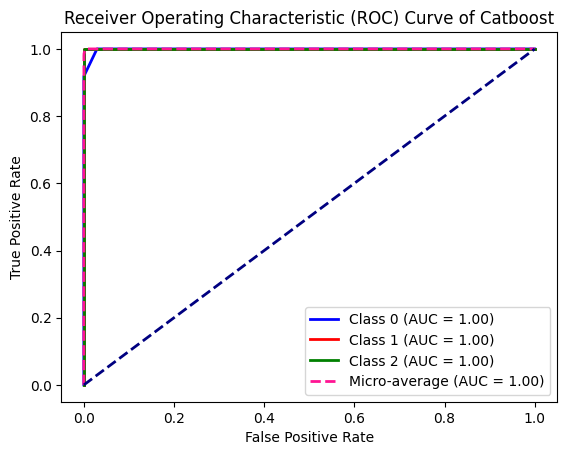

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the CatBoost classifier
classifier = CatBoostClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Catboost')
plt.legend(loc='lower right')
plt.show()


Learning rate set to 0.5
0:	learn: 3.2172924	total: 7.32ms	remaining: 724ms
1:	learn: 2.3362399	total: 13.8ms	remaining: 677ms
2:	learn: 1.8693901	total: 20.1ms	remaining: 650ms
3:	learn: 1.4408382	total: 26.3ms	remaining: 631ms
4:	learn: 1.0281970	total: 33.9ms	remaining: 644ms
5:	learn: 0.9110839	total: 41.3ms	remaining: 647ms
6:	learn: 0.7801235	total: 47.6ms	remaining: 632ms
7:	learn: 0.5766469	total: 54.1ms	remaining: 622ms
8:	learn: 0.5345934	total: 60.5ms	remaining: 612ms
9:	learn: 0.4590988	total: 66.9ms	remaining: 602ms
10:	learn: 0.3766419	total: 73.2ms	remaining: 592ms
11:	learn: 0.3484882	total: 79.4ms	remaining: 582ms
12:	learn: 0.2995626	total: 86.1ms	remaining: 576ms
13:	learn: 0.2802534	total: 92.7ms	remaining: 569ms
14:	learn: 0.2536703	total: 99.2ms	remaining: 562ms
15:	learn: 0.2367627	total: 106ms	remaining: 556ms
16:	learn: 0.2156353	total: 112ms	remaining: 548ms
17:	learn: 0.2112015	total: 118ms	remaining: 540ms
18:	learn: 0.1983891	total: 125ms	remaining: 532ms
1

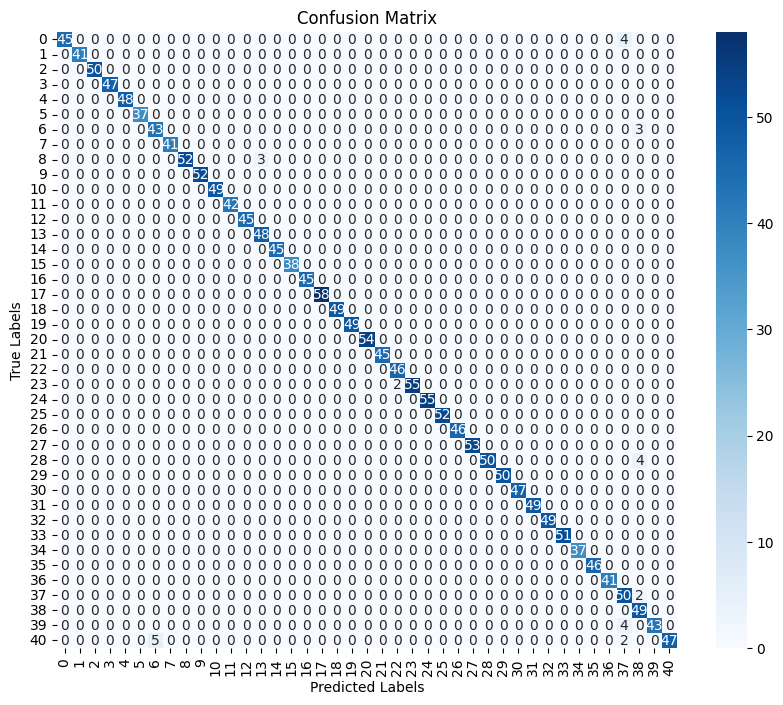

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Fit the CatBoost classifier
model = CatBoostClassifier(iterations=100, depth=3)  # Replace with your CatBoost classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# LGBM Classifier

In [79]:
lgb_classifier = lgb.LGBMClassifier()


In [80]:
lgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
B_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852642276422764


In [81]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search with reduced values
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'feature_fraction': [0.6, 0.8]
}

# Create an instance of the LGBMClassifier
lgbm = LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new LGBMClassifier with the best hyperparameters
best_lgbm = LGBMClassifier(**best_params)

# Train the classifier
best_lgbm.fit(X_train, y_train)

# Make predictions on test data
predictions = best_lgbm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
Best Hyperparameters: {'feature_fraction': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 31}
Best Score: 0.9837408586423472
Accuracy: 0.9827235772357723


In [82]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report of LGBM Classifier:")
print(classification_rep)

Classification Report of LGBM Classifier:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      

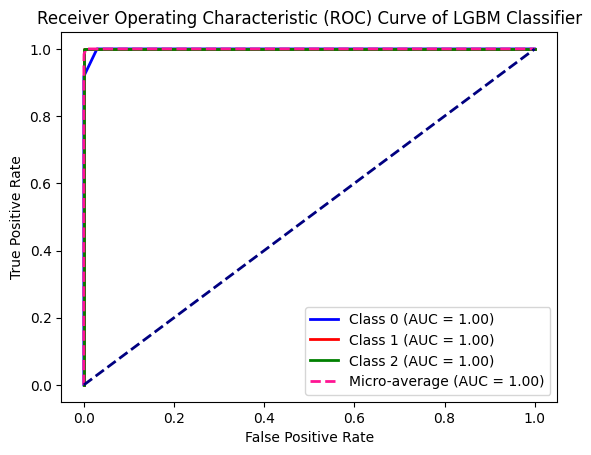

In [83]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import lightgbm as lgb
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the LightGBM classifier
classifier = lgb.LGBMClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of LGBM Classifier')
plt.legend(loc='lower right')
plt.show()


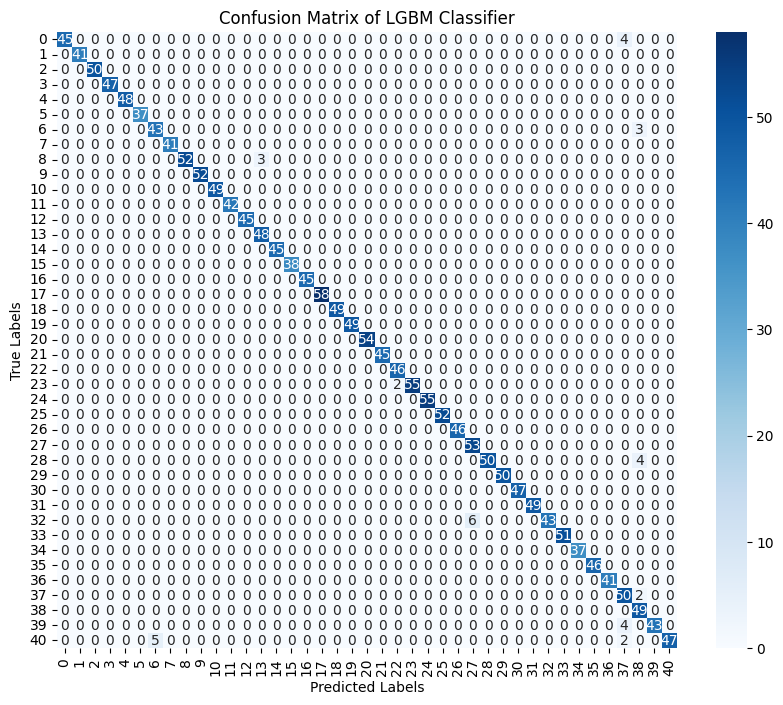

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

# Fit the LightGBM classifier
model = lgb.LGBMClassifier(n_estimators=100, max_depth=3)  # Replace with your LightGBM classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LGBM Classifier')
plt.show()


# **Accuracy Comparison Plot for all the classifiers without hyperparameter tuning**

In [85]:
"""import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the algorithms and their accuracies
algorithm_accuracies = {
    'SVM': 10.7,
    'KNN': 20,
    'Decision Tree': 30,
    # Add more algorithms and their accuracies here
}

# Create a DataFrame from the algorithm accuracies
results_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Plot the accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=results_df)
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.title('Accuracy of Different Algorithms')
plt.show()
"""

"import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Define the algorithms and their accuracies\nalgorithm_accuracies = {\n    'SVM': 10.7,\n    'KNN': 20,\n    'Decision Tree': 30,\n    # Add more algorithms and their accuracies here\n}\n\n# Create a DataFrame from the algorithm accuracies\nresults_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])\nresults_df.reset_index(inplace=True)\nresults_df.rename(columns={'index': 'Algorithm'}, inplace=True)\n\n# Plot the accuracies using Seaborn\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Accuracy', y='Algorithm', data=results_df)\nplt.xlabel('Accuracy (%)')\nplt.ylabel('Algorithm')\nplt.title('Accuracy of Different Algorithms')\nplt.show()\n"

In [94]:
import pandas as pd
import plotly.graph_objects as go

# Define the algorithms and their accuracies
algorithm_accuracies = {
    'Random forest': 98.53,
    'Logistic regression':98.52,
    'Naive bias':98.221,
    'K nearest Neighbor classifier':98.373,
    'Support Vector machine classifier': 98.53,
    'Decision Tree classifier':98.22,
    'Multilayer Perceptron Classifier': 98.53,
    'XGBOOST':98.22,
    'LGBM Classifier': 98.526,
    'Catboost': 98.526,
    # Add more algorithms and their accuracies here
}

# Create a DataFrame from the algorithm accuracies
results_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Define a color scale
colors = ['rgb(301, 19, 130)','rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)']

# Create the bar graph
data = [
    go.Bar(
        x=results_df['Accuracy'],
        y=results_df['Algorithm'],
        orientation='h',
        marker=dict(color=colors),
        text=results_df['Accuracy'],  # Add accuracy values as markings
        textposition='auto',  # Position the markings automatically
        hoverinfo='none'  # Hide the accuracy values in hover text
    )
]

# Customize the layout
layout = go.Layout(
    title='Accuracy of Different Algorithms before HyperParameter Tuning',
    xaxis=dict(title='Accuracy (%)'),
    yaxis=dict(title='Algorithm')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In [93]:
import pandas as pd
import plotly.graph_objects as go

# Define the algorithms and their accuracies
algorithm_accuracies = {
    'Random forest': 98.37,
    'Logistic regression': 98.475,
    'Naive bias': 98.22,
    'K nearest Neighbor classifier': 98.526,
    'Support Vector machine classifier': 98.526,
    'Decision Tree classifier': 98.526,
    'Multilayer Perceptron Classifier': 98.526,
    'XGBOOST': 98.221,
    'LGBM Classifier': 98.272,
    'Catboost': 98.526,
     
    # Add more algorithms and their accuracies here
}

# Create a DataFrame from the algorithm accuracies
results_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Define a color scale
colors = ['rgb(301, 19, 130)','rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)']

# Create the bar graph
data = [
    go.Bar(
        x=results_df['Accuracy'],
        y=results_df['Algorithm'],
        orientation='h',
        marker=dict(color=colors),
        text=results_df['Accuracy'].apply(lambda x: f'{x:.2f}%'),
        textposition='auto',
        hoverinfo='none'
    )
]

# Customize the layout
layout = go.Layout(
    title='Accuracy of Different Algorithms after Hyperparameter Tuning',
    xaxis=dict(title='Accuracy (%)'),
    yaxis=dict(title='Algorithm'),
    showlegend=False
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


# ROC curve of top 3 algorithm having highest accuaracy

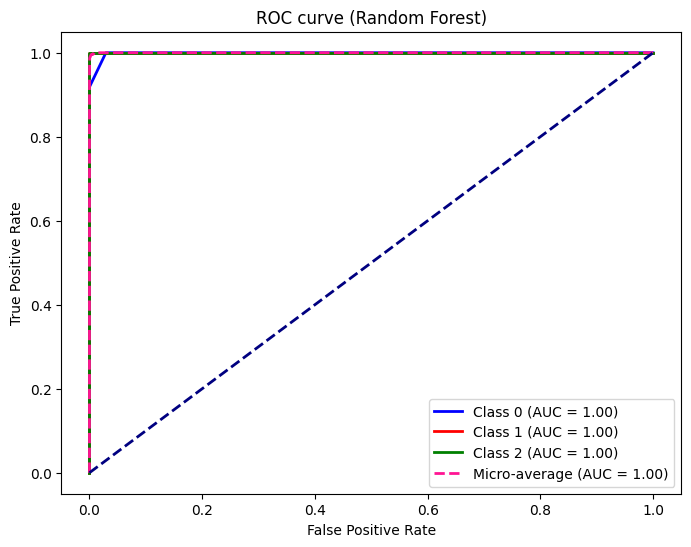

In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

n_classes = 41
top_classes = [0, 1, 2]  # Replace with the indices of the top three classes you want to visualize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(RandomForestClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))  # Adjust the figsize as desired
colors = ['blue', 'red', 'green']  # Replace with your desired colors for the top three classes
for i in top_classes:
    color_index = i % len(colors)
    plt.plot(fpr[i], tpr[i], color=colors[color_index], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    plt.legend()

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))
plt.legend()

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('ROC curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


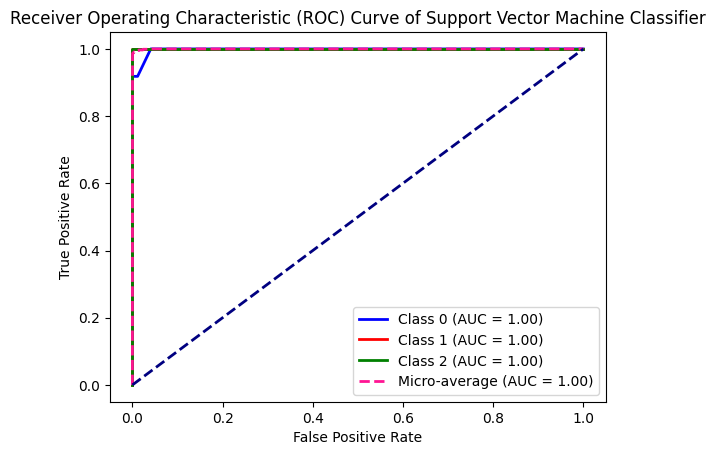

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(SVC(probability=True))

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machine Classifier')
plt.legend(loc='lower right')
plt.show()


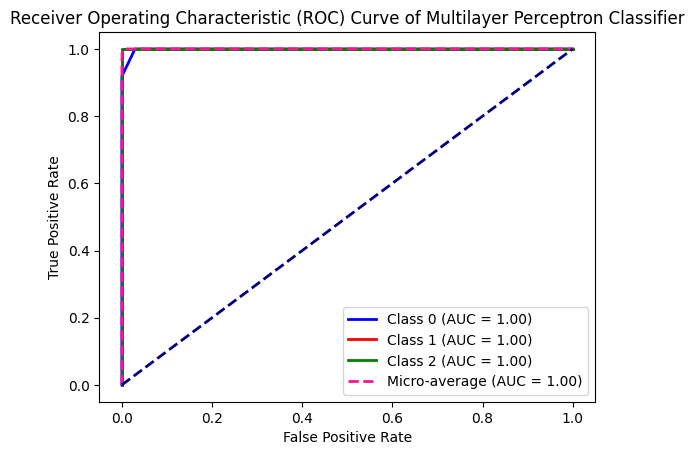

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = MLPClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Multilayer Perceptron Classifier')
plt.legend(loc='lower right')
plt.show()
